# Predictive Analytic:  **Cancer Prediction**
Nama     : Rafly Ashraffi Rachmat

Email    : raflypriyantoro@gmail.com

Sumber Dataset:  
   Dataset diperoleh dari *Kaggle* dengan judul **Cancer Prediction Dataset** (https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset) dengan dataset 1500 data.

# **Data Understanding**

Tahap dalam proses analisis data yang bertujuan untuk memahami dataset secara mendalam sebelum melakukan analisis lebih lanjut.

# **1. Import Library**

Pada tahap ini kita mengimport semua library yang dibutuhkan untuk menganalisis

In [6]:
!pip install optuna
!pip install catboost
!pip install numpy==1.26.4 packaging==24.0 --upgrade --force-reinstall


import os
import shutil
import textwrap
import numpy as np
import zipfile
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached packaging-24.0-py3-none-any.whl.metadata (3.2 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Using cached packaging-24.0-py3-none-any.whl (53 kB)

  Attempting uninstall: packaging

    Found existing installation: packaging 24.0

    Uninstalling packaging-24.0:

      Successfully uninstalled packaging-24.0

   ---------------------------------------- 0/2 [packaging]
  Attempting uninstall: numpy
   ---------------------------------------- 0/2 [packaging]
   -------------------- ------------------- 1/2 [numpy]
    Found existing installation: numpy 1.26.4
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
    Uninstalling numpy-1.26.4:
   -------------------- ------------------- 1/2 [numpy]
   -----------------

# **Data Loading**

## Memuat Dataset

In [9]:
# Gantilah path ini dengan path absolut atau relatif dari file ZIP di sistem lokalmu
zip_path = "cancer.zip"
extract_to = "dataset_cancer"

# Membuka dan mengekstrak ZIP
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_to)

# Tampilkan semua file di folder hasil ekstraksi untuk memastikan nama file
print("File yang diekstrak:")
print(os.listdir(extract_to))

# Load dataset
csv_path = os.path.join(extract_to, "The_Cancer_data_1500_V2.csv")
df_train = pd.read_csv(csv_path)

# Tampilkan 5 baris pertama
df_train.head()


File yang diekstrak:
['The_Cancer_data_1500_V2.csv']


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


Penjelasan:
Diperoleh hasil bahwa terdapat 1500 data dan 9 kolom

### **Deskripsi Variabel**


| Nama Variabel      | Keterangan                                                                   |
| ------------------ | ----------------------------------------------------------------------- |
| `Age`              | Usia responden (dalam tahun).                                           |
| `Gender`           | Jenis kelamin responden (0 = Perempuan, 1 = Laki-laki).                 |
| `BMI`              | Indeks Massa Tubuh (Body Mass Index), indikator status berat badan.     |
| `Smoking`          | Status merokok (0 = Tidak merokok, 1 = Merokok).                        |
| `GeneticRisk`      | Risiko genetik terhadap kanker (0 = Tidak ada, 1 = Rendah, 2 = Tinggi). |
| `PhysicalActivity` | Tingkat aktivitas fisik harian (dalam jam atau skor kuantitatif).       |
| `AlcoholIntake`    | Konsumsi alkohol (dalam satuan tertentu, kemungkinan skor/level).       |
| `CancerHistory`    | Riwayat kanker dalam keluarga (0 = Tidak ada, 1 = Ada).                 |
| `Diagnosis`        | Hasil diagnosis kanker (0 = Negatif, 1 = Positif).                      |


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


Bisa dilihat bahwa data diatas tedapat 3 variabel bertipe float64 dan 6 variabel bertipe int64

In [15]:
df_train.shape

(1500, 9)

Dari output diatas bisa dilihat bahwa terdapat jumlah baris 1.500 dan jumlah kolom 9

In [17]:
#membuat data frame
#agar tidak memenuhi source
df_filtered = pd.DataFrame(df_train)

### **Deskripsi Statistik dari Data**

In [19]:
# memanggil untuk statistik data mengecek outlier.
df_filtered.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

Dataset terdiri dari 1.500 sampel data dengan fitur numerik yang mencerminkan karakteristik pasien, kemungkinan terkait data kanker. Beberapa fitur bersifat biner, sementara yang lain menunjukkan variasi lebih besar. Rentang usia pasien berkisar antara 20–80 tahun dengan median 51, menunjukkan distribusi yang cukup merata. Nilai mean dan median yang mendekati mengindikasikan distribusi data relatif simetris, meskipun analisis lanjutan diperlukan untuk memastikan normalitas dan mendeteksi outlier.

## **Exploratory Data Analysis - Univariate Analysis**

In [23]:
numerical_feature = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']
categorical_feature = ['Gender','Smoking', 'GeneticRisk', 'CancerHistory', 'Diagnosis']

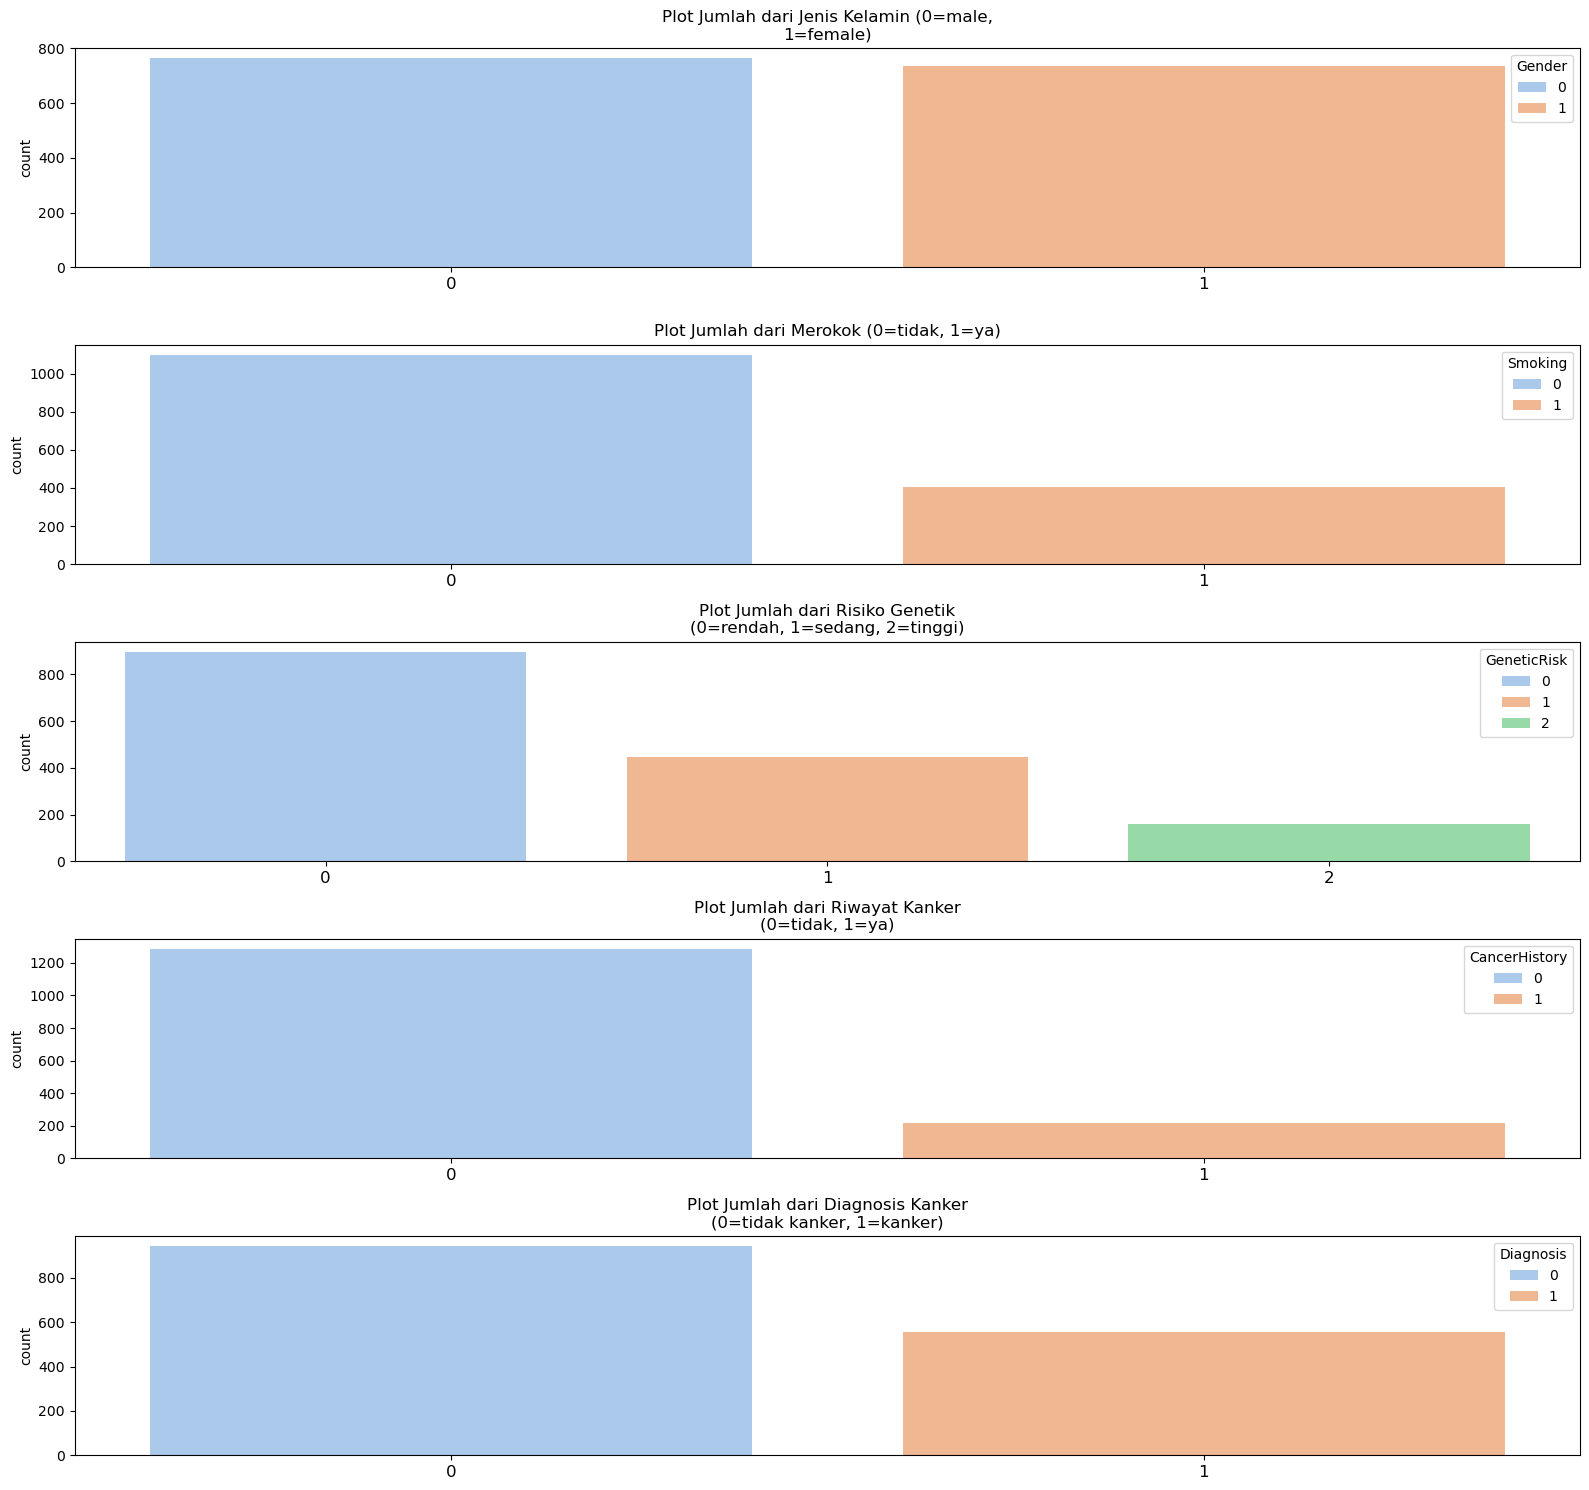

In [24]:
# Setup ukuran dan jumlah subplot
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(16, 15), sharex=False, sharey=False)

# Kolom dan deskripsi kategori
kolom_kategorikal = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory', 'Diagnosis']
deskripsi_kolom_kategorikal = [
    'Jenis Kelamin (0=male, 1=female)',
    'Merokok (0=tidak, 1=ya)',
    'Risiko Genetik (0=rendah, 1=sedang, 2=tinggi)',
    'Riwayat Kanker (0=tidak, 1=ya)',
    'Diagnosis Kanker (0=tidak kanker, 1=kanker)'
]

# Loop plotting
for i, (kolom, deskripsi) in enumerate(zip(kolom_kategorikal, deskripsi_kolom_kategorikal)):
    ax = axes[i]
    sns.countplot(x=kolom, data=df_train, ax=ax, hue=kolom, palette="pastel")

    # Buat judul dengan wrap jika panjang
    judul = "\n".join(textwrap.wrap(f"Plot Jumlah dari {deskripsi}", width=40))
    ax.set_title(judul, fontsize=12)

    ax.set_xlabel("")  # Hilangkan label X
    ax.tick_params(axis="x", labelrotation=0, labelsize=12)

# Tata letak rapi
plt.tight_layout()
plt.show()


Gambar di atas dapat diinterpretasikan sebagai berikut.
1. Dari `Plot Jumlah dari Jenis Kelamin`, mayoritas responden adalah pria dan sisanya adalah wanita.
2. Dari `Plot Jumlah dari Merokok`, sebagian besar responden tidak merokok, sedangkan sebagian kecil merupakan perokok.
3. Dari `Plot Jumlah dari Risiko Genetik`, mayoritas responden memiliki risiko genetik rendah terhadap kanker.
4. Dari `Plot Jumlah dari Riwayat Kanker`, sebagian besar responden tidak memiliki riwayat kanker, sedangkan sisanya memiliki riwayat tersebut.
5. Dari `Plot Jumlah dari Diagnosis Kanker`, mayoritas responden tidak terdiagnosis kanker, dan sebagian lainnya terdiagnosis positif kanker.

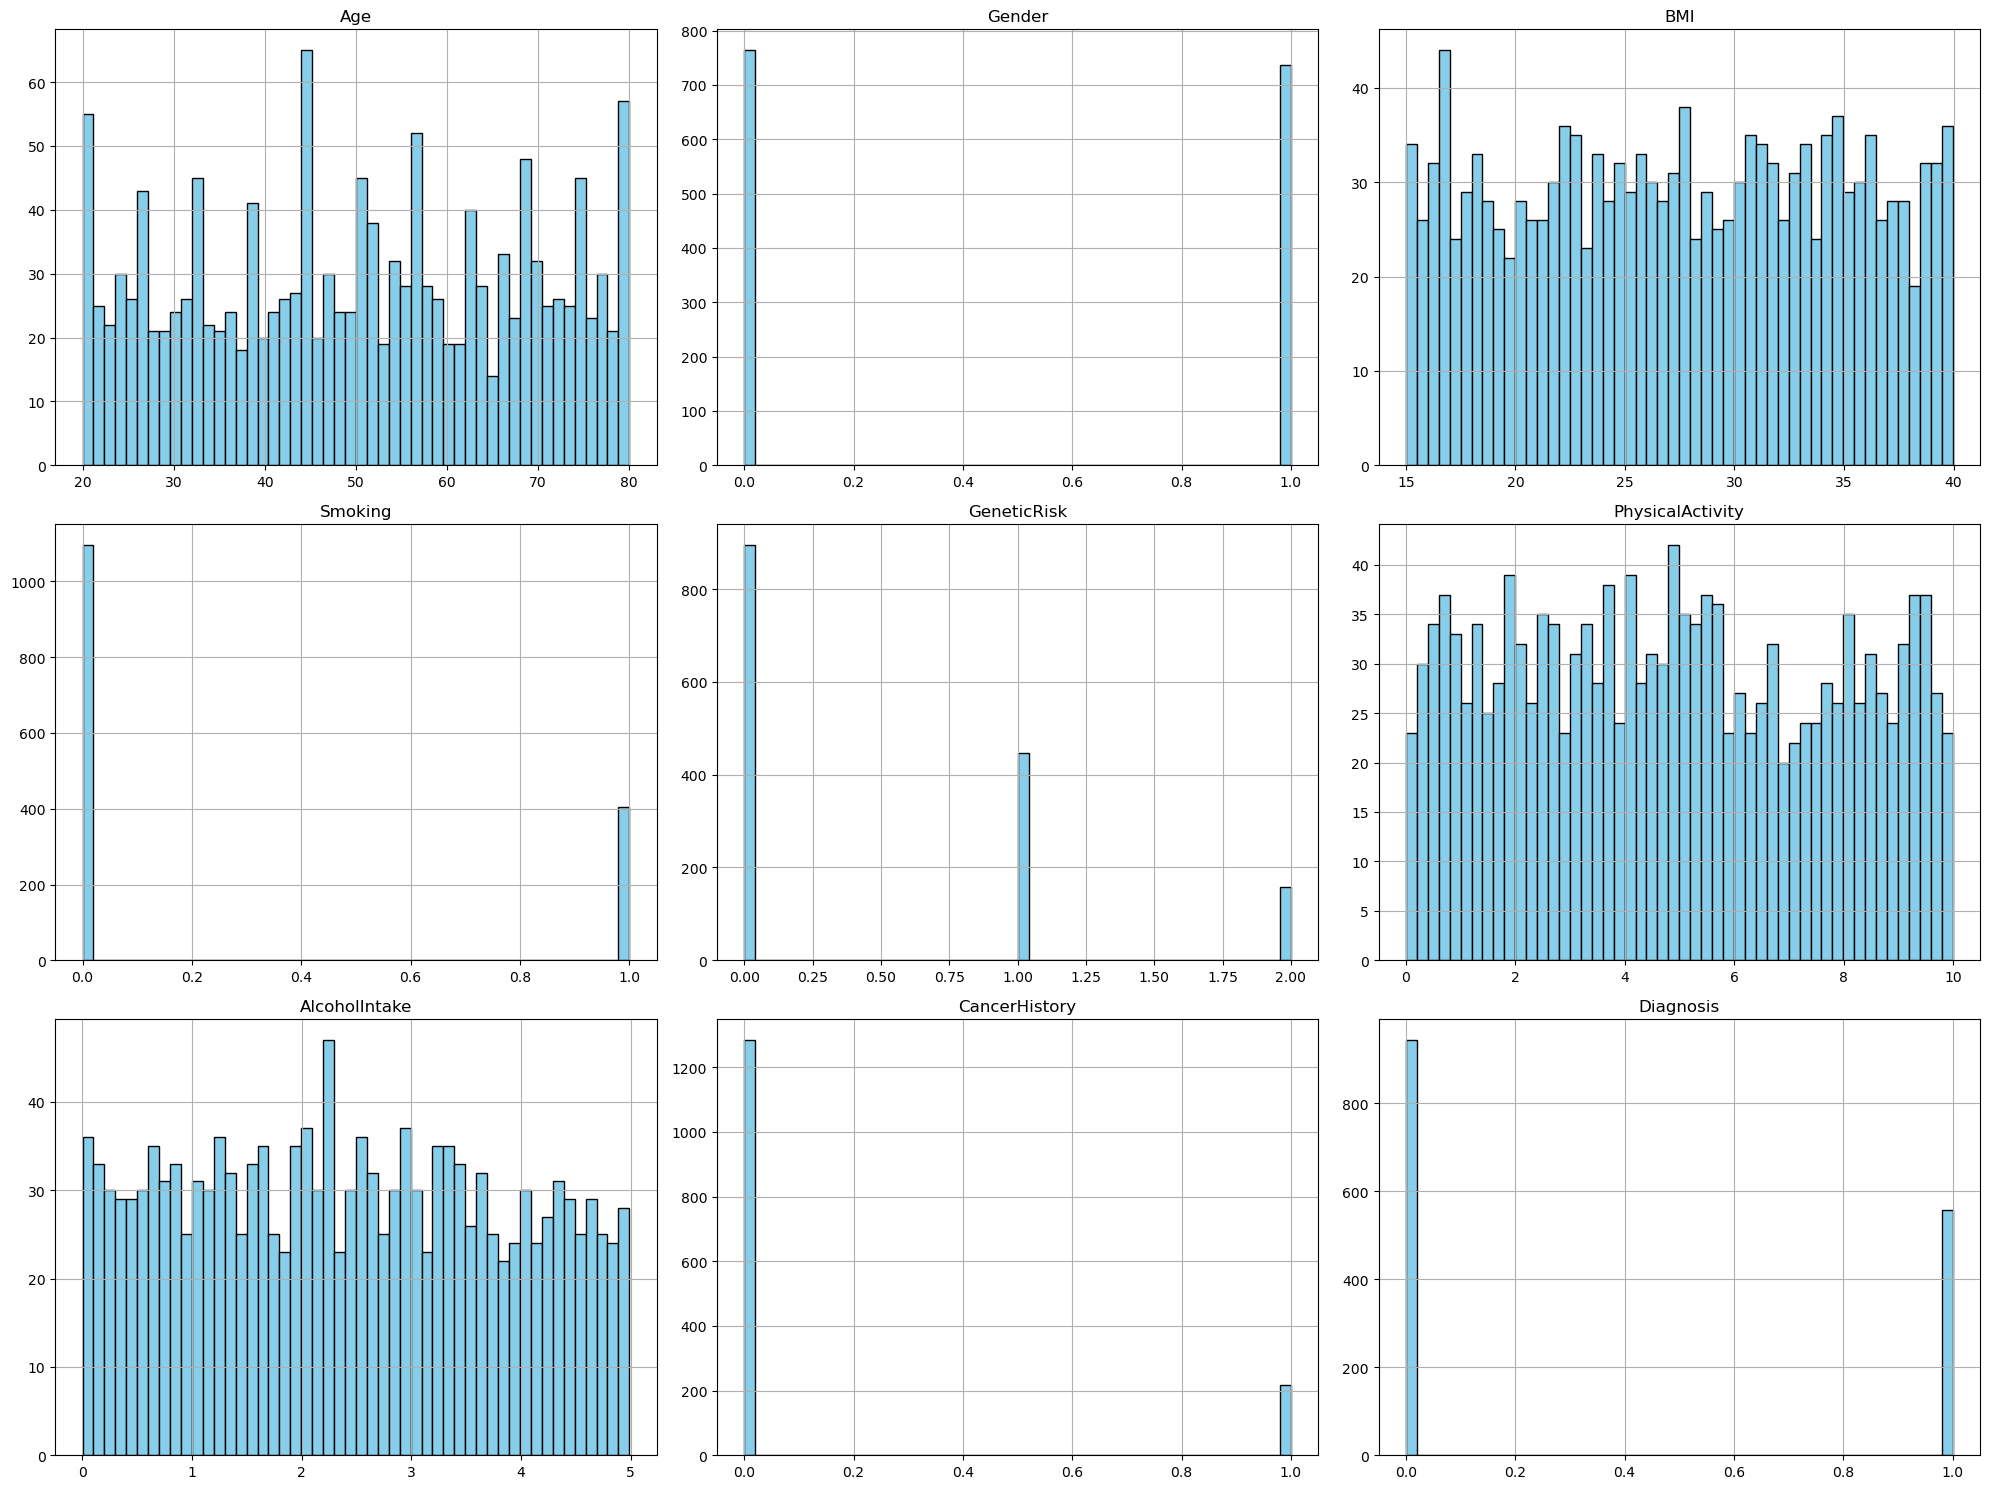

In [26]:
# Membuat histogram untuk semua fitur numerik
ax = df_filtered.hist(
    bins=50,
    figsize=(20, 15),
    color='skyblue',
    edgecolor='black'  # Tambahan kecil agar batang lebih jelas
)

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan semua plot histogram
plt.show()


Gambar di atas dapat diinterpretasikan sebagai berikut.

1. Plot Histogram dari `Age`, `BMI`, dan `PhysicalActivity` memiliki distribusi yang cukup merata tanpa pola lonceng yang jelas, mengindikasikan bahwa data tersebar luas di seluruh rentang nilai yang tersedia.

2. Plot Histogram dari `Gender`, `Smoking`, `GeneticRisk`, `CancerHistory`, `AlcoholIntake`, dan Diagnosis menunjukkan bahwa data merupakan data kategorikal biner, dengan nilai yang sangat dominan pada salah satu kelas (misalnya nilai 0 lebih banyak dari 1).

3. Plot Histogram dari `Age` terlihat agak miring ke kanan, yang berarti sebagian besar responden berusia di atas rata-rata, menunjukkan dominasi kelompok usia dewasa hingga lansia dalam data ini.

# **Exploratory Data Analysis - Multivariate Analysis**

### **Membandingkan Diagnosis Kanker Berdasarkan Jenis Kelamin**

Kode dibawah untuk mempermudah analisis maka diubah dari numerik menjadi kategorik

In [31]:
# Dictionary mapping untuk beberapa kolom
mapping_dict = {
    "Gender": {0: "male", 1: "female"},
    "Smoking": {0: "no", 1: "yes"},
    "CancerHistory": {0: "no", 1: "yes"},
    "Diagnosis": {0: "No Cancer", 1: "Cancer"},
    "GeneticRisk": {0: "low", 1: "medium", 2: "high"}
}

# Terapkan mapping secara efisien
for col, mapping in mapping_dict.items():
    df_filtered[col] = df_filtered[col].replace(mapping)

# Tampilkan hasil
df_filtered.head()


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,female,16.085313,no,medium,8.146251,4.148219,yes,Cancer
1,71,male,30.828784,no,medium,9.361630,3.519683,no,No Cancer
2,48,female,38.785084,no,high,5.135179,4.728368,no,Cancer
3,34,male,30.040296,no,low,9.502792,2.044636,no,No Cancer
4,62,female,35.479721,no,low,5.356890,3.309849,no,Cancer


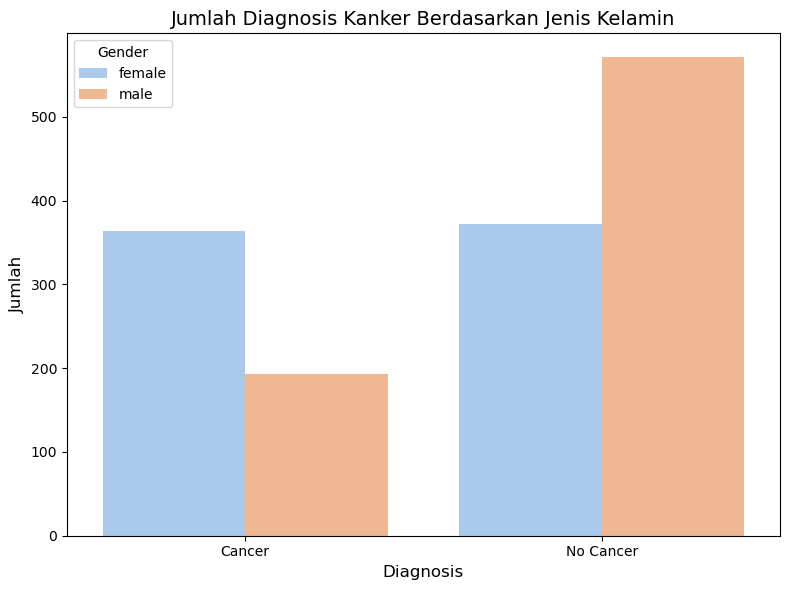

In [32]:
# Ukuran figure
plt.figure(figsize=(8, 6))

# Plot countplot dengan hue berdasarkan Gender
sns.countplot(data=df_filtered, x="Diagnosis", hue="Gender", palette="pastel")

# Judul dan label sumbu
plt.title("Jumlah Diagnosis Kanker Berdasarkan Jenis Kelamin", fontsize=14)
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=0)

# Tampilkan plot
plt.tight_layout()
plt.show()


Dari grafik bar yang ditampilkan, dapat disimpulkan bahwa:

1. Penyakit kanker (Diagnosis = 1) lebih banyak ditemukan pada responden perempuan dibandingkan laki-laki. Hal ini terlihat dari jumlah bar perempuan yang lebih tinggi pada kategori “Diagnosis = 1”.

2. Responden yang tidak terkena kanker (Diagnosis = 0) ini artinya responde laki-laki lebih banyak ditemukan dibanding perempuan,selisihnya lumayan jauh.

### **Membandingkan Diagnosis Kanker Berdasarkan Usia**

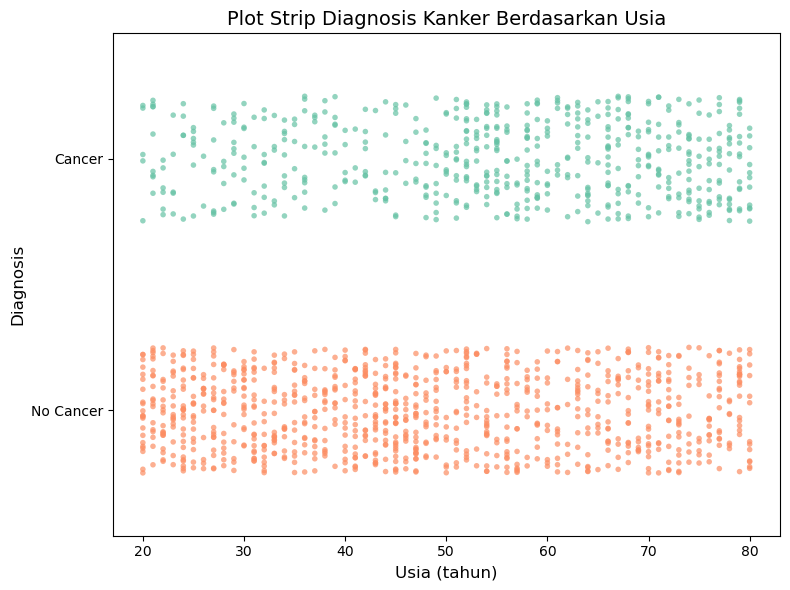

In [35]:
# Membuat figure
plt.figure(figsize=(8, 6))

# Gunakan hue=Diagnosis agar tidak kena warning palette
sns.stripplot(
    data=df_filtered,
    x="Age",
    y="Diagnosis",
    hue="Diagnosis",
    dodge=False,
    jitter=0.25,
    size=4,
    alpha=0.7,
    palette="Set2",
    legend=False  # Agar legend tidak ditampilkan dua kali
)

plt.title("Plot Strip Diagnosis Kanker Berdasarkan Usia", fontsize=14)
plt.xlabel("Usia (tahun)", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)

plt.tight_layout()
plt.show()

Dari gambar di atas, dapat disimpulkan bahwa:

1. Seluruh responden yang terdiagnosis kanker (positif) berada pada rentang usia sekitar 30 hingga 80 tahun, dengan penyebaran lebih padat di atas usia 40 tahun.

2. Responden yang tidak terdiagnosis kanker (negatif) memiliki distribusi usia yang lebih luas, mulai dari usia 20 hingga sekitar 80 tahun, dengan sebaran cukup merata.


### **Membandingkan Kebiasaan Merokok Berdasarkan Diagnosis Kanker**

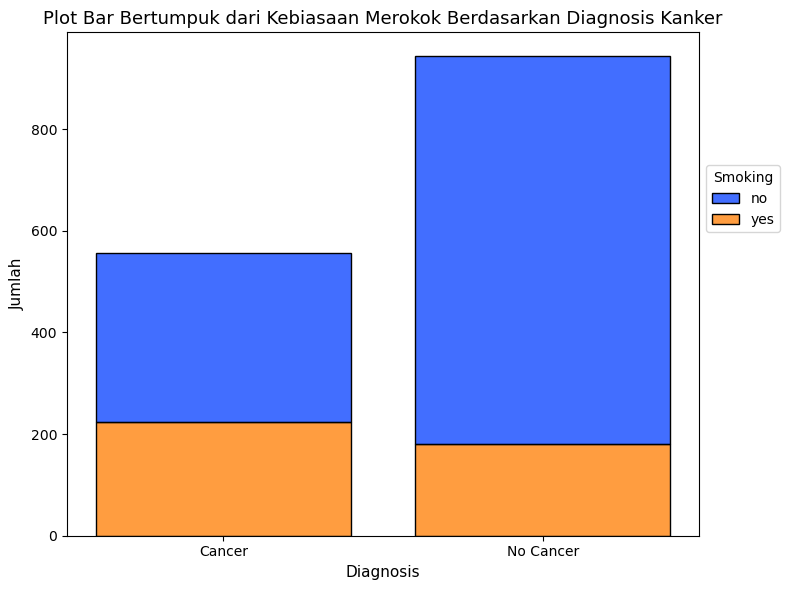

In [38]:
# Ukuran plot
plt.figure(figsize=(8, 6))

# Plot histogram bertumpuk berdasarkan Diagnosis dan kebiasaan merokok
ax = sns.histplot(
    data=df_filtered,
    x="Diagnosis",
    hue="Smoking",
    multiple="stack",
    palette="bright",
    shrink=0.8  # opsional, agar batang lebih ramping
)

# Judul dan label
plt.title("Plot Bar Bertumpuk dari Kebiasaan Merokok Berdasarkan Diagnosis Kanker", fontsize=13)
plt.xlabel("Diagnosis", fontsize=11)
plt.ylabel("Jumlah", fontsize=11)

# Posisi legenda
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.75))

# Tampilkan
plt.tight_layout()
plt.show()


Dari gambar di atas, disimpulkan bahwa:

1. Mayoritas individu yang tidak merokok (warna biru) lebih banyak ditemukan pada kelompok yang tidak terkena kanker (Diagnosis = 0) dibandingkan dengan kelompok yang terkena kanker.

2. Sebaliknya, individu yang merokok (warna oranye) lebih banyak muncul pada kelompok dengan diagnosis kanker (Diagnosis = 1), menunjukkan adanya korelasi antara kebiasaan merokok dan peningkatan risiko kanker.

### **Membandingkan Distribusi BMI Berdasarkan Diagnosis Kanker**

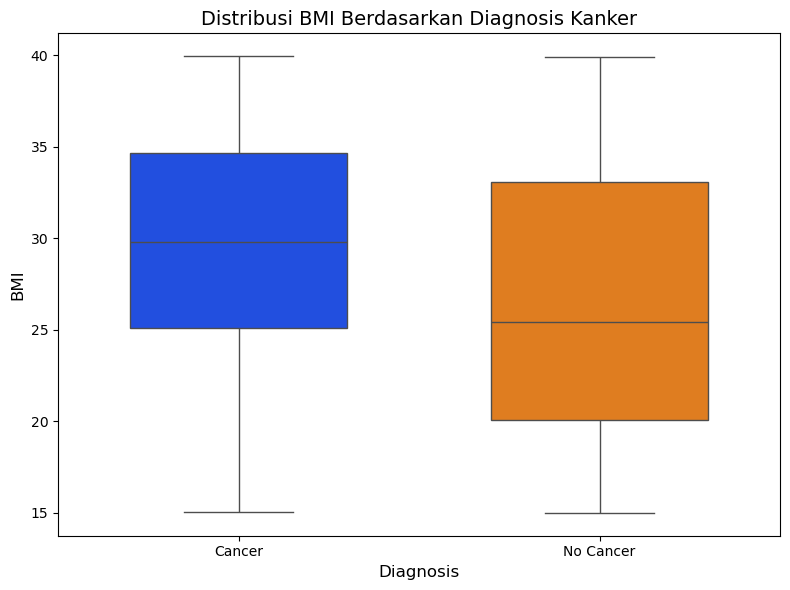

In [41]:
# Membuat figure
plt.figure(figsize=(8, 6))

# Plot boxplot distribusi BMI berdasarkan Diagnosis
sns.boxplot(
    data=df_filtered,
    x="Diagnosis",
    y="BMI",
    hue="Diagnosis",      # tambahkan hue
    legend=False,         # matikan legend karena redundant
    palette="bright",
    width=0.6,
    fliersize=3
)

# Judul dan label sumbu
plt.title("Distribusi BMI Berdasarkan Diagnosis Kanker", fontsize=14)
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("BMI", fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()


Dari gambar di atas, disimpulkan bahwa:

1. Distribusi BMI pada kelompok yang tidak terkena kanker (Diagnosis = 0) cenderung memiliki median BMI yang sedikit lebih rendah dibandingkan dengan kelompok yang terkena kanker (Diagnosis = 1).

2. Variasi BMI pada kedua kelompok relatif mirip, namun terdapat beberapa nilai BMI ekstrim (outlier) di kedua kelompok, yang menunjukkan adanya individu dengan BMI sangat rendah atau sangat tinggi.

3. Secara umum, individu dengan diagnosis kanker (positif) cenderung memiliki BMI yang sedikit lebih tinggi dibandingkan dengan individu tanpa kanker (negatif).



### **Membandingkan Risiko Genetik Berdasarkan Diagnosis Kanker**

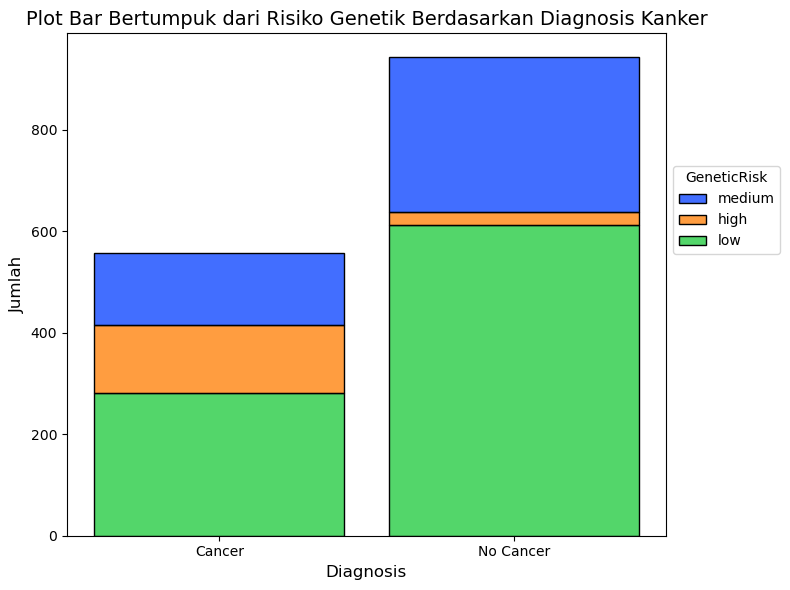

In [44]:
# Membuat canvas plot
plt.figure(figsize=(8, 6))

# Plot bar bertumpuk berdasarkan Diagnosis dan GeneticRisk
ax = sns.histplot(
    data=df_filtered,
    x="Diagnosis",
    hue="GeneticRisk",
    multiple="stack",
    palette="bright",
    shrink=0.85  # opsional: untuk merampingkan bar agar tidak tumpang tindih
)

# Judul dan label
plt.title("Plot Bar Bertumpuk dari Risiko Genetik Berdasarkan Diagnosis Kanker", fontsize=14)
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=0)

# Memindahkan legend ke posisi kiri atas (di luar plot)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.75))

# Atur layout agar tidak terpotong
plt.tight_layout()
plt.show()


Dari gambar di atas, disimpulkan bahwa:

1. Mayoritas individu yang tidak terdiagnosis kanker (No Cancer) memiliki risiko genetik rendah (low). Hal ini menunjukkan bahwa risiko genetik yang rendah kemungkinan berasosiasi dengan tidak adanya diagnosis kanker.

2. Sebaliknya, kelompok yang didiagnosis kanker (Cancer) memiliki distribusi risiko genetik yang lebih beragam, dengan jumlah signifikan pada kategori risiko sedang (medium) dan risiko tinggi (high).

3. Individu dengan risiko genetik tinggi (high) secara proporsional lebih banyak ditemukan pada kelompok Cancer dibandingkan kelompok No Cancer. Ini menunjukkan adanya potensi korelasi positif antara risiko genetik tinggi dan kemungkinan terkena kanker.

4. Meskipun kelompok risiko rendah tetap mendominasi dalam kedua diagnosis, proporsinya jauh lebih tinggi di kelompok No Cancer dibanding kelompok Cancer.

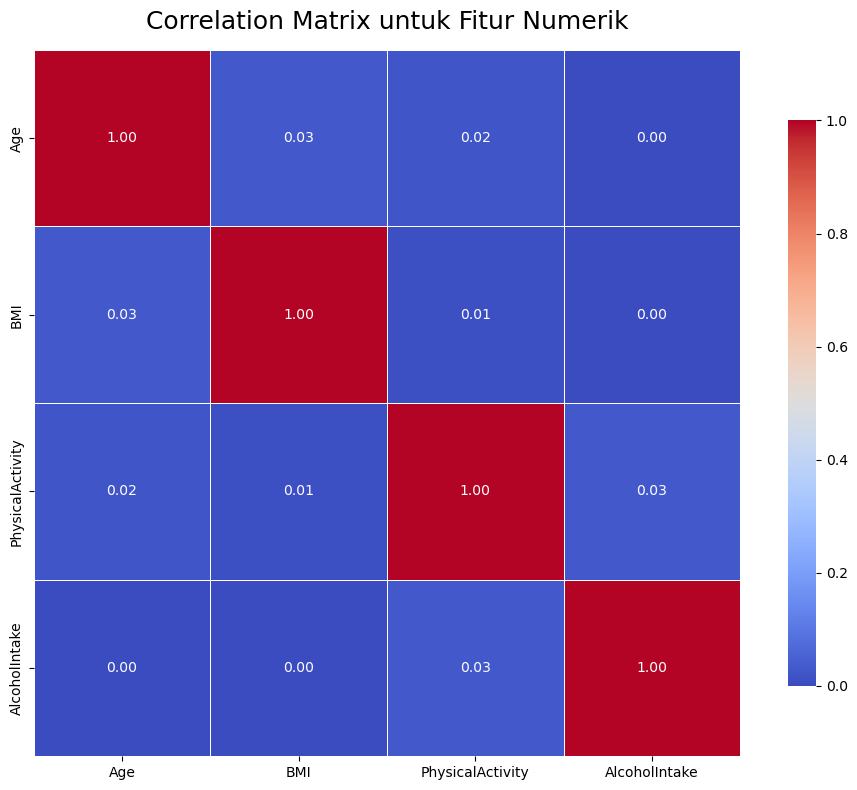

In [46]:
# Membuat figure dan title
plt.figure(figsize=(10, 8))

# Hitung matriks korelasi dan bulatkan 2 desimal
correlation_matrix = df_filtered[numerical_feature].corr().round(2)

# Plot heatmap dengan korelasi antar fitur numerik
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",                # Format angka 2 desimal
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='white',        # Tambahan kecil: garis antar sel lebih bersih
    square=True,              # Membuat kotak matriks berbentuk bujur sangkar
    cbar_kws={"shrink": 0.8}  # Shrink color bar agar tidak terlalu besar
)

# Tambahkan judul
plt.title("Correlation Matrix untuk Fitur Numerik", fontsize=18, pad=15)

# Tampilkan plot
plt.tight_layout()
plt.show()


Kesimpulan Heatmap Korelasi:
1. Korelasi antar fitur sangat rendah
 - Hampir semua nilai korelasi antar fitur numerik seperti Age, BMI, Physical Activity, dan Alcohol Intake berada di kisaran 0.00 – 0.03.
  - Ini menunjukkan bahwa tidak terdapat hubungan linear yang signifikan antar variabel tersebut.

2. Nilai diagonal bernilai 1
  - Korelasi antara fitur dengan dirinya sendiri adalah 1.00, yang merupakan karakteristik normal dari matriks korelasi.

# **Data Preparation**

### **Data Cleaning**

#### **Mengecek Data Duplikat**

In [51]:
df_filtered.duplicated().sum()

np.int64(0)

Dari hasil diatas terlihat bahwa tidak ada data yang terduplikasi.

In [53]:
# Menghapus data duplikat
df_cleaned = df_filtered.drop_duplicates()

# Memverifikasi jumlah baris setelah penghapusan duplikat
print(f"Jumlah baris setelah penghapusan duplikat: {df_cleaned.shape[0]}")
df_cleaned.head()

Jumlah baris setelah penghapusan duplikat: 1500


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,female,16.085313,no,medium,8.146251,4.148219,yes,Cancer
1,71,male,30.828784,no,medium,9.361630,3.519683,no,No Cancer
2,48,female,38.785084,no,high,5.135179,4.728368,no,Cancer
3,34,male,30.040296,no,low,9.502792,2.044636,no,No Cancer
4,62,female,35.479721,no,low,5.356890,3.309849,no,Cancer


Dari hasil diatas menunjukkan bahwa dataset dengan jumlah 1500 data artinya dataset yang dipakai tidak ada data yang terduplikasi dan bisa lanjut untuk menganalisis.


#### **Menangani Missing Value**

In [56]:
df_cleaned.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

Penjelasan:

Dari output diatas didapati bahwa tidak terdapat missing value pada dataset

In [58]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Kolom yang akan di-encode
cols_to_encode = ["Gender", "Smoking", "CancerHistory", "Diagnosis", "GeneticRisk"]

# 2. Kategori sesuai urutan semula
category_order = [
    ["male", "female"],          # Gender
    ["no", "yes"],               # Smoking
    ["no", "yes"],               # CancerHistory
    ["No Cancer", "Cancer"],     # Diagnosis
    ["low", "medium", "high"]    # GeneticRisk
]

# 3. Inisialisasi encoder
ordinal_encoder = OrdinalEncoder(categories=category_order, dtype=int)

# 4. Fit dan transform kolom kategorikal
encoded_array = ordinal_encoder.fit_transform(df_filtered[cols_to_encode])

# 5. Salin DataFrame dan masukkan hasil encode
df_cleaned = df_filtered.copy()
df_cleaned[cols_to_encode] = encoded_array.astype(int)

# 6. Tampilkan hasil
df_cleaned.head()


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


Penjelasan:

1. Proses encoding ini mengubah data kategorikal seperti jenis kelamin, kebiasaan merokok, riwayat kanker, diagnosis, dan risiko genetik menjadi bentuk numerik agar dapat digunakan oleh algoritma machine learning.

2. Pemetaan dilakukan dengan urutan tertentu, misalnya: 'male' → 0 dan 'female' → 1 untuk Gender, 'no' → 0 dan 'yes' → 1 untuk Smoking dan CancerHistory, 'No Cancer' → 0 dan 'Cancer' → 1 untuk Diagnosis, serta 'low' → 0, 'medium' → 1, dan 'high' → 2 untuk GeneticRisk.

3. Proses ini menghasilkan data yang bersih dan konsisten, siap digunakan untuk analisis statistik atau pemodelan prediktif. Selain itu, encoding ordinal memungkinkan analisis lanjutan, seperti mengevaluasi hubungan antara risiko genetik dan kemungkinan diagnosis kanker.tatistik karena semua fitur kini berbentuk numerik.

### **Menangani outliers**

menangani outliers dengan IQR Method

In [61]:
# memanggil untuk statistik data setelah dihapus data duplikat dan missing value.
df_cleaned.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah). - 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

 Penjelasan:

Berdasarkan hasil statistik deskriptif, dataset terdiri dari 1.500 sampel tanpa missing values pada fitur numerik. Rata-rata usia peserta adalah 50 tahun dengan rentang 20–80 tahun, menunjukkan variasi usia yang luas. Nilai BMI rata-rata sebesar 27,5 termasuk dalam kategori overweight, dengan rentang antara 15 hingga hampir 40. Aktivitas fisik memiliki rata-rata 4,9 namun terdapat nilai yang sangat rendah mendekati nol, yang berpotensi menjadi outlier. Sementara itu, asupan alkohol memiliki rata-rata 2,4 dengan sebaran cukup lebar dari 1,0 hingga hampir 5,0, mencerminkan perbedaan kebiasaan konsumsi antar individu

In [64]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [65]:
df_cleaned.shape

(1500, 9)

Total dari hasil diatas adalah 1500 baris

In [67]:
#Cek data outlier
numerical_feature = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']
categorical_feature = ['Gender','Smoking', 'GeneticRisk', 'CancerHistory', 'Diagnosis']

In [68]:
#Cek data outlier
numerical_feature = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']
selected_cols = df_cleaned[numerical_feature]

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_cleaned[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

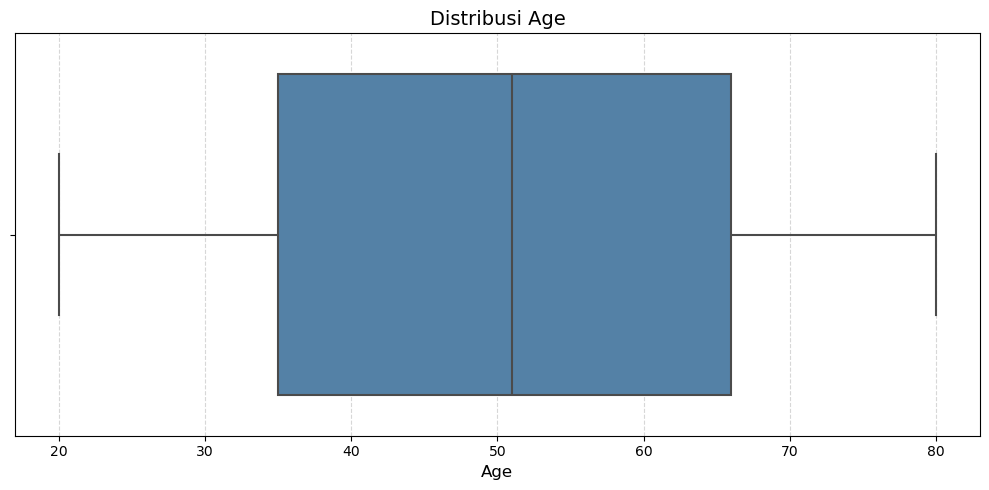

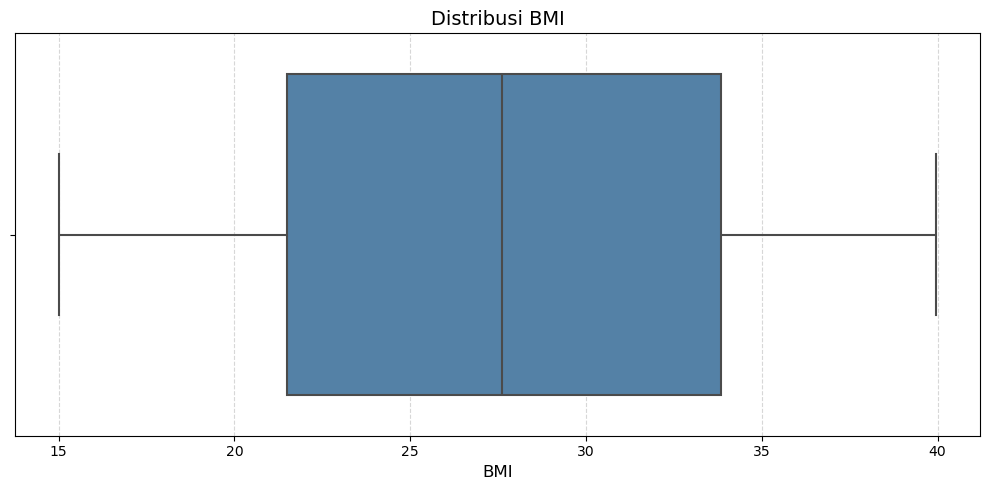

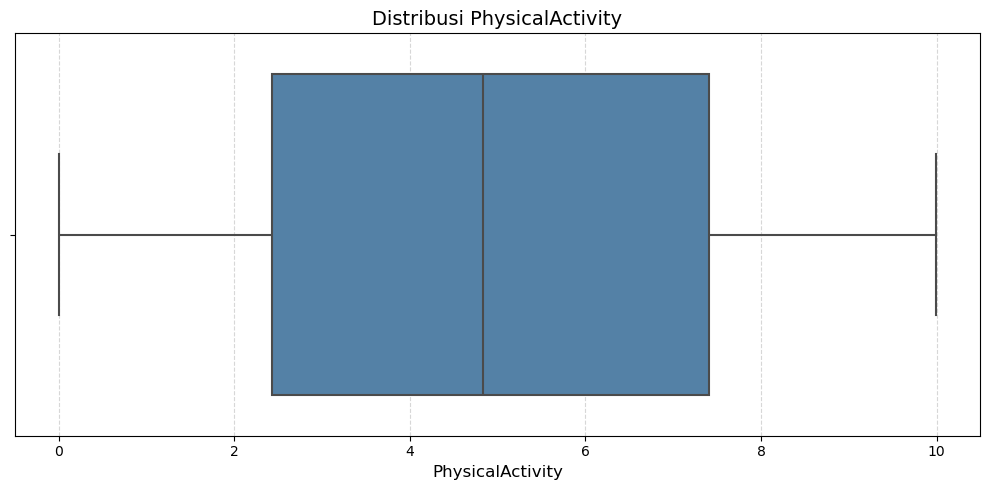

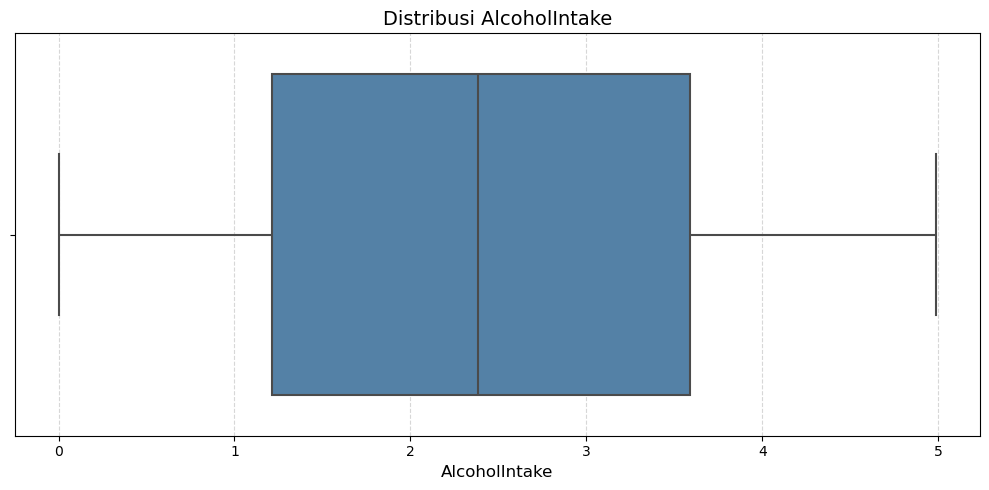

In [69]:
# Boxplot untuk setiap fitur numerik
for col in numerical_feature:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_cleaned[col], color='steelblue', linewidth=1.5, fliersize=4)
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


Penjelasan:

Berdasarkan keempat fitur yang dianalisis, tidak ada indikasi outlier yang perlu ditangani. Hal ini menunjukkan bahwa data numerik dalam dataset relatif bersih dan berada dalam rentang yang wajar secara statistik maupun secara logis. Dengan demikian, tidak diperlukan proses pembersihan atau transformasi khusus terhadap outlier untuk variabel-variabel ini.

## **One Hot Encoding**

In [72]:
# 1. Kolom kategorikal yang akan di-one-hot encode
categorical_cols = ["Gender", "Smoking", "CancerHistory", "GeneticRisk"]

# 2. One-hot encoding dengan drop_first untuk mencegah dummy trap
dummies = pd.get_dummies(df_filtered[categorical_cols], drop_first=True, dtype=int)

# 3. Gabungkan ke DataFrame asli
data = pd.concat([df_filtered.drop(columns=categorical_cols), dummies], axis=1)

# 4. Tampilkan hasil
data.head()


,Age,BMI,PhysicalActivity,AlcoholIntake,Diagnosis,Gender,Smoking,CancerHistory,GeneticRisk
0,58,16.085313,8.146251,4.148219,1,1,0,1,1
1,71,30.828784,9.361630,3.519683,0,0,0,0,1
2,48,38.785084,5.135179,4.728368,1,1,0,0,2
3,34,30.040296,9.502792,2.044636,0,0,0,0,0
4,62,35.479721,5.356890,3.309849,1,1,0,0,0


Penjelasan:

Kode di atas melakukan proses one-hot encoding pada kolom kategorikal yaitu Gender, Smoking, CancerHistory, dan GeneticRisk. Proses ini mengubah nilai kategori menjadi format numerik (dummy variables) agar dapat digunakan dalam model machine learning. Opsi drop_first=True digunakan untuk menghindari dummy variable trap dengan menghapus satu kategori dari setiap variabel. Setelah encoding, kolom aslinya dihapus dan data hasil transformasi siap digunakan untuk proses analisis atau pemodelan lebih lanjut.

## **Splitting**

Selanjutnya, karena target kita adalah variabel `diagnosis` untuk mengetahui akurasi prediksi dari diagnosis, maka kita akan membuang kolom tersebut dari data dan assign kolom tersebut ke variabel baru.

In [76]:
from sklearn.model_selection import train_test_split

# 1. Pisahkan fitur (X) dan target (y)
X = data.drop(columns=["Diagnosis"])
y = data["Diagnosis"]

# 2. Bagi data menjadi train dan test set (70%:30%), dengan random_state tetap untuk reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=30,
    stratify=y  # opsional: menjaga proporsi label Diagnosis di train/test
)

Lalu, kita membagi data menjadi 2, yaitu

- Data training sebesar 70% untuk melatih model
- Data testing sebesar 30% untuk menguji model

In [78]:
# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (1050, 8)
Ukuran X_test:  (450, 8)
Ukuran y_train:  (1050,)
Ukuran y_test:  (450,)


In [79]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1500
Total # of sample in train dataset: 1050
Total # of sample in test dataset: 450


## **Standarisasi**

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma dan menyeragamkan karena memiliki satuan yang berbeda pada tiap fitur.

In [82]:
# scaling untuk data training
numerical_features= ['BMI', 'PhysicalActivity', 'AlcoholIntake']
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,BMI,PhysicalActivity,AlcoholIntake
1047,0.776627,0.592855,0.544537
1426,0.384984,0.398421,0.430894
1191,0.075719,0.434257,0.592620
386,0.677584,0.775213,0.263203
789,0.369657,0.619521,0.487866


In [83]:
# scaling untuk data testing
numerical_features= ['BMI', 'PhysicalActivity', 'AlcoholIntake']
scaler = MinMaxScaler()
scaler.fit(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

,BMI,PhysicalActivity,AlcoholIntake
14,0.782791,0.490240,0.113315
699,0.833883,0.070553,0.592231
836,0.318916,0.943488,0.258301
1313,0.282354,0.451991,0.819139
19,0.094513,0.331665,0.054910


# **Model Development**

In [85]:
# Function for evalution report and plotting confusion matrix
def make_evaluation(y_true, y_pred, title):

    # Membuat list nama target yang diinginkan
    target_nama = ['Terkena Cancer',
                    'Non Cancer']

    # Menampilkan laporan klasifikasi (classification report)
    print(classification_report(y_true, y_pred, target_names = target_nama))

    # Membentuk Confusion Matrix
    fig, ax = plt.subplots(figsize = (10, 5))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax = ax)

    # Menambahkan label sumbu x dan y pada confusion matrix
    ax.xaxis.set_ticklabels(target_nama, rotation = 90)
    ax.yaxis.set_ticklabels(target_nama)

    # Menghilangkan garis-garis grid
    ax.grid(False)

    # Menambahkan judul pada confusion matrix
    _ = ax.set_title(title)
    plt.show()

Seluruh model yang akan dibuat menggunakan hyperparameter tuning menggunakan optuna. Optimasi hyperparameter dengan Optuna terbukti efektif dalam meningkatkan performa model untuk mengetahui parameter yang tepat untuk algoritma model pada setiap model.

## **Model Development dengan Algoritma XGBoost**

In [88]:
import optuna
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Ensure that X_train, X_test, y_train, y_test are converted to NumPy arrays
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Example of converting y_train, y_test if they are DataFrames
y_train = y_train.values if isinstance(y_train, pd.DataFrame) else y_train
y_test = y_test.values if isinstance(y_test, pd.DataFrame) else y_test

def objective(trial):
    # Suggest hyperparameters from the search space
    max_depth = trial.suggest_int('max_depth', 3, 15)  # Integer values between 3 and 15
    n_estimators = trial.suggest_int('n_estimators', 50, 200)  # Integer values between 50 and 200
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)  # Log-uniform distribution between 1e-4 and 1e-1
    random_state = trial.suggest_int('random_state', 0, 1000)  # Integer values for random_state

    # Create the XGBoost model with suggested hyperparameters
    model_xgb = XGBClassifier(max_depth=max_depth,
                              n_estimators=n_estimators,
                              learning_rate=learning_rate,
                              random_state=random_state,
                              n_jobs=-1)

    # Train the model
    model_xgb.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model_xgb.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # We want to maximize accuracy

# Create Optuna study to optimize the hyperparameters
study = optuna.create_study(direction='maximize')  # 'maximize' because we want to maximize accuracy
study.optimize(objective, n_trials=250)  # Run the optimization for 50 trials

# Best hyperparameters found by Optuna
print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)

[I 2025-06-30 23:13:52,809] A new study created in memory with name: no-name-066d02db-0e84-4c8e-9eb8-6494af821be4
C:\Users\RAFLY A.R\AppData\Local\Temp\ipykernel_18760\3882488613.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)  # Log-uniform distribution between 1e-4 and 1e-1
[I 2025-06-30 23:13:52,960] Trial 0 finished with value: 0.6288888888888889 and parameters: {'max_depth': 5, 'n_estimators': 89, 'learning_rate': 0.002055860337999426, 'random_state': 231}. Best is trial 0 with value: 0.6288888888888889.
C:\Users\RAFLY A.R\AppData\Local\Temp\ipykernel_18760\3882488613.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_fl

Best hyperparameters:  {'max_depth': 3, 'n_estimators': 177, 'learning_rate': 0.052612315918858864, 'random_state': 217}
Best accuracy:  0.9311111111111111


In [89]:
# Memanggil fungsi XGBClassifier dari library sklearn
model_xgb = XGBClassifier(max_depth = 4, n_estimators = 134,
                          random_state = 854, learning_rate =    0.01593435842863771, n_jobs = -1)

# Melatih model XGBoost dengan data training pada X dan y
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01593435842863771, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=134, n_jobs=-1,
              num_parallel_tree=None, ...)

Xgboost dengan parameter sebagai berikut:

  - max_depth = 4 :  Kedalaman maksimum pohon (default: None, yang berarti pohon akan terus tumbuh hingga semua daun murni atau hingga semua daun memiliki kurang dari min_samples_split sampel)

  - learning_rate:  mengontrol kecepatan pembelajaran model. Secara khusus, learning rate menentukan seberapa besar kontribusi setiap pohon (weak learner) terhadap model akhir untuk menghindari overfitting.

  - n_estimators : untuk mengurangi error yang tersisa dari prediksi pohon sebelumnya.

  - random_state: Menentukan generator bilangan acak untuk memastikan hasil yang dapat direproduksi (default: None).

  - n_jobs=-1: Menentukan jumlah inti (cores) yang digunakan untuk menghitung. Jika diatur ke -1, model akan menggunakan semua inti yang tersedia, sehingga mempercepat proses pelatihan.

In [91]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_xgb = model_xgb.predict(X_test)

# Menampilkan akurasi model
xgb = accuracy_score(y_test, pred_xgb)
accuracy_xgboost= round(accuracy_score(y_test, pred_xgb)*100,2)
print("hasil akurasi model xgboost: ", accuracy_xgboost,"%")

hasil akurasi model xgboost:  85.33 %


                precision    recall  f1-score   support

Terkena Cancer       0.84      0.95      0.89       283
    Non Cancer       0.89      0.69      0.78       167

      accuracy                           0.85       450
     macro avg       0.86      0.82      0.83       450
  weighted avg       0.86      0.85      0.85       450



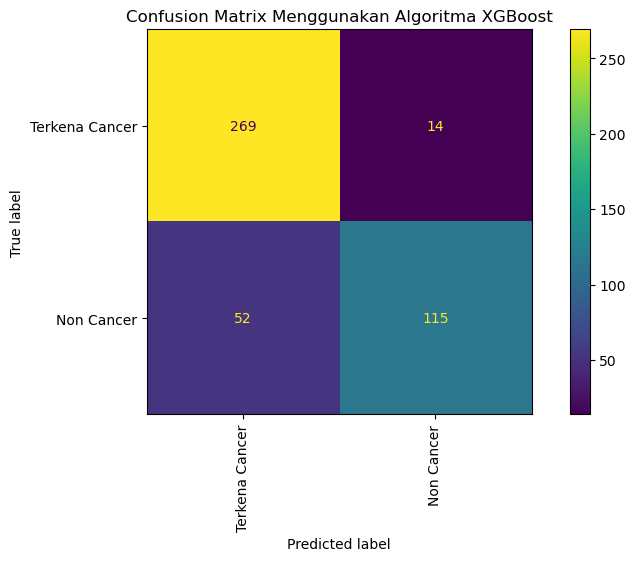

In [92]:
# Menampilkan evaluasi model XGBoost dengan dataset Diagnosis
make_evaluation(y_test, pred_xgb, title="Confusion Matrix Menggunakan Algoritma XGBoost")

Menggunakan XGBoost dimaknai:

1. 269 responden cancer telah diklasifikasikan dengan benar
2. 115 responden noncancer telah diklasifikasikan dengan benar
3. 52 responden noncancer diklasifikasikan sebagai responden cancer (False Positif)
4. 14 responden cancer diklasifikasikan sebagai responden noncancer (False Negatif)

## **Model Development dengan Algoritma Logistic Regeression**

In [95]:
#membuat object algoritma Logistic Regression
clf_lg = LogisticRegression(solver='sag',n_jobs=-1,random_state=50)

#memodelkan data dengan algoritma Logistic Regression
model_lg = clf_lg.fit(X_train,y_train)

#melakukan predict pda data test
pred_lg = model_lg.predict(X_test)

C:\Users\RAFLY A.R\anaconda3\envs\tfenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


algoritma logistic regression dengan parameter berikut:

  - solver : sag (Stochastic Average Gradient Descent), metode berbasis gradien stokastik, digunakan untuk menemukan parameter terbaik (koefisien) dalam model dengan data yang besar dan sparseness tinggi.

  - n_jobs=-1: Menentukan jumlah inti (cores) yang digunakan untuk menghitung. Jika diatur ke -1, model akan menggunakan semua inti yang tersedia, sehingga mempercepat proses pelatihan.

In [97]:
# Menampilkan akurasi model
accuracy_lg= round(accuracy_score(y_test, pred_lg)*100,2)
print("hasil akurasi model Logisik Regression: ", accuracy_lg,"%")

hasil akurasi model Logisik Regression:  81.11 %


                precision    recall  f1-score   support

Terkena Cancer       0.82      0.90      0.86       283
    Non Cancer       0.80      0.66      0.72       167

      accuracy                           0.81       450
     macro avg       0.81      0.78      0.79       450
  weighted avg       0.81      0.81      0.81       450



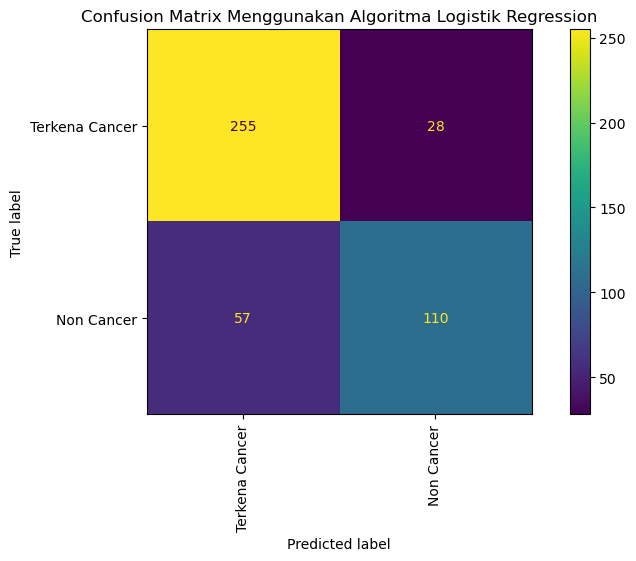

In [98]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_lg, title = f"Confusion Matrix Menggunakan Algoritma Logistik Regression")

Menggunakan Logistic Regression dimaknai:

1. 255 responden cancer telah diklasifikasikan dengan benar
2. 110 responden noncancer telah diklasifikasikan dengan benar
3. 57 responden noncancer diklasifikasikan sebagai responden cancer (False Positif)
4. 28 responden cancer diklasifikasikan sebagai responden noncancer (False Negatif)

## **Model Development dengan Algoritma Decision Tree**

In [143]:
# Ensure that X_train, X_test, y_train, y_test are converted to NumPy arrays if needed
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.DataFrame) else y_train
y_test = y_test.values if isinstance(y_test, pd.DataFrame) else y_test

def objective(trial):
    # Suggest hyperparameters from the search space for DecisionTreeClassifier
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)  # Integer values from 1 to 10
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)  # Integer values from 2 to 20
    max_depth = trial.suggest_int('max_depth', 1, 100)

    # Create the DecisionTreeClassifier model with suggested hyperparameters
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,
                                min_samples_split=min_samples_split,
                                max_depth=max_depth,
                                max_features= None,
                                random_state=42)  # Use a fixed random state for reproducibility

    # Train the model
    dt.fit(X_train, y_train)

    # Predict on the test set
    y_pred = dt.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # We want to maximize accuracy

# Create an Optuna study to optimize the hyperparameters
study = optuna.create_study(direction='maximize')  # 'maximize' because we want to maximize accuracy
study.optimize(objective, n_trials=500)  # Run the optimization for 50 trials

# Output the best hyperparameters found by Optuna
print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)

[I 2025-06-30 23:19:21,706] A new study created in memory with name: no-name-28787cf7-7cb9-41fb-8021-84d714590611
[I 2025-06-30 23:19:21,738] Trial 0 finished with value: 0.8866666666666667 and parameters: {'min_samples_leaf': 5, 'min_samples_split': 7, 'max_depth': 31}. Best is trial 0 with value: 0.8866666666666667.
[I 2025-06-30 23:19:21,757] Trial 1 finished with value: 0.8222222222222222 and parameters: {'min_samples_leaf': 22, 'min_samples_split': 29, 'max_depth': 73}. Best is trial 0 with value: 0.8866666666666667.
[I 2025-06-30 23:19:21,779] Trial 2 finished with value: 0.8222222222222222 and parameters: {'min_samples_leaf': 21, 'min_samples_split': 7, 'max_depth': 30}. Best is trial 0 with value: 0.8866666666666667.
[I 2025-06-30 23:19:21,799] Trial 3 finished with value: 0.8755555555555555 and parameters: {'min_samples_leaf': 2, 'min_samples_split': 21, 'max_depth': 81}. Best is trial 0 with value: 0.8866666666666667.
[I 2025-06-30 23:19:21,825] Trial 4 finished with value: 0

Best hyperparameters:  {'min_samples_leaf': 2, 'min_samples_split': 9, 'max_depth': 46}
Best accuracy:  0.9111111111111111


In [144]:
# Memanggil fungsi DecisionTreeClassifier dari library sklearn
model_dt = DecisionTreeClassifier(min_samples_leaf= 30, min_samples_split= 14, max_depth= 40,max_features=None)

# Melatih model KNN dengan data training pada X dan y
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40, min_samples_leaf=30, min_samples_split=14)

DecisionTreeClassifier dengan parameter sebagai berikut:

1. max_depth=40
→ Membatasi kedalaman maksimum pohon hingga 40. Tujuannya adalah untuk mengontrol kompleksitas model dan mencegah overfitting. Default-nya adalah None (pohon tumbuh sampai semua daun murni).

2. min_samples_leaf=30
→ Jumlah minimum sampel dalam setiap leaf (daun). Ini mencegah model membuat daun dari data sangat kecil (outlier), meningkatkan generalisasi.

3. min_samples_split=14
→ Jumlah minimum sampel pada sebuah node agar node itu bisa di-split. Dengan 14, node tidak akan dipisah jika memiliki kurang dari 14 sampel. Ini membantu menghindari pembelahan berlebihan pada data kecil.

4. max_features=None
→ Artinya semua fitur akan dipertimbangkan saat menentukan split terbaik di tiap node. Ini adalah default behavior jika None.

5. random_state=None (default)
→ Tidak ditentukan di kode, jadi nilai default None digunakan. Artinya, hasil pohon bisa sedikit berbeda setiap kali dijalankan.

In [146]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_dt = model_dt.predict(X_test)

# Menampilkan akurasi model
accuracy_dt= round(accuracy_score(y_test, pred_dt)*100,2)
print("hasil akurasi model Logisik Regression: ", accuracy_dt,"%")

hasil akurasi model Logisik Regression:  81.56 %


                precision    recall  f1-score   support

Terkena Cancer       0.83      0.89      0.86       283
    Non Cancer       0.78      0.69      0.74       167

      accuracy                           0.82       450
     macro avg       0.81      0.79      0.80       450
  weighted avg       0.81      0.82      0.81       450



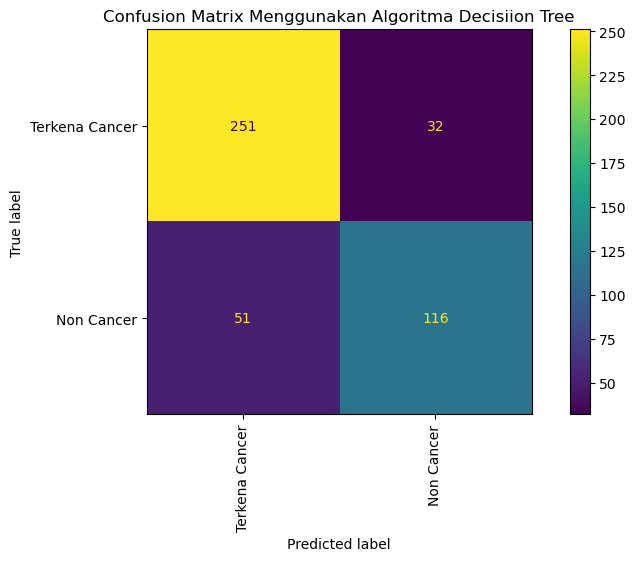

In [147]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_dt, title = f"Confusion Matrix Menggunakan Algoritma Decisiion Tree")

Menggunakan Decision Tree dimaknai:

1. 251 responden cancer telah diklasifikasikan dengan benar
2. 116 responden noncancer telah diklasifikasikan dengan benar
3. 51 responden noncancer diklasifikasikan sebagai responden cancer (False Positif)
4. 32 responden cancer diklasifikasikan sebagai responden noncancer (False Negatif)

## **Model Development dengan K-Nearest Neighbor**

In [154]:
# Memanggil fungsi KNeighborsClassifier dari library sklearn
model_knn = KNeighborsClassifier(n_neighbors = 20)

# Melatih model KNN dengan data training pada X dan y
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier dengan parameter sebagai berikut:

n_neighbors = 20 (jumlah tetangga yang dipertimbangkan untuk prediksi. Nilai kecil (1-10) cocok untuk pola lokal atau dataset kecil tetapi rawan noise. Nilai besar(11-20) membuat model lebih stabil atau dataset besar tetapi kurang peka terhadap detail lokal.)

In [157]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_knn = model_knn.predict(X_test)

# Menampilkan akurasi model
accuracy_knn= round(accuracy_score(y_test, pred_knn)*100,2)
print("hasil akurasi model Algoritma KNN: ", accuracy_knn,"%")

hasil akurasi model Algoritma KNN:  68.22 %


                precision    recall  f1-score   support

Terkena Cancer       0.67      0.97      0.79       283
    Non Cancer       0.79      0.20      0.32       167

      accuracy                           0.68       450
     macro avg       0.73      0.58      0.55       450
  weighted avg       0.71      0.68      0.62       450



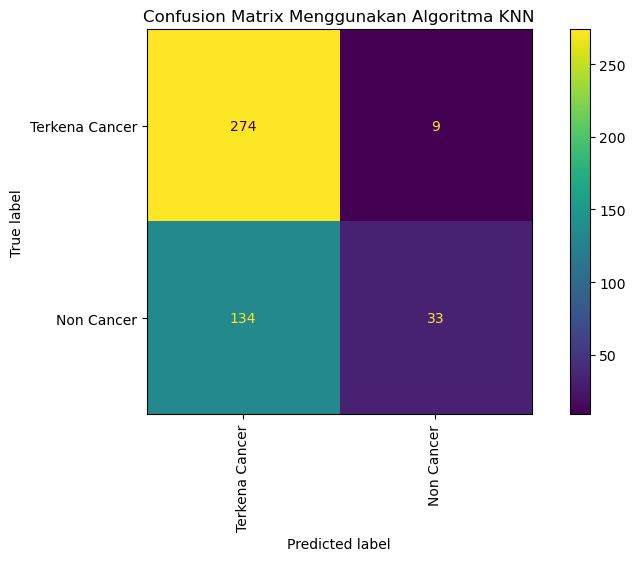

In [161]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_knn, title = f"Confusion Matrix Menggunakan Algoritma KNN")

Menggunakan K-Nearest Neighbor dimaknai:

1. 274 responden cancer telah diklasifikasikan dengan benar
2. 33 responden noncancer telah diklasifikasikan dengan benar
3. 134 responden noncancer diklasifikasikan sebagai responden cancer (False Positif)
4. 9 responden cancer diklasifikasikan sebagai responden noncancer (False Negatif)

## **Model Development dengan Random Forest**

In [165]:
# Memanggil fungsi RandomForestClassifier dari library sklearn
model_rf = RandomForestClassifier(n_estimators = 100, criterion = "entropy", max_depth = 10, random_state = 50)

# Melatih model Random Forest dengan data training pada X dan y
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=50)

Model RandomForestClassifier dilatih menggunakan data training dengan parameter sebagai berikut:

- n_estimators=100: Menggunakan 100 pohon keputusan (tree), meningkatkan stabilitas dan akurasi.

- criterion="entropy": Pemilihan split didasarkan pada informasi gain (lebih fokus pada kejelasan klasifikasi).

- max_depth=10: Membatasi kedalaman maksimum pohon agar tidak overfitting.

- random_state=50: Menjamin hasil yang konsisten saat kode dijalankan ulang.

Model ini memanfaatkan ensemble learning untuk menggabungkan kekuatan banyak pohon, sehingga mampu menangani variansi dan menghasilkan prediksi yang lebih andal.


In [168]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_rf = model_rf.predict(X_test)

# Menampilkan akurasi model
accuracy_rf= round(accuracy_score(y_test, pred_rf)*100,2)
print("hasil akurasi model Random Forest: ", accuracy_rf,"%")

hasil akurasi model Random Forest:  90.67 %


                precision    recall  f1-score   support

Terkena Cancer       0.90      0.96      0.93       283
    Non Cancer       0.92      0.82      0.87       167

      accuracy                           0.91       450
     macro avg       0.91      0.89      0.90       450
  weighted avg       0.91      0.91      0.91       450



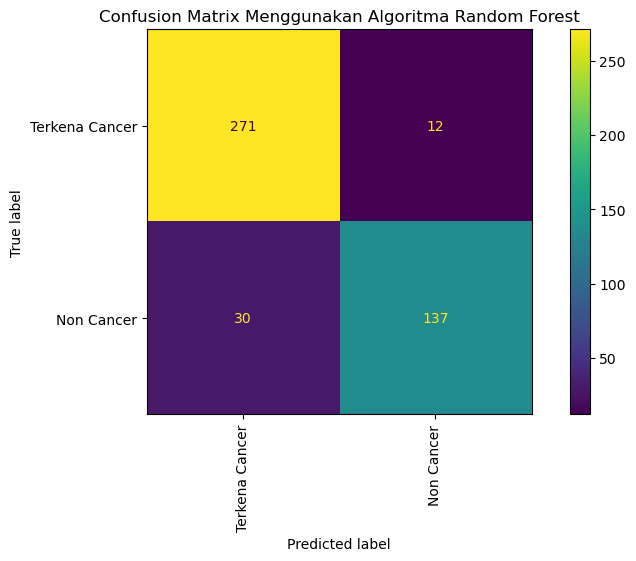

In [170]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_rf, title = f"Confusion Matrix Menggunakan Algoritma Random Forest")

Menggunakan K-Nearest Neighbor dimaknai:

1. 271 responden cancer telah diklasifikasikan dengan benar
2. 137 responden noncancer telah diklasifikasikan dengan benar
3. 30 responden noncancer diklasifikasikan sebagai responden cancer (False Positif)
4. 12 responden cancer diklasifikasikan sebagai responden noncancer (False Negatif)

## **Model Development dengan Catboost**

In [177]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate',0.001, 0.27),
        'depth': trial.suggest_int('depth', 3, 10),
        'random_strength': trial.suggest_int('random_strength', 1, 10)
    }

    # Create the cat classifier with the suggested hyperparameters
    cat = CatBoostClassifier(**params)

    # Train the classifier and evaluate on the validation set
    cat.fit(X_train, y_train)
    accuracy = cat.score(X_test, y_test)
    return accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100,timeout=600*12)

# Print the best hyperparameters and the corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)

[I 2025-06-30 23:24:56,164] A new study created in memory with name: no-name-1635020d-da7f-482e-960e-5f4d3b89289d


0:	learn: 0.6605440	total: 167ms	remaining: 1m 24s
1:	learn: 0.6183766	total: 183ms	remaining: 46.4s
2:	learn: 0.6021140	total: 186ms	remaining: 31.3s
3:	learn: 0.5765198	total: 189ms	remaining: 23.8s
4:	learn: 0.5280602	total: 209ms	remaining: 21s
5:	learn: 0.4912474	total: 220ms	remaining: 18.4s
6:	learn: 0.4666000	total: 231ms	remaining: 16.6s
7:	learn: 0.4398452	total: 244ms	remaining: 15.2s
8:	learn: 0.4099269	total: 255ms	remaining: 14.1s
9:	learn: 0.3932191	total: 267ms	remaining: 13.3s
10:	learn: 0.3769423	total: 280ms	remaining: 12.7s
11:	learn: 0.3585544	total: 292ms	remaining: 12.1s
12:	learn: 0.3379008	total: 304ms	remaining: 11.6s
13:	learn: 0.3293167	total: 309ms	remaining: 10.9s
14:	learn: 0.3262176	total: 312ms	remaining: 10.3s
15:	learn: 0.3080085	total: 325ms	remaining: 10s
16:	learn: 0.2890035	total: 339ms	remaining: 9.78s
17:	learn: 0.2794803	total: 351ms	remaining: 9.54s
18:	learn: 0.2704188	total: 362ms	remaining: 9.33s
19:	learn: 0.2620416	total: 379ms	remaining:

[I 2025-06-30 23:25:08,707] Trial 0 finished with value: 0.9355555555555556 and parameters: {'iterations': 508, 'learning_rate': 0.05906130823565533, 'depth': 9, 'random_strength': 2}. Best is trial 0 with value: 0.9355555555555556.


0:	learn: 0.6304344	total: 7.31ms	remaining: 1.56s
1:	learn: 0.5409331	total: 55.9ms	remaining: 5.95s
2:	learn: 0.5258788	total: 61.8ms	remaining: 4.37s
3:	learn: 0.4739263	total: 75.8ms	remaining: 4s
4:	learn: 0.4312430	total: 81.3ms	remaining: 3.41s
5:	learn: 0.3835770	total: 142ms	remaining: 4.94s
6:	learn: 0.3281654	total: 179ms	remaining: 5.31s
7:	learn: 0.2959856	total: 205ms	remaining: 5.32s
8:	learn: 0.2726925	total: 231ms	remaining: 5.29s
9:	learn: 0.2513451	total: 259ms	remaining: 5.3s
10:	learn: 0.2407636	total: 274ms	remaining: 5.09s
11:	learn: 0.2246737	total: 301ms	remaining: 5.09s
12:	learn: 0.2135592	total: 344ms	remaining: 5.34s
13:	learn: 0.2102956	total: 356ms	remaining: 5.12s
14:	learn: 0.1922542	total: 412ms	remaining: 5.5s
15:	learn: 0.1865472	total: 443ms	remaining: 5.51s
16:	learn: 0.1789947	total: 505ms	remaining: 5.88s
17:	learn: 0.1723819	total: 557ms	remaining: 6.09s
18:	learn: 0.1653813	total: 610ms	remaining: 6.29s
19:	learn: 0.1639547	total: 618ms	remaini

[I 2025-06-30 23:25:20,425] Trial 1 finished with value: 0.9266666666666666 and parameters: {'iterations': 215, 'learning_rate': 0.14628987544555078, 'depth': 10, 'random_strength': 3}. Best is trial 0 with value: 0.9355555555555556.


214:	learn: 0.0078287	total: 11.4s	remaining: 0us
0:	learn: 0.6464851	total: 7.14ms	remaining: 5.05s
1:	learn: 0.5875506	total: 15.9ms	remaining: 5.6s
2:	learn: 0.5380319	total: 26.3ms	remaining: 6.17s
3:	learn: 0.4880784	total: 34.2ms	remaining: 6.02s
4:	learn: 0.4698842	total: 40.8ms	remaining: 5.74s
5:	learn: 0.4346282	total: 50.1ms	remaining: 5.87s
6:	learn: 0.4088960	total: 58.8ms	remaining: 5.89s
7:	learn: 0.3946143	total: 69.8ms	remaining: 6.11s
8:	learn: 0.3814608	total: 85.2ms	remaining: 6.62s
9:	learn: 0.3672463	total: 101ms	remaining: 7.04s
10:	learn: 0.3524990	total: 107ms	remaining: 6.79s
11:	learn: 0.3476763	total: 115ms	remaining: 6.67s
12:	learn: 0.3378063	total: 121ms	remaining: 6.49s
13:	learn: 0.3313396	total: 132ms	remaining: 6.56s
14:	learn: 0.3230327	total: 148ms	remaining: 6.82s
15:	learn: 0.3075340	total: 179ms	remaining: 7.75s
16:	learn: 0.3017862	total: 184ms	remaining: 7.47s
17:	learn: 0.2979468	total: 191ms	remaining: 7.31s
18:	learn: 0.2914328	total: 196ms	

[I 2025-06-30 23:25:25,842] Trial 2 finished with value: 0.9155555555555556 and parameters: {'iterations': 708, 'learning_rate': 0.20543136439901202, 'depth': 5, 'random_strength': 8}. Best is trial 0 with value: 0.9355555555555556.


0:	learn: 0.6892245	total: 15.4ms	remaining: 5.7s
1:	learn: 0.6862089	total: 20.4ms	remaining: 3.77s
2:	learn: 0.6832051	total: 33.8ms	remaining: 4.14s
3:	learn: 0.6792161	total: 48.3ms	remaining: 4.43s
4:	learn: 0.6770381	total: 70.5ms	remaining: 5.16s
5:	learn: 0.6729614	total: 82ms	remaining: 4.99s
6:	learn: 0.6708748	total: 85.5ms	remaining: 4.45s
7:	learn: 0.6660611	total: 94ms	remaining: 4.26s
8:	learn: 0.6621789	total: 98.6ms	remaining: 3.96s
9:	learn: 0.6576965	total: 102ms	remaining: 3.69s
10:	learn: 0.6521613	total: 111ms	remaining: 3.63s
11:	learn: 0.6495623	total: 114ms	remaining: 3.41s
12:	learn: 0.6463588	total: 118ms	remaining: 3.24s
13:	learn: 0.6431009	total: 122ms	remaining: 3.12s
14:	learn: 0.6411042	total: 125ms	remaining: 2.98s
15:	learn: 0.6381076	total: 129ms	remaining: 2.86s
16:	learn: 0.6363249	total: 132ms	remaining: 2.74s
17:	learn: 0.6330393	total: 137ms	remaining: 2.68s
18:	learn: 0.6313306	total: 141ms	remaining: 2.61s
19:	learn: 0.6263556	total: 145ms	rem

[I 2025-06-30 23:25:28,080] Trial 3 finished with value: 0.9044444444444445 and parameters: {'iterations': 371, 'learning_rate': 0.007909324659606014, 'depth': 5, 'random_strength': 4}. Best is trial 0 with value: 0.9355555555555556.


367:	learn: 0.2935906	total: 1.99s	remaining: 16.2ms
368:	learn: 0.2930952	total: 1.99s	remaining: 10.8ms
369:	learn: 0.2927150	total: 2s	remaining: 5.41ms
370:	learn: 0.2921306	total: 2s	remaining: 0us
0:	learn: 0.6834425	total: 6.13ms	remaining: 2.88s
1:	learn: 0.6766250	total: 9.9ms	remaining: 2.32s
2:	learn: 0.6706564	total: 15.6ms	remaining: 2.43s
3:	learn: 0.6639832	total: 19.1ms	remaining: 2.22s
4:	learn: 0.6524681	total: 25.1ms	remaining: 2.34s
5:	learn: 0.6459832	total: 31.6ms	remaining: 2.44s
6:	learn: 0.6413072	total: 37.3ms	remaining: 2.47s
7:	learn: 0.6357476	total: 43.1ms	remaining: 2.49s
8:	learn: 0.6322412	total: 46ms	remaining: 2.35s
9:	learn: 0.6268067	total: 51.8ms	remaining: 2.38s
10:	learn: 0.6220836	total: 58.2ms	remaining: 2.43s
11:	learn: 0.6120960	total: 65.4ms	remaining: 2.49s
12:	learn: 0.6060881	total: 71ms	remaining: 2.49s
13:	learn: 0.5945872	total: 76.5ms	remaining: 2.49s
14:	learn: 0.5870658	total: 82.1ms	remaining: 2.49s
15:	learn: 0.5814897	total: 88.3

[I 2025-06-30 23:25:34,103] Trial 4 finished with value: 0.9133333333333333 and parameters: {'iterations': 470, 'learning_rate': 0.01823066104520695, 'depth': 7, 'random_strength': 10}. Best is trial 0 with value: 0.9355555555555556.


0:	learn: 0.6406044	total: 7.6ms	remaining: 4.47s
1:	learn: 0.5759199	total: 26.3ms	remaining: 7.73s
2:	learn: 0.5539577	total: 31.4ms	remaining: 6.14s
3:	learn: 0.5206142	total: 41ms	remaining: 5.99s
4:	learn: 0.4740868	total: 64ms	remaining: 7.48s
5:	learn: 0.4376131	total: 92.4ms	remaining: 8.97s
6:	learn: 0.4087707	total: 112ms	remaining: 9.35s
7:	learn: 0.3870302	total: 130ms	remaining: 9.41s
8:	learn: 0.3620889	total: 144ms	remaining: 9.31s
9:	learn: 0.3368834	total: 162ms	remaining: 9.36s
10:	learn: 0.3164710	total: 177ms	remaining: 9.32s
11:	learn: 0.3026215	total: 192ms	remaining: 9.23s
12:	learn: 0.2899157	total: 217ms	remaining: 9.61s
13:	learn: 0.2819772	total: 232ms	remaining: 9.55s
14:	learn: 0.2639028	total: 242ms	remaining: 9.25s
15:	learn: 0.2573438	total: 257ms	remaining: 9.2s
16:	learn: 0.2553522	total: 263ms	remaining: 8.86s
17:	learn: 0.2479881	total: 274ms	remaining: 8.69s
18:	learn: 0.2397329	total: 288ms	remaining: 8.65s
19:	learn: 0.2286206	total: 307ms	remaini

[I 2025-06-30 23:25:43,787] Trial 5 finished with value: 0.9222222222222223 and parameters: {'iterations': 589, 'learning_rate': 0.09795133813907417, 'depth': 8, 'random_strength': 2}. Best is trial 0 with value: 0.9355555555555556.


0:	learn: 0.6880994	total: 7.34ms	remaining: 3.49s
1:	learn: 0.6792659	total: 26.6ms	remaining: 6.3s
2:	learn: 0.6766430	total: 38.1ms	remaining: 6.01s
3:	learn: 0.6719627	total: 44.7ms	remaining: 5.27s
4:	learn: 0.6631189	total: 77.4ms	remaining: 7.29s
5:	learn: 0.6556979	total: 106ms	remaining: 8.3s
6:	learn: 0.6506044	total: 114ms	remaining: 7.61s
7:	learn: 0.6429583	total: 139ms	remaining: 8.14s
8:	learn: 0.6342444	total: 161ms	remaining: 8.35s
9:	learn: 0.6285290	total: 175ms	remaining: 8.17s
10:	learn: 0.6234914	total: 186ms	remaining: 7.86s
11:	learn: 0.6153405	total: 206ms	remaining: 7.95s
12:	learn: 0.6092318	total: 227ms	remaining: 8.07s
13:	learn: 0.6023317	total: 239ms	remaining: 7.9s
14:	learn: 0.5975924	total: 252ms	remaining: 7.76s
15:	learn: 0.5918093	total: 267ms	remaining: 7.68s
16:	learn: 0.5864099	total: 277ms	remaining: 7.49s
17:	learn: 0.5837237	total: 280ms	remaining: 7.13s
18:	learn: 0.5772099	total: 289ms	remaining: 6.95s
19:	learn: 0.5728656	total: 297ms	remai

[I 2025-06-30 23:25:51,160] Trial 6 finished with value: 0.9177777777777778 and parameters: {'iterations': 476, 'learning_rate': 0.010713514227323875, 'depth': 8, 'random_strength': 3}. Best is trial 0 with value: 0.9355555555555556.


0:	learn: 0.6477208	total: 4.93ms	remaining: 2.64s
1:	learn: 0.5901400	total: 12.3ms	remaining: 3.29s
2:	learn: 0.5502455	total: 18.6ms	remaining: 3.31s
3:	learn: 0.5122051	total: 26.2ms	remaining: 3.5s
4:	learn: 0.4851075	total: 34.4ms	remaining: 3.66s
5:	learn: 0.4559756	total: 42.2ms	remaining: 3.74s
6:	learn: 0.4230126	total: 48.6ms	remaining: 3.68s
7:	learn: 0.4029703	total: 54.8ms	remaining: 3.62s
8:	learn: 0.3783360	total: 62.1ms	remaining: 3.65s
9:	learn: 0.3644103	total: 68.4ms	remaining: 3.6s
10:	learn: 0.3570807	total: 71.9ms	remaining: 3.44s
11:	learn: 0.3418628	total: 82ms	remaining: 3.59s
12:	learn: 0.3292527	total: 88.3ms	remaining: 3.56s
13:	learn: 0.3202793	total: 96ms	remaining: 3.58s
14:	learn: 0.3043107	total: 102ms	remaining: 3.56s
15:	learn: 0.2970603	total: 109ms	remaining: 3.56s
16:	learn: 0.2888384	total: 116ms	remaining: 3.54s
17:	learn: 0.2759615	total: 123ms	remaining: 3.53s
18:	learn: 0.2703520	total: 129ms	remaining: 3.52s
19:	learn: 0.2629392	total: 135ms

[I 2025-06-30 23:25:55,149] Trial 7 finished with value: 0.9222222222222223 and parameters: {'iterations': 537, 'learning_rate': 0.08379708345954236, 'depth': 7, 'random_strength': 2}. Best is trial 0 with value: 0.9355555555555556.


526:	learn: 0.0109178	total: 3.65s	remaining: 69.3ms
527:	learn: 0.0108827	total: 3.66s	remaining: 62.4ms
528:	learn: 0.0108610	total: 3.66s	remaining: 55.4ms
529:	learn: 0.0108211	total: 3.67s	remaining: 48.5ms
530:	learn: 0.0107918	total: 3.68s	remaining: 41.6ms
531:	learn: 0.0107612	total: 3.69s	remaining: 34.6ms
532:	learn: 0.0107205	total: 3.69s	remaining: 27.7ms
533:	learn: 0.0106915	total: 3.7s	remaining: 20.8ms
534:	learn: 0.0106620	total: 3.7s	remaining: 13.8ms
535:	learn: 0.0106075	total: 3.71s	remaining: 6.92ms
536:	learn: 0.0105750	total: 3.72s	remaining: 0us
0:	learn: 0.6336270	total: 29.2ms	remaining: 22.6s
1:	learn: 0.5847885	total: 37.8ms	remaining: 14.6s
2:	learn: 0.5550195	total: 50.9ms	remaining: 13.1s
3:	learn: 0.5263155	total: 76ms	remaining: 14.7s
4:	learn: 0.4909239	total: 84.5ms	remaining: 13s
5:	learn: 0.4718690	total: 110ms	remaining: 14.1s
6:	learn: 0.4643125	total: 112ms	remaining: 12.3s
7:	learn: 0.4392678	total: 141ms	remaining: 13.5s
8:	learn: 0.4171835	t

[I 2025-06-30 23:26:20,386] Trial 8 finished with value: 0.9266666666666666 and parameters: {'iterations': 775, 'learning_rate': 0.08772874350499653, 'depth': 10, 'random_strength': 8}. Best is trial 0 with value: 0.9355555555555556.


0:	learn: 0.6852300	total: 4.22ms	remaining: 2.23s
1:	learn: 0.6766555	total: 7.62ms	remaining: 2.01s
2:	learn: 0.6620568	total: 11.8ms	remaining: 2.07s
3:	learn: 0.6532685	total: 15ms	remaining: 1.98s
4:	learn: 0.6418398	total: 18.5ms	remaining: 1.94s
5:	learn: 0.6395389	total: 20.8ms	remaining: 1.82s
6:	learn: 0.6354729	total: 23.6ms	remaining: 1.76s
7:	learn: 0.6278810	total: 27.3ms	remaining: 1.78s
8:	learn: 0.6169900	total: 30.4ms	remaining: 1.76s
9:	learn: 0.6138344	total: 32.6ms	remaining: 1.69s
10:	learn: 0.6109311	total: 34.7ms	remaining: 1.64s
11:	learn: 0.6007881	total: 38ms	remaining: 1.64s
12:	learn: 0.5870227	total: 42.2ms	remaining: 1.68s
13:	learn: 0.5835148	total: 45.9ms	remaining: 1.69s
14:	learn: 0.5739435	total: 48.9ms	remaining: 1.68s
15:	learn: 0.5669974	total: 52.1ms	remaining: 1.67s
16:	learn: 0.5523151	total: 55.1ms	remaining: 1.66s
17:	learn: 0.5409953	total: 59.1ms	remaining: 1.68s
18:	learn: 0.5323692	total: 62.7ms	remaining: 1.69s
19:	learn: 0.5268622	total

[I 2025-06-30 23:26:22,545] Trial 9 finished with value: 0.9288888888888889 and parameters: {'iterations': 530, 'learning_rate': 0.03961037766034576, 'depth': 4, 'random_strength': 10}. Best is trial 0 with value: 0.9355555555555556.


492:	learn: 0.1319452	total: 1.79s	remaining: 135ms
493:	learn: 0.1317699	total: 1.8s	remaining: 131ms
494:	learn: 0.1315660	total: 1.8s	remaining: 127ms
495:	learn: 0.1314303	total: 1.8s	remaining: 124ms
496:	learn: 0.1313075	total: 1.81s	remaining: 120ms
497:	learn: 0.1309742	total: 1.81s	remaining: 116ms
498:	learn: 0.1308096	total: 1.81s	remaining: 113ms
499:	learn: 0.1306665	total: 1.82s	remaining: 109ms
500:	learn: 0.1305329	total: 1.82s	remaining: 106ms
501:	learn: 0.1304767	total: 1.83s	remaining: 102ms
502:	learn: 0.1302299	total: 1.83s	remaining: 98.4ms
503:	learn: 0.1301769	total: 1.83s	remaining: 94.7ms
504:	learn: 0.1299745	total: 1.84s	remaining: 91.1ms
505:	learn: 0.1297717	total: 1.84s	remaining: 87.4ms
506:	learn: 0.1296477	total: 1.85s	remaining: 83.8ms
507:	learn: 0.1295975	total: 1.85s	remaining: 80.1ms
508:	learn: 0.1294193	total: 1.85s	remaining: 76.5ms
509:	learn: 0.1292441	total: 1.86s	remaining: 72.8ms
510:	learn: 0.1290617	total: 1.86s	remaining: 69.2ms
511:	l

[I 2025-06-30 23:26:39,547] Trial 10 finished with value: 0.9244444444444444 and parameters: {'iterations': 981, 'learning_rate': 0.2697591663365946, 'depth': 9, 'random_strength': 5}. Best is trial 0 with value: 0.9355555555555556.


0:	learn: 0.6838648	total: 2.76ms	remaining: 783ms
1:	learn: 0.6670270	total: 5.56ms	remaining: 787ms
2:	learn: 0.6551564	total: 8.34ms	remaining: 784ms
3:	learn: 0.6448497	total: 11.4ms	remaining: 803ms
4:	learn: 0.6283947	total: 14ms	remaining: 782ms
5:	learn: 0.6245123	total: 16.4ms	remaining: 762ms
6:	learn: 0.6132979	total: 19.2ms	remaining: 764ms
7:	learn: 0.6059324	total: 21.9ms	remaining: 757ms
8:	learn: 0.5994820	total: 24.7ms	remaining: 756ms
9:	learn: 0.5847902	total: 27.2ms	remaining: 748ms
10:	learn: 0.5740507	total: 29.8ms	remaining: 742ms
11:	learn: 0.5695050	total: 32.8ms	remaining: 747ms
12:	learn: 0.5580456	total: 35.9ms	remaining: 750ms
13:	learn: 0.5530316	total: 38.4ms	remaining: 744ms
14:	learn: 0.5453590	total: 41.4ms	remaining: 746ms
15:	learn: 0.5363001	total: 44.1ms	remaining: 742ms
16:	learn: 0.5277306	total: 46.8ms	remaining: 737ms
17:	learn: 0.5201644	total: 49.5ms	remaining: 734ms
18:	learn: 0.5133179	total: 52.1ms	remaining: 729ms
19:	learn: 0.5091159	tot

[I 2025-06-30 23:26:40,553] Trial 11 finished with value: 0.9422222222222222 and parameters: {'iterations': 285, 'learning_rate': 0.04922186863939725, 'depth': 3, 'random_strength': 6}. Best is trial 11 with value: 0.9422222222222222.


273:	learn: 0.2015678	total: 780ms	remaining: 31.3ms
274:	learn: 0.2012288	total: 783ms	remaining: 28.5ms
275:	learn: 0.2008870	total: 785ms	remaining: 25.6ms
276:	learn: 0.2003043	total: 788ms	remaining: 22.8ms
277:	learn: 0.1997644	total: 791ms	remaining: 19.9ms
278:	learn: 0.1994435	total: 794ms	remaining: 17.1ms
279:	learn: 0.1991365	total: 797ms	remaining: 14.2ms
280:	learn: 0.1986943	total: 800ms	remaining: 11.4ms
281:	learn: 0.1983610	total: 803ms	remaining: 8.54ms
282:	learn: 0.1977837	total: 806ms	remaining: 5.69ms
283:	learn: 0.1973688	total: 810ms	remaining: 2.85ms
284:	learn: 0.1970817	total: 813ms	remaining: 0us
0:	learn: 0.6857539	total: 1.37ms	remaining: 169ms
1:	learn: 0.6742103	total: 2.74ms	remaining: 167ms
2:	learn: 0.6672283	total: 3.84ms	remaining: 155ms
3:	learn: 0.6540675	total: 4.94ms	remaining: 148ms
4:	learn: 0.6410270	total: 6.04ms	remaining: 144ms
5:	learn: 0.6274672	total: 6.97ms	remaining: 137ms
6:	learn: 0.6228544	total: 7.93ms	remaining: 133ms
7:	learn: 

[I 2025-06-30 23:26:40,859] Trial 12 finished with value: 0.9066666666666666 and parameters: {'iterations': 124, 'learning_rate': 0.05779988234120213, 'depth': 3, 'random_strength': 7}. Best is trial 11 with value: 0.9422222222222222.


41:	learn: 0.4478675	total: 51.2ms	remaining: 99.9ms
42:	learn: 0.4453839	total: 52.2ms	remaining: 98.3ms
43:	learn: 0.4418091	total: 53.6ms	remaining: 97.4ms
44:	learn: 0.4383626	total: 55.1ms	remaining: 96.8ms
45:	learn: 0.4366020	total: 56.6ms	remaining: 95.9ms
46:	learn: 0.4337864	total: 57.8ms	remaining: 94.7ms
47:	learn: 0.4314968	total: 59.6ms	remaining: 94.4ms
48:	learn: 0.4292660	total: 61.2ms	remaining: 93.7ms
49:	learn: 0.4283273	total: 62.7ms	remaining: 92.9ms
50:	learn: 0.4255026	total: 64.5ms	remaining: 92.4ms
51:	learn: 0.4245724	total: 65.9ms	remaining: 91.3ms
52:	learn: 0.4215110	total: 67.4ms	remaining: 90.3ms
53:	learn: 0.4193028	total: 68.6ms	remaining: 88.9ms
54:	learn: 0.4190637	total: 69.9ms	remaining: 87.6ms
55:	learn: 0.4173265	total: 71.3ms	remaining: 86.6ms
56:	learn: 0.4157472	total: 73.2ms	remaining: 86.1ms
57:	learn: 0.4141191	total: 74.6ms	remaining: 84.9ms
58:	learn: 0.4116059	total: 75.9ms	remaining: 83.6ms
59:	learn: 0.4104661	total: 77.2ms	remaining: 

[I 2025-06-30 23:26:42,484] Trial 13 finished with value: 0.9177777777777778 and parameters: {'iterations': 318, 'learning_rate': 0.13798770845134148, 'depth': 6, 'random_strength': 6}. Best is trial 11 with value: 0.9422222222222222.


314:	learn: 0.0195775	total: 1.39s	remaining: 13.3ms
315:	learn: 0.0195317	total: 1.4s	remaining: 8.85ms
316:	learn: 0.0194451	total: 1.4s	remaining: 4.43ms
317:	learn: 0.0193709	total: 1.41s	remaining: 0us
0:	learn: 0.6381075	total: 3.23ms	remaining: 1.03s
1:	learn: 0.6018301	total: 5.78ms	remaining: 922ms
2:	learn: 0.5680575	total: 8.49ms	remaining: 900ms
3:	learn: 0.5509911	total: 10.8ms	remaining: 853ms
4:	learn: 0.5267252	total: 13.2ms	remaining: 835ms
5:	learn: 0.5041330	total: 15.9ms	remaining: 834ms
6:	learn: 0.4900949	total: 18.3ms	remaining: 820ms
7:	learn: 0.4747644	total: 20.8ms	remaining: 813ms
8:	learn: 0.4559660	total: 23.6ms	remaining: 818ms
9:	learn: 0.4388048	total: 26ms	remaining: 809ms
10:	learn: 0.4264320	total: 28.4ms	remaining: 802ms
11:	learn: 0.4157511	total: 31.4ms	remaining: 809ms
12:	learn: 0.4053492	total: 34.5ms	remaining: 818ms
13:	learn: 0.3954535	total: 37.2ms	remaining: 816ms
14:	learn: 0.3883595	total: 39.6ms	remaining: 809ms
15:	learn: 0.3794445	tota

[I 2025-06-30 23:26:43,523] Trial 14 finished with value: 0.9377777777777778 and parameters: {'iterations': 321, 'learning_rate': 0.1110191498271068, 'depth': 3, 'random_strength': 1}. Best is trial 11 with value: 0.9422222222222222.


0:	learn: 0.6174341	total: 2.54ms	remaining: 767ms
1:	learn: 0.5727256	total: 4.99ms	remaining: 750ms
2:	learn: 0.5320138	total: 7.37ms	remaining: 737ms
3:	learn: 0.5045274	total: 10.7ms	remaining: 798ms
4:	learn: 0.4753950	total: 13.3ms	remaining: 791ms
5:	learn: 0.4573657	total: 15.6ms	remaining: 775ms
6:	learn: 0.4408247	total: 18ms	remaining: 760ms
7:	learn: 0.4214076	total: 20.3ms	remaining: 748ms
8:	learn: 0.4056381	total: 22.7ms	remaining: 740ms
9:	learn: 0.3919848	total: 25.6ms	remaining: 751ms
10:	learn: 0.3809273	total: 28.2ms	remaining: 747ms
11:	learn: 0.3706948	total: 30.6ms	remaining: 741ms
12:	learn: 0.3596316	total: 33.2ms	remaining: 740ms
13:	learn: 0.3538427	total: 35.5ms	remaining: 733ms
14:	learn: 0.3466298	total: 38.1ms	remaining: 731ms
15:	learn: 0.3392857	total: 40.7ms	remaining: 731ms
16:	learn: 0.3327421	total: 43.3ms	remaining: 728ms
17:	learn: 0.3263390	total: 45.8ms	remaining: 725ms
18:	learn: 0.3186606	total: 48.3ms	remaining: 722ms
19:	learn: 0.3112631	tot

[I 2025-06-30 23:26:44,521] Trial 15 finished with value: 0.9288888888888889 and parameters: {'iterations': 303, 'learning_rate': 0.15837561639953973, 'depth': 3, 'random_strength': 1}. Best is trial 11 with value: 0.9422222222222222.


280:	learn: 0.0818325	total: 746ms	remaining: 58.4ms
281:	learn: 0.0813407	total: 749ms	remaining: 55.7ms
282:	learn: 0.0810585	total: 751ms	remaining: 53.1ms
283:	learn: 0.0809461	total: 754ms	remaining: 50.4ms
284:	learn: 0.0806252	total: 757ms	remaining: 47.8ms
285:	learn: 0.0805327	total: 760ms	remaining: 45.2ms
286:	learn: 0.0799995	total: 763ms	remaining: 42.6ms
287:	learn: 0.0798810	total: 768ms	remaining: 40ms
288:	learn: 0.0795761	total: 770ms	remaining: 37.3ms
289:	learn: 0.0790401	total: 775ms	remaining: 34.8ms
290:	learn: 0.0789091	total: 778ms	remaining: 32.1ms
291:	learn: 0.0786692	total: 781ms	remaining: 29.4ms
292:	learn: 0.0780298	total: 783ms	remaining: 26.7ms
293:	learn: 0.0778476	total: 786ms	remaining: 24ms
294:	learn: 0.0775228	total: 788ms	remaining: 21.4ms
295:	learn: 0.0773254	total: 793ms	remaining: 18.7ms
296:	learn: 0.0769920	total: 795ms	remaining: 16.1ms
297:	learn: 0.0764417	total: 797ms	remaining: 13.4ms
298:	learn: 0.0762881	total: 800ms	remaining: 10.7

[I 2025-06-30 23:26:44,788] Trial 16 finished with value: 0.9355555555555556 and parameters: {'iterations': 109, 'learning_rate': 0.1870545131731182, 'depth': 4, 'random_strength': 6}. Best is trial 11 with value: 0.9422222222222222.


37:	learn: 0.2966336	total: 53.9ms	remaining: 101ms
38:	learn: 0.2930368	total: 55.9ms	remaining: 100ms
39:	learn: 0.2919424	total: 57.5ms	remaining: 99.1ms
40:	learn: 0.2878053	total: 59ms	remaining: 97.9ms
41:	learn: 0.2851364	total: 60.6ms	remaining: 96.8ms
42:	learn: 0.2820746	total: 62.3ms	remaining: 95.6ms
43:	learn: 0.2791705	total: 64.1ms	remaining: 94.8ms
44:	learn: 0.2749953	total: 66.4ms	remaining: 94.4ms
45:	learn: 0.2722841	total: 68.3ms	remaining: 93.6ms
46:	learn: 0.2692777	total: 69.8ms	remaining: 92.1ms
47:	learn: 0.2670611	total: 71.1ms	remaining: 90.4ms
48:	learn: 0.2639690	total: 72.4ms	remaining: 88.7ms
49:	learn: 0.2605413	total: 73.7ms	remaining: 87ms
50:	learn: 0.2572385	total: 75.8ms	remaining: 86.3ms
51:	learn: 0.2544978	total: 77.2ms	remaining: 84.6ms
52:	learn: 0.2513071	total: 78.5ms	remaining: 82.9ms
53:	learn: 0.2482568	total: 79.8ms	remaining: 81.3ms
54:	learn: 0.2456884	total: 81.1ms	remaining: 79.6ms
55:	learn: 0.2434307	total: 82.4ms	remaining: 77.9ms

[I 2025-06-30 23:26:45,624] Trial 17 finished with value: 0.9311111111111111 and parameters: {'iterations': 228, 'learning_rate': 0.11518544478572079, 'depth': 4, 'random_strength': 5}. Best is trial 11 with value: 0.9422222222222222.


192:	learn: 0.1118116	total: 575ms	remaining: 104ms
193:	learn: 0.1110930	total: 577ms	remaining: 101ms
194:	learn: 0.1109619	total: 580ms	remaining: 98.2ms
195:	learn: 0.1106383	total: 583ms	remaining: 95.2ms
196:	learn: 0.1101068	total: 586ms	remaining: 92.2ms
197:	learn: 0.1096689	total: 589ms	remaining: 89.2ms
198:	learn: 0.1088985	total: 593ms	remaining: 86.4ms
199:	learn: 0.1079956	total: 596ms	remaining: 83.5ms
200:	learn: 0.1076858	total: 599ms	remaining: 80.5ms
201:	learn: 0.1070259	total: 602ms	remaining: 77.4ms
202:	learn: 0.1060396	total: 604ms	remaining: 74.4ms
203:	learn: 0.1058846	total: 608ms	remaining: 71.5ms
204:	learn: 0.1051210	total: 611ms	remaining: 68.5ms
205:	learn: 0.1048425	total: 613ms	remaining: 65.5ms
206:	learn: 0.1043969	total: 616ms	remaining: 62.5ms
207:	learn: 0.1042288	total: 619ms	remaining: 59.5ms
208:	learn: 0.1035342	total: 622ms	remaining: 56.5ms
209:	learn: 0.1030211	total: 625ms	remaining: 53.6ms
210:	learn: 0.1022009	total: 628ms	remaining: 50

[I 2025-06-30 23:26:46,945] Trial 18 finished with value: 0.94 and parameters: {'iterations': 398, 'learning_rate': 0.05289466479290292, 'depth': 3, 'random_strength': 8}. Best is trial 11 with value: 0.9422222222222222.


346:	learn: 0.1714002	total: 971ms	remaining: 143ms
347:	learn: 0.1711498	total: 975ms	remaining: 140ms
348:	learn: 0.1709153	total: 978ms	remaining: 137ms
349:	learn: 0.1706516	total: 980ms	remaining: 134ms
350:	learn: 0.1704120	total: 983ms	remaining: 132ms
351:	learn: 0.1701306	total: 986ms	remaining: 129ms
352:	learn: 0.1699418	total: 989ms	remaining: 126ms
353:	learn: 0.1697100	total: 992ms	remaining: 123ms
354:	learn: 0.1695385	total: 994ms	remaining: 120ms
355:	learn: 0.1692545	total: 997ms	remaining: 118ms
356:	learn: 0.1689635	total: 1s	remaining: 115ms
357:	learn: 0.1687689	total: 1s	remaining: 112ms
358:	learn: 0.1684841	total: 1.01s	remaining: 109ms
359:	learn: 0.1682849	total: 1.01s	remaining: 107ms
360:	learn: 0.1679971	total: 1.01s	remaining: 104ms
361:	learn: 0.1675309	total: 1.02s	remaining: 101ms
362:	learn: 0.1672722	total: 1.02s	remaining: 98.2ms
363:	learn: 0.1669481	total: 1.02s	remaining: 95.4ms
364:	learn: 0.1666871	total: 1.02s	remaining: 92.6ms
365:	learn: 0.1

[I 2025-06-30 23:26:48,710] Trial 19 finished with value: 0.92 and parameters: {'iterations': 406, 'learning_rate': 0.05292464962414567, 'depth': 5, 'random_strength': 8}. Best is trial 11 with value: 0.9422222222222222.


0:	learn: 0.6769465	total: 4.54ms	remaining: 2.96s
1:	learn: 0.6628100	total: 8.36ms	remaining: 2.72s
2:	learn: 0.6516064	total: 12.1ms	remaining: 2.63s
3:	learn: 0.6419582	total: 15.8ms	remaining: 2.56s
4:	learn: 0.6211488	total: 20.1ms	remaining: 2.6s
5:	learn: 0.6117660	total: 24.1ms	remaining: 2.6s
6:	learn: 0.5962775	total: 28.6ms	remaining: 2.64s
7:	learn: 0.5819679	total: 32.9ms	remaining: 2.65s
8:	learn: 0.5733134	total: 37.1ms	remaining: 2.65s
9:	learn: 0.5600085	total: 40.8ms	remaining: 2.62s
10:	learn: 0.5566530	total: 43ms	remaining: 2.51s
11:	learn: 0.5441668	total: 46.7ms	remaining: 2.5s
12:	learn: 0.5337971	total: 50.9ms	remaining: 2.5s
13:	learn: 0.5208593	total: 54.6ms	remaining: 2.49s
14:	learn: 0.5134418	total: 58.3ms	remaining: 2.48s
15:	learn: 0.5005385	total: 63.6ms	remaining: 2.53s
16:	learn: 0.4962227	total: 68.9ms	remaining: 2.58s
17:	learn: 0.4934691	total: 72.6ms	remaining: 2.56s
18:	learn: 0.4828669	total: 76.4ms	remaining: 2.55s
19:	learn: 0.4787741	total: 

[I 2025-06-30 23:26:52,588] Trial 20 finished with value: 0.9266666666666666 and parameters: {'iterations': 653, 'learning_rate': 0.034351086263048, 'depth': 6, 'random_strength': 9}. Best is trial 11 with value: 0.9422222222222222.


637:	learn: 0.0603050	total: 3.42s	remaining: 80.4ms
638:	learn: 0.0601384	total: 3.43s	remaining: 75.1ms
639:	learn: 0.0599206	total: 3.43s	remaining: 69.8ms
640:	learn: 0.0597750	total: 3.44s	remaining: 64.4ms
641:	learn: 0.0596484	total: 3.45s	remaining: 59.1ms
642:	learn: 0.0594485	total: 3.46s	remaining: 53.8ms
643:	learn: 0.0593444	total: 3.47s	remaining: 48.4ms
644:	learn: 0.0591650	total: 3.47s	remaining: 43.1ms
645:	learn: 0.0590393	total: 3.48s	remaining: 37.7ms
646:	learn: 0.0589290	total: 3.48s	remaining: 32.3ms
647:	learn: 0.0586157	total: 3.49s	remaining: 26.9ms
648:	learn: 0.0584783	total: 3.5s	remaining: 21.6ms
649:	learn: 0.0583221	total: 3.5s	remaining: 16.2ms
650:	learn: 0.0581370	total: 3.51s	remaining: 10.8ms
651:	learn: 0.0580548	total: 3.52s	remaining: 5.39ms
652:	learn: 0.0578432	total: 3.52s	remaining: 0us
0:	learn: 0.6773527	total: 2.83ms	remaining: 648ms
1:	learn: 0.6484470	total: 6.24ms	remaining: 711ms
2:	learn: 0.6361828	total: 8.76ms	remaining: 663ms
3:	l

[I 2025-06-30 23:26:53,657] Trial 21 finished with value: 0.9311111111111111 and parameters: {'iterations': 230, 'learning_rate': 0.11374966889952609, 'depth': 3, 'random_strength': 7}. Best is trial 11 with value: 0.9422222222222222.


218:	learn: 0.1430054	total: 791ms	remaining: 39.7ms
219:	learn: 0.1423225	total: 793ms	remaining: 36.1ms
220:	learn: 0.1418312	total: 796ms	remaining: 32.4ms
221:	learn: 0.1416909	total: 799ms	remaining: 28.8ms
222:	learn: 0.1412177	total: 802ms	remaining: 25.2ms
223:	learn: 0.1406312	total: 805ms	remaining: 21.6ms
224:	learn: 0.1403434	total: 808ms	remaining: 18ms
225:	learn: 0.1399187	total: 811ms	remaining: 14.4ms
226:	learn: 0.1389739	total: 814ms	remaining: 10.8ms
227:	learn: 0.1385987	total: 825ms	remaining: 7.24ms
228:	learn: 0.1383132	total: 828ms	remaining: 3.62ms
229:	learn: 0.1380679	total: 834ms	remaining: 0us
0:	learn: 0.6821930	total: 3.82ms	remaining: 1.48s
1:	learn: 0.6617374	total: 10.9ms	remaining: 2.11s
2:	learn: 0.6525488	total: 13.9ms	remaining: 1.79s
3:	learn: 0.6402366	total: 17.2ms	remaining: 1.65s
4:	learn: 0.6165722	total: 20.3ms	remaining: 1.56s
5:	learn: 0.6116815	total: 23.3ms	remaining: 1.49s
6:	learn: 0.5942379	total: 26.1ms	remaining: 1.42s
7:	learn: 0.

[I 2025-06-30 23:26:55,229] Trial 22 finished with value: 0.9355555555555556 and parameters: {'iterations': 389, 'learning_rate': 0.07729564437800326, 'depth': 3, 'random_strength': 7}. Best is trial 11 with value: 0.9422222222222222.


352:	learn: 0.1337757	total: 1.18s	remaining: 121ms
353:	learn: 0.1336100	total: 1.19s	remaining: 117ms
354:	learn: 0.1334360	total: 1.19s	remaining: 114ms
355:	learn: 0.1331971	total: 1.19s	remaining: 111ms
356:	learn: 0.1329643	total: 1.2s	remaining: 107ms
357:	learn: 0.1327968	total: 1.2s	remaining: 104ms
358:	learn: 0.1326105	total: 1.2s	remaining: 101ms
359:	learn: 0.1323641	total: 1.21s	remaining: 97.2ms
360:	learn: 0.1321780	total: 1.21s	remaining: 93.8ms
361:	learn: 0.1318589	total: 1.22s	remaining: 90.7ms
362:	learn: 0.1314409	total: 1.22s	remaining: 87.3ms
363:	learn: 0.1312256	total: 1.22s	remaining: 84ms
364:	learn: 0.1310244	total: 1.23s	remaining: 80.6ms
365:	learn: 0.1305470	total: 1.23s	remaining: 77.3ms
366:	learn: 0.1302406	total: 1.23s	remaining: 73.9ms
367:	learn: 0.1299689	total: 1.24s	remaining: 70.5ms
368:	learn: 0.1297657	total: 1.24s	remaining: 67.1ms
369:	learn: 0.1295214	total: 1.24s	remaining: 63.7ms
370:	learn: 0.1293814	total: 1.24s	remaining: 60.4ms
371:	

[I 2025-06-30 23:26:56,605] Trial 23 finished with value: 0.9288888888888889 and parameters: {'iterations': 298, 'learning_rate': 0.12013746095651201, 'depth': 4, 'random_strength': 4}. Best is trial 11 with value: 0.9422222222222222.


0:	learn: 0.6848504	total: 1.42ms	remaining: 239ms
1:	learn: 0.6719584	total: 2.9ms	remaining: 242ms
2:	learn: 0.6642369	total: 4.38ms	remaining: 242ms
3:	learn: 0.6496639	total: 5.9ms	remaining: 243ms
4:	learn: 0.6353428	total: 7.29ms	remaining: 239ms
5:	learn: 0.6272637	total: 8.75ms	remaining: 238ms
6:	learn: 0.6223266	total: 10.1ms	remaining: 233ms
7:	learn: 0.6188586	total: 11.2ms	remaining: 225ms
8:	learn: 0.6126839	total: 12ms	remaining: 213ms
9:	learn: 0.6103310	total: 13.3ms	remaining: 212ms
10:	learn: 0.5970464	total: 14.6ms	remaining: 209ms
11:	learn: 0.5873059	total: 16.1ms	remaining: 210ms
12:	learn: 0.5794381	total: 17.5ms	remaining: 209ms
13:	learn: 0.5734119	total: 18.6ms	remaining: 206ms
14:	learn: 0.5657492	total: 19.9ms	remaining: 204ms
15:	learn: 0.5565132	total: 21.2ms	remaining: 203ms
16:	learn: 0.5507387	total: 22.4ms	remaining: 200ms
17:	learn: 0.5442081	total: 23.5ms	remaining: 197ms
18:	learn: 0.5379842	total: 24.9ms	remaining: 196ms
19:	learn: 0.5323436	total

[I 2025-06-30 23:26:57,035] Trial 24 finished with value: 0.9333333333333333 and parameters: {'iterations': 169, 'learning_rate': 0.0650837641743872, 'depth': 3, 'random_strength': 9}. Best is trial 11 with value: 0.9422222222222222.


127:	learn: 0.3079868	total: 171ms	remaining: 54.9ms
128:	learn: 0.3070867	total: 173ms	remaining: 53.6ms
129:	learn: 0.3058583	total: 178ms	remaining: 53.4ms
130:	learn: 0.3045352	total: 180ms	remaining: 52.3ms
131:	learn: 0.3031509	total: 182ms	remaining: 51.1ms
132:	learn: 0.3017448	total: 184ms	remaining: 49.7ms
133:	learn: 0.3005430	total: 185ms	remaining: 48.4ms
134:	learn: 0.2992458	total: 187ms	remaining: 47ms
135:	learn: 0.2979941	total: 189ms	remaining: 45.8ms
136:	learn: 0.2969483	total: 191ms	remaining: 44.5ms
137:	learn: 0.2957927	total: 192ms	remaining: 43.2ms
138:	learn: 0.2943134	total: 194ms	remaining: 41.9ms
139:	learn: 0.2931479	total: 197ms	remaining: 40.9ms
140:	learn: 0.2920715	total: 199ms	remaining: 39.4ms
141:	learn: 0.2907434	total: 200ms	remaining: 38ms
142:	learn: 0.2895976	total: 202ms	remaining: 36.7ms
143:	learn: 0.2884440	total: 203ms	remaining: 35.2ms
144:	learn: 0.2870323	total: 204ms	remaining: 33.8ms
145:	learn: 0.2857309	total: 206ms	remaining: 32.5

[I 2025-06-30 23:26:58,624] Trial 25 finished with value: 0.9422222222222222 and parameters: {'iterations': 413, 'learning_rate': 0.03247229451822636, 'depth': 4, 'random_strength': 6}. Best is trial 11 with value: 0.9422222222222222.


0:	learn: 0.6850446	total: 3.31ms	remaining: 1.43s
1:	learn: 0.6786259	total: 6.35ms	remaining: 1.37s
2:	learn: 0.6624377	total: 9.35ms	remaining: 1.34s
3:	learn: 0.6484348	total: 12ms	remaining: 1.29s
4:	learn: 0.6373740	total: 15.1ms	remaining: 1.3s
5:	learn: 0.6320411	total: 18.4ms	remaining: 1.31s
6:	learn: 0.6249821	total: 21.4ms	remaining: 1.3s
7:	learn: 0.6206037	total: 23.7ms	remaining: 1.26s
8:	learn: 0.6098945	total: 26.5ms	remaining: 1.25s
9:	learn: 0.6021781	total: 29.7ms	remaining: 1.26s
10:	learn: 0.5952400	total: 32.4ms	remaining: 1.24s
11:	learn: 0.5885299	total: 35.3ms	remaining: 1.24s
12:	learn: 0.5808634	total: 37.8ms	remaining: 1.23s
13:	learn: 0.5741605	total: 40.7ms	remaining: 1.22s
14:	learn: 0.5665685	total: 44.3ms	remaining: 1.24s
15:	learn: 0.5635197	total: 46.8ms	remaining: 1.22s
16:	learn: 0.5573678	total: 49.7ms	remaining: 1.22s
17:	learn: 0.5501199	total: 52.4ms	remaining: 1.21s
18:	learn: 0.5446973	total: 55.3ms	remaining: 1.21s
19:	learn: 0.5370873	total

[I 2025-06-30 23:27:00,405] Trial 26 finished with value: 0.9422222222222222 and parameters: {'iterations': 434, 'learning_rate': 0.03234258955646286, 'depth': 4, 'random_strength': 6}. Best is trial 11 with value: 0.9422222222222222.


0:	learn: 0.6778864	total: 4.43ms	remaining: 1.97s
1:	learn: 0.6667450	total: 8.61ms	remaining: 1.91s
2:	learn: 0.6555270	total: 13.1ms	remaining: 1.93s
3:	learn: 0.6421017	total: 17ms	remaining: 1.88s
4:	learn: 0.6346056	total: 21.1ms	remaining: 1.86s
5:	learn: 0.6218076	total: 25.5ms	remaining: 1.87s
6:	learn: 0.6135206	total: 49.3ms	remaining: 3.09s
7:	learn: 0.6031415	total: 54.6ms	remaining: 2.99s
8:	learn: 0.5950497	total: 58.7ms	remaining: 2.85s
9:	learn: 0.5829842	total: 63.2ms	remaining: 2.76s
10:	learn: 0.5738645	total: 86.6ms	remaining: 3.42s
11:	learn: 0.5652220	total: 93.2ms	remaining: 3.37s
12:	learn: 0.5577819	total: 99.2ms	remaining: 3.3s
13:	learn: 0.5526597	total: 104ms	remaining: 3.21s
14:	learn: 0.5470860	total: 107ms	remaining: 3.07s
15:	learn: 0.5384331	total: 111ms	remaining: 2.98s
16:	learn: 0.5339467	total: 115ms	remaining: 2.89s
17:	learn: 0.5280674	total: 138ms	remaining: 3.28s
18:	learn: 0.5197120	total: 142ms	remaining: 3.19s
19:	learn: 0.5178190	total: 147

[I 2025-06-30 23:27:02,406] Trial 27 finished with value: 0.9288888888888889 and parameters: {'iterations': 446, 'learning_rate': 0.03125732489508763, 'depth': 5, 'random_strength': 6}. Best is trial 11 with value: 0.9422222222222222.


414:	learn: 0.1417994	total: 1.58s	remaining: 118ms
415:	learn: 0.1416461	total: 1.59s	remaining: 114ms
416:	learn: 0.1413552	total: 1.59s	remaining: 111ms
417:	learn: 0.1409968	total: 1.59s	remaining: 107ms
418:	learn: 0.1407989	total: 1.6s	remaining: 103ms
419:	learn: 0.1404352	total: 1.6s	remaining: 99.1ms
420:	learn: 0.1402048	total: 1.6s	remaining: 95.3ms
421:	learn: 0.1397389	total: 1.61s	remaining: 91.4ms
422:	learn: 0.1395489	total: 1.61s	remaining: 87.6ms
423:	learn: 0.1391199	total: 1.61s	remaining: 83.8ms
424:	learn: 0.1387584	total: 1.62s	remaining: 79.9ms
425:	learn: 0.1385576	total: 1.62s	remaining: 76.1ms
426:	learn: 0.1382980	total: 1.62s	remaining: 72.3ms
427:	learn: 0.1380851	total: 1.63s	remaining: 68.4ms
428:	learn: 0.1377871	total: 1.63s	remaining: 64.6ms
429:	learn: 0.1376393	total: 1.63s	remaining: 60.8ms
430:	learn: 0.1372340	total: 1.64s	remaining: 57ms
431:	learn: 0.1368861	total: 1.64s	remaining: 53.2ms
432:	learn: 0.1368222	total: 1.64s	remaining: 49.4ms
433

[I 2025-06-30 23:27:05,235] Trial 28 finished with value: 0.9244444444444444 and parameters: {'iterations': 803, 'learning_rate': 0.030539759461175656, 'depth': 4, 'random_strength': 5}. Best is trial 11 with value: 0.9422222222222222.


759:	learn: 0.1083865	total: 2.33s	remaining: 132ms
760:	learn: 0.1082771	total: 2.34s	remaining: 129ms
761:	learn: 0.1081577	total: 2.34s	remaining: 126ms
762:	learn: 0.1079770	total: 2.34s	remaining: 123ms
763:	learn: 0.1079529	total: 2.35s	remaining: 120ms
764:	learn: 0.1078153	total: 2.35s	remaining: 117ms
765:	learn: 0.1077752	total: 2.35s	remaining: 114ms
766:	learn: 0.1076641	total: 2.36s	remaining: 111ms
767:	learn: 0.1074954	total: 2.36s	remaining: 108ms
768:	learn: 0.1073749	total: 2.36s	remaining: 104ms
769:	learn: 0.1072900	total: 2.36s	remaining: 101ms
770:	learn: 0.1072158	total: 2.37s	remaining: 98.3ms
771:	learn: 0.1071218	total: 2.37s	remaining: 95.2ms
772:	learn: 0.1070522	total: 2.37s	remaining: 92.1ms
773:	learn: 0.1069320	total: 2.38s	remaining: 89.1ms
774:	learn: 0.1065888	total: 2.38s	remaining: 86ms
775:	learn: 0.1064001	total: 2.38s	remaining: 82.9ms
776:	learn: 0.1063308	total: 2.38s	remaining: 79.8ms
777:	learn: 0.1061952	total: 2.39s	remaining: 76.8ms
778:	l

[I 2025-06-30 23:27:09,811] Trial 29 finished with value: 0.9066666666666666 and parameters: {'iterations': 646, 'learning_rate': 0.0052504397257740615, 'depth': 6, 'random_strength': 4}. Best is trial 11 with value: 0.9422222222222222.


0:	learn: 0.6759309	total: 5.27ms	remaining: 3.13s
1:	learn: 0.6630409	total: 9.67ms	remaining: 2.87s
2:	learn: 0.6325707	total: 13.3ms	remaining: 2.62s
3:	learn: 0.6065532	total: 17.6ms	remaining: 2.6s
4:	learn: 0.5862451	total: 21.4ms	remaining: 2.52s
5:	learn: 0.5772205	total: 26.2ms	remaining: 2.57s
6:	learn: 0.5658042	total: 33.6ms	remaining: 2.82s
7:	learn: 0.5590926	total: 37.2ms	remaining: 2.73s
8:	learn: 0.5471696	total: 40.7ms	remaining: 2.65s
9:	learn: 0.5364156	total: 60.8ms	remaining: 3.56s
10:	learn: 0.5325946	total: 63.5ms	remaining: 3.37s
11:	learn: 0.5181819	total: 69.5ms	remaining: 3.37s
12:	learn: 0.5087507	total: 74.9ms	remaining: 3.35s
13:	learn: 0.4933662	total: 79.6ms	remaining: 3.3s
14:	learn: 0.4851455	total: 83.1ms	remaining: 3.21s
15:	learn: 0.4709059	total: 90.4ms	remaining: 3.27s
16:	learn: 0.4604077	total: 96.9ms	remaining: 3.29s
17:	learn: 0.4537848	total: 103ms	remaining: 3.29s
18:	learn: 0.4449724	total: 108ms	remaining: 3.28s
19:	learn: 0.4334355	total

[I 2025-06-30 23:27:12,856] Trial 30 finished with value: 0.9266666666666666 and parameters: {'iterations': 595, 'learning_rate': 0.07033738328472554, 'depth': 4, 'random_strength': 6}. Best is trial 11 with value: 0.9422222222222222.


591:	learn: 0.0563739	total: 2.62s	remaining: 13.3ms
592:	learn: 0.0561480	total: 2.63s	remaining: 8.85ms
593:	learn: 0.0561046	total: 2.63s	remaining: 4.43ms
594:	learn: 0.0559001	total: 2.63s	remaining: 0us
0:	learn: 0.6858984	total: 3.16ms	remaining: 1.35s
1:	learn: 0.6805569	total: 5.9ms	remaining: 1.26s
2:	learn: 0.6685095	total: 8.93ms	remaining: 1.26s
3:	learn: 0.6596699	total: 12.1ms	remaining: 1.28s
4:	learn: 0.6459932	total: 14.9ms	remaining: 1.26s
5:	learn: 0.6426809	total: 17.6ms	remaining: 1.24s
6:	learn: 0.6350342	total: 20.1ms	remaining: 1.21s
7:	learn: 0.6174390	total: 24ms	remaining: 1.26s
8:	learn: 0.6057364	total: 26.8ms	remaining: 1.25s
9:	learn: 0.5987344	total: 29.9ms	remaining: 1.25s
10:	learn: 0.5854311	total: 32.9ms	remaining: 1.25s
11:	learn: 0.5749517	total: 35.5ms	remaining: 1.23s
12:	learn: 0.5667092	total: 38.7ms	remaining: 1.24s
13:	learn: 0.5616140	total: 41.3ms	remaining: 1.22s
14:	learn: 0.5580097	total: 44.6ms	remaining: 1.23s
15:	learn: 0.5520546	tot

[I 2025-06-30 23:27:14,797] Trial 31 finished with value: 0.9355555555555556 and parameters: {'iterations': 428, 'learning_rate': 0.0503814520786219, 'depth': 3, 'random_strength': 7}. Best is trial 11 with value: 0.9422222222222222.


409:	learn: 0.1594744	total: 1.54s	remaining: 67.8ms
410:	learn: 0.1592192	total: 1.55s	remaining: 64ms
411:	learn: 0.1590412	total: 1.55s	remaining: 60.1ms
412:	learn: 0.1588970	total: 1.55s	remaining: 56.4ms
413:	learn: 0.1586576	total: 1.55s	remaining: 52.6ms
414:	learn: 0.1584541	total: 1.56s	remaining: 48.8ms
415:	learn: 0.1582696	total: 1.56s	remaining: 45ms
416:	learn: 0.1580622	total: 1.56s	remaining: 41.3ms
417:	learn: 0.1578632	total: 1.57s	remaining: 37.5ms
418:	learn: 0.1576257	total: 1.57s	remaining: 33.8ms
419:	learn: 0.1575109	total: 1.57s	remaining: 30ms
420:	learn: 0.1573837	total: 1.58s	remaining: 26.2ms
421:	learn: 0.1571001	total: 1.58s	remaining: 22.5ms
422:	learn: 0.1568916	total: 1.58s	remaining: 18.7ms
423:	learn: 0.1566889	total: 1.59s	remaining: 15ms
424:	learn: 0.1565628	total: 1.59s	remaining: 11.2ms
425:	learn: 0.1563411	total: 1.59s	remaining: 7.48ms
426:	learn: 0.1561202	total: 1.6s	remaining: 3.74ms
427:	learn: 0.1558638	total: 1.6s	remaining: 0us
0:	lea

[I 2025-06-30 23:27:16,227] Trial 32 finished with value: 0.9177777777777778 and parameters: {'iterations': 353, 'learning_rate': 0.022330049460716504, 'depth': 4, 'random_strength': 9}. Best is trial 11 with value: 0.9422222222222222.


348:	learn: 0.2498933	total: 1.18s	remaining: 13.5ms
349:	learn: 0.2496522	total: 1.18s	remaining: 10.1ms
350:	learn: 0.2493590	total: 1.19s	remaining: 6.76ms
351:	learn: 0.2486409	total: 1.19s	remaining: 3.38ms
352:	learn: 0.2483172	total: 1.19s	remaining: 0us
0:	learn: 0.6820348	total: 3.8ms	remaining: 955ms
1:	learn: 0.6659107	total: 8.57ms	remaining: 1.07s
2:	learn: 0.6512309	total: 11.8ms	remaining: 980ms
3:	learn: 0.6324282	total: 15.1ms	remaining: 937ms
4:	learn: 0.6225746	total: 18.4ms	remaining: 911ms
5:	learn: 0.6039366	total: 21.8ms	remaining: 894ms
6:	learn: 0.5929958	total: 25.3ms	remaining: 887ms
7:	learn: 0.5832692	total: 28.8ms	remaining: 878ms
8:	learn: 0.5750465	total: 32ms	remaining: 864ms
9:	learn: 0.5584875	total: 35.5ms	remaining: 858ms
10:	learn: 0.5471418	total: 39.3ms	remaining: 860ms
11:	learn: 0.5411507	total: 43ms	remaining: 860ms
12:	learn: 0.5321503	total: 47.9ms	remaining: 880ms
13:	learn: 0.5262478	total: 51.6ms	remaining: 877ms
14:	learn: 0.5175356	tota

[I 2025-06-30 23:27:17,323] Trial 33 finished with value: 0.9355555555555556 and parameters: {'iterations': 252, 'learning_rate': 0.04414158558995475, 'depth': 5, 'random_strength': 8}. Best is trial 11 with value: 0.9422222222222222.


241:	learn: 0.1695261	total: 877ms	remaining: 36.3ms
242:	learn: 0.1688467	total: 881ms	remaining: 32.6ms
243:	learn: 0.1681219	total: 884ms	remaining: 29ms
244:	learn: 0.1675215	total: 888ms	remaining: 25.4ms
245:	learn: 0.1668667	total: 891ms	remaining: 21.7ms
246:	learn: 0.1661670	total: 894ms	remaining: 18.1ms
247:	learn: 0.1655103	total: 897ms	remaining: 14.5ms
248:	learn: 0.1649291	total: 901ms	remaining: 10.9ms
249:	learn: 0.1643374	total: 904ms	remaining: 7.23ms
250:	learn: 0.1640024	total: 908ms	remaining: 3.62ms
251:	learn: 0.1635402	total: 911ms	remaining: 0us
0:	learn: 0.6766212	total: 2.9ms	remaining: 1.42s
1:	learn: 0.6503628	total: 5.76ms	remaining: 1.41s
2:	learn: 0.6208619	total: 8.6ms	remaining: 1.4s
3:	learn: 0.5931008	total: 11.4ms	remaining: 1.39s
4:	learn: 0.5746380	total: 15.3ms	remaining: 1.48s
5:	learn: 0.5667104	total: 18.2ms	remaining: 1.47s
6:	learn: 0.5557077	total: 20.9ms	remaining: 1.44s
7:	learn: 0.5498500	total: 23.1ms	remaining: 1.39s
8:	learn: 0.53399

[I 2025-06-30 23:27:19,155] Trial 34 finished with value: 0.92 and parameters: {'iterations': 490, 'learning_rate': 0.0673971292406545, 'depth': 4, 'random_strength': 5}. Best is trial 11 with value: 0.9422222222222222.


0:	learn: 0.6531153	total: 3.49ms	remaining: 943ms
1:	learn: 0.6245400	total: 7.2ms	remaining: 968ms
2:	learn: 0.5961128	total: 10.8ms	remaining: 969ms
3:	learn: 0.5654737	total: 14.2ms	remaining: 947ms
4:	learn: 0.5492178	total: 18.4ms	remaining: 978ms
5:	learn: 0.5229993	total: 22.9ms	remaining: 1.01s
6:	learn: 0.5050809	total: 26.5ms	remaining: 1s
7:	learn: 0.4917242	total: 30.5ms	remaining: 1s
8:	learn: 0.4796600	total: 34ms	remaining: 989ms
9:	learn: 0.4667508	total: 37.1ms	remaining: 970ms
10:	learn: 0.4539152	total: 40.6ms	remaining: 959ms
11:	learn: 0.4462300	total: 44.1ms	remaining: 952ms
12:	learn: 0.4344188	total: 47.3ms	remaining: 938ms
13:	learn: 0.4280331	total: 50.5ms	remaining: 928ms
14:	learn: 0.4114794	total: 53.9ms	remaining: 919ms
15:	learn: 0.4010415	total: 57.2ms	remaining: 911ms
16:	learn: 0.3954499	total: 60.3ms	remaining: 901ms
17:	learn: 0.3853917	total: 63.9ms	remaining: 898ms
18:	learn: 0.3714665	total: 67ms	remaining: 889ms
19:	learn: 0.3679800	total: 70.5m

[I 2025-06-30 23:27:20,324] Trial 35 finished with value: 0.9333333333333333 and parameters: {'iterations': 271, 'learning_rate': 0.09599933659382773, 'depth': 5, 'random_strength': 7}. Best is trial 11 with value: 0.9422222222222222.


263:	learn: 0.0667370	total: 964ms	remaining: 25.6ms
264:	learn: 0.0666109	total: 969ms	remaining: 21.9ms
265:	learn: 0.0662230	total: 972ms	remaining: 18.3ms
266:	learn: 0.0660281	total: 976ms	remaining: 14.6ms
267:	learn: 0.0656478	total: 979ms	remaining: 11ms
268:	learn: 0.0652961	total: 982ms	remaining: 7.3ms
269:	learn: 0.0650883	total: 986ms	remaining: 3.65ms
270:	learn: 0.0648365	total: 989ms	remaining: 0us
0:	learn: 0.6928537	total: 2.48ms	remaining: 884ms
1:	learn: 0.6922958	total: 5.5ms	remaining: 977ms
2:	learn: 0.6918932	total: 7.83ms	remaining: 924ms
3:	learn: 0.6915217	total: 10.3ms	remaining: 912ms
4:	learn: 0.6909050	total: 12.8ms	remaining: 902ms
5:	learn: 0.6907259	total: 15.2ms	remaining: 888ms
6:	learn: 0.6904046	total: 17.6ms	remaining: 879ms
7:	learn: 0.6897448	total: 20.4ms	remaining: 888ms
8:	learn: 0.6892525	total: 22.8ms	remaining: 882ms
9:	learn: 0.6889204	total: 25.4ms	remaining: 880ms
10:	learn: 0.6883164	total: 28.2ms	remaining: 886ms
11:	learn: 0.6877972	

[I 2025-06-30 23:27:21,560] Trial 36 finished with value: 0.8022222222222222 and parameters: {'iterations': 357, 'learning_rate': 0.00151492889520001, 'depth': 3, 'random_strength': 6}. Best is trial 11 with value: 0.9422222222222222.


0:	learn: 0.6898342	total: 1.23ms	remaining: 213ms
1:	learn: 0.6834520	total: 2.4ms	remaining: 207ms
2:	learn: 0.6806856	total: 6.21ms	remaining: 354ms
3:	learn: 0.6755334	total: 7.57ms	remaining: 322ms
4:	learn: 0.6687701	total: 8.93ms	remaining: 302ms
5:	learn: 0.6631516	total: 10.2ms	remaining: 286ms
6:	learn: 0.6578602	total: 11.4ms	remaining: 272ms
7:	learn: 0.6540487	total: 12.6ms	remaining: 262ms
8:	learn: 0.6512556	total: 13.5ms	remaining: 248ms
9:	learn: 0.6487951	total: 14.7ms	remaining: 241ms
10:	learn: 0.6435436	total: 15.8ms	remaining: 235ms
11:	learn: 0.6380953	total: 17ms	remaining: 230ms
12:	learn: 0.6347419	total: 19.7ms	remaining: 244ms
13:	learn: 0.6316217	total: 21.3ms	remaining: 244ms
14:	learn: 0.6286950	total: 22.2ms	remaining: 236ms
15:	learn: 0.6240592	total: 23.4ms	remaining: 231ms
16:	learn: 0.6211430	total: 24.6ms	remaining: 227ms
17:	learn: 0.6166957	total: 25.8ms	remaining: 223ms
18:	learn: 0.6125412	total: 26.9ms	remaining: 219ms
19:	learn: 0.6099671	tota

[I 2025-06-30 23:27:22,008] Trial 37 finished with value: 0.8622222222222222 and parameters: {'iterations': 174, 'learning_rate': 0.020938934107308998, 'depth': 3, 'random_strength': 4}. Best is trial 11 with value: 0.9422222222222222.


117:	learn: 0.4318073	total: 173ms	remaining: 82ms
118:	learn: 0.4306808	total: 175ms	remaining: 80.7ms
119:	learn: 0.4301194	total: 177ms	remaining: 79.5ms
120:	learn: 0.4287651	total: 178ms	remaining: 78.1ms
121:	learn: 0.4270966	total: 180ms	remaining: 76.7ms
122:	learn: 0.4259225	total: 181ms	remaining: 75.1ms
123:	learn: 0.4249292	total: 183ms	remaining: 73.6ms
124:	learn: 0.4244025	total: 184ms	remaining: 72.3ms
125:	learn: 0.4232601	total: 186ms	remaining: 70.8ms
126:	learn: 0.4218769	total: 187ms	remaining: 69.2ms
127:	learn: 0.4210444	total: 188ms	remaining: 67.7ms
128:	learn: 0.4200616	total: 190ms	remaining: 66.2ms
129:	learn: 0.4189555	total: 191ms	remaining: 64.6ms
130:	learn: 0.4179309	total: 192ms	remaining: 63ms
131:	learn: 0.4169430	total: 193ms	remaining: 61.5ms
132:	learn: 0.4158411	total: 194ms	remaining: 59.9ms
133:	learn: 0.4153151	total: 196ms	remaining: 58.5ms
134:	learn: 0.4140906	total: 197ms	remaining: 56.9ms
135:	learn: 0.4130948	total: 198ms	remaining: 55.5

[I 2025-06-30 23:27:24,317] Trial 38 finished with value: 0.9177777777777778 and parameters: {'iterations': 434, 'learning_rate': 0.2499256154438602, 'depth': 4, 'random_strength': 3}. Best is trial 11 with value: 0.9422222222222222.


433:	learn: 0.0113949	total: 2.02s	remaining: 0us
0:	learn: 0.6546620	total: 4.04ms	remaining: 1.93s
1:	learn: 0.6043767	total: 7.81ms	remaining: 1.86s
2:	learn: 0.5615920	total: 11.6ms	remaining: 1.84s
3:	learn: 0.5158187	total: 15.4ms	remaining: 1.83s
4:	learn: 0.4961318	total: 19.5ms	remaining: 1.84s
5:	learn: 0.4620080	total: 23.4ms	remaining: 1.84s
6:	learn: 0.4383095	total: 27.2ms	remaining: 1.83s
7:	learn: 0.4269277	total: 37.1ms	remaining: 2.18s
8:	learn: 0.4132368	total: 41.5ms	remaining: 2.16s
9:	learn: 0.3973581	total: 45.5ms	remaining: 2.13s
10:	learn: 0.3842951	total: 49.2ms	remaining: 2.09s
11:	learn: 0.3793889	total: 53ms	remaining: 2.06s
12:	learn: 0.3645079	total: 57.5ms	remaining: 2.06s
13:	learn: 0.3487283	total: 61.3ms	remaining: 2.03s
14:	learn: 0.3461200	total: 65ms	remaining: 2.01s
15:	learn: 0.3389740	total: 68.2ms	remaining: 1.97s
16:	learn: 0.3328839	total: 72.2ms	remaining: 1.96s
17:	learn: 0.3254378	total: 77.6ms	remaining: 1.98s
18:	learn: 0.3118646	total: 

[I 2025-06-30 23:27:27,857] Trial 39 finished with value: 0.92 and parameters: {'iterations': 478, 'learning_rate': 0.16496780542904713, 'depth': 5, 'random_strength': 8}. Best is trial 11 with value: 0.9422222222222222.


469:	learn: 0.0110937	total: 3.16s	remaining: 53.8ms
470:	learn: 0.0110785	total: 3.17s	remaining: 47.1ms
471:	learn: 0.0110603	total: 3.17s	remaining: 40.3ms
472:	learn: 0.0110337	total: 3.18s	remaining: 33.6ms
473:	learn: 0.0110118	total: 3.18s	remaining: 26.9ms
474:	learn: 0.0109889	total: 3.19s	remaining: 20.1ms
475:	learn: 0.0109652	total: 3.19s	remaining: 13.4ms
476:	learn: 0.0109604	total: 3.2s	remaining: 6.7ms
477:	learn: 0.0109422	total: 3.2s	remaining: 0us
0:	learn: 0.6709407	total: 6.09ms	remaining: 3.54s
1:	learn: 0.6468009	total: 16.5ms	remaining: 4.79s
2:	learn: 0.6377476	total: 21ms	remaining: 4.05s
3:	learn: 0.6281649	total: 24.3ms	remaining: 3.51s
4:	learn: 0.5953918	total: 34.7ms	remaining: 4.01s
5:	learn: 0.5698928	total: 44.7ms	remaining: 4.29s
6:	learn: 0.5443793	total: 55.3ms	remaining: 4.55s
7:	learn: 0.5297102	total: 67.5ms	remaining: 4.85s
8:	learn: 0.5162629	total: 77ms	remaining: 4.91s
9:	learn: 0.4953327	total: 86.5ms	remaining: 4.96s
10:	learn: 0.4753111	to

[I 2025-06-30 23:27:34,674] Trial 40 finished with value: 0.9333333333333333 and parameters: {'iterations': 583, 'learning_rate': 0.045952116017974894, 'depth': 8, 'random_strength': 5}. Best is trial 11 with value: 0.9422222222222222.


581:	learn: 0.0186062	total: 6.32s	remaining: 10.9ms
582:	learn: 0.0185538	total: 6.33s	remaining: 0us
0:	learn: 0.6440423	total: 3.26ms	remaining: 1.13s
1:	learn: 0.6107045	total: 5.82ms	remaining: 1.01s
2:	learn: 0.5793048	total: 8.96ms	remaining: 1.03s
3:	learn: 0.5636228	total: 11.6ms	remaining: 996ms
4:	learn: 0.5377379	total: 15.4ms	remaining: 1.05s
5:	learn: 0.5226935	total: 17.9ms	remaining: 1.02s
6:	learn: 0.5025704	total: 20.6ms	remaining: 1s
7:	learn: 0.4853394	total: 27.4ms	remaining: 1.16s
8:	learn: 0.4741537	total: 32.5ms	remaining: 1.23s
9:	learn: 0.4590315	total: 34.8ms	remaining: 1.18s
10:	learn: 0.4486119	total: 38.9ms	remaining: 1.19s
11:	learn: 0.4362411	total: 41.5ms	remaining: 1.16s
12:	learn: 0.4253437	total: 45ms	remaining: 1.16s
13:	learn: 0.4163919	total: 47.5ms	remaining: 1.13s
14:	learn: 0.4095962	total: 50.2ms	remaining: 1.11s
15:	learn: 0.4013182	total: 54.1ms	remaining: 1.12s
16:	learn: 0.3928632	total: 59.4ms	remaining: 1.16s
17:	learn: 0.3834268	total: 

[I 2025-06-30 23:27:36,486] Trial 41 finished with value: 0.9377777777777778 and parameters: {'iterations': 348, 'learning_rate': 0.09808972657369475, 'depth': 3, 'random_strength': 1}. Best is trial 11 with value: 0.9422222222222222.


310:	learn: 0.1129343	total: 1.42s	remaining: 169ms
311:	learn: 0.1126796	total: 1.42s	remaining: 164ms
312:	learn: 0.1123317	total: 1.43s	remaining: 160ms
313:	learn: 0.1120137	total: 1.43s	remaining: 155ms
314:	learn: 0.1116291	total: 1.43s	remaining: 150ms
315:	learn: 0.1113173	total: 1.43s	remaining: 145ms
316:	learn: 0.1111965	total: 1.44s	remaining: 141ms
317:	learn: 0.1107188	total: 1.44s	remaining: 136ms
318:	learn: 0.1104201	total: 1.44s	remaining: 131ms
319:	learn: 0.1103804	total: 1.45s	remaining: 126ms
320:	learn: 0.1101348	total: 1.45s	remaining: 122ms
321:	learn: 0.1098090	total: 1.45s	remaining: 117ms
322:	learn: 0.1095079	total: 1.45s	remaining: 113ms
323:	learn: 0.1093303	total: 1.46s	remaining: 108ms
324:	learn: 0.1090526	total: 1.46s	remaining: 103ms
325:	learn: 0.1088807	total: 1.46s	remaining: 98.6ms
326:	learn: 0.1085858	total: 1.46s	remaining: 94ms
327:	learn: 0.1083774	total: 1.47s	remaining: 89.5ms
328:	learn: 0.1081314	total: 1.47s	remaining: 84.9ms
329:	learn

[I 2025-06-30 23:27:37,993] Trial 42 finished with value: 0.9444444444444444 and parameters: {'iterations': 388, 'learning_rate': 0.01840401004586288, 'depth': 3, 'random_strength': 2}. Best is trial 42 with value: 0.9444444444444444.


365:	learn: 0.2563942	total: 1.17s	remaining: 70.2ms
366:	learn: 0.2561428	total: 1.17s	remaining: 67ms
367:	learn: 0.2559202	total: 1.18s	remaining: 63.9ms
368:	learn: 0.2557291	total: 1.18s	remaining: 60.7ms
369:	learn: 0.2556452	total: 1.18s	remaining: 57.5ms
370:	learn: 0.2553578	total: 1.19s	remaining: 54.3ms
371:	learn: 0.2552091	total: 1.19s	remaining: 51.1ms
372:	learn: 0.2549485	total: 1.19s	remaining: 48ms
373:	learn: 0.2548194	total: 1.2s	remaining: 44.8ms
374:	learn: 0.2546972	total: 1.2s	remaining: 41.7ms
375:	learn: 0.2545781	total: 1.21s	remaining: 38.5ms
376:	learn: 0.2543124	total: 1.21s	remaining: 35.3ms
377:	learn: 0.2540261	total: 1.21s	remaining: 32.1ms
378:	learn: 0.2538133	total: 1.22s	remaining: 28.9ms
379:	learn: 0.2536113	total: 1.22s	remaining: 25.6ms
380:	learn: 0.2533402	total: 1.22s	remaining: 22.5ms
381:	learn: 0.2531068	total: 1.22s	remaining: 19.2ms
382:	learn: 0.2528321	total: 1.23s	remaining: 16ms
383:	learn: 0.2526177	total: 1.23s	remaining: 12.8ms
3

[I 2025-06-30 23:27:39,972] Trial 43 finished with value: 0.9377777777777778 and parameters: {'iterations': 399, 'learning_rate': 0.019483837473516594, 'depth': 4, 'random_strength': 3}. Best is trial 42 with value: 0.9444444444444444.


378:	learn: 0.2259550	total: 1.59s	remaining: 83.9ms
379:	learn: 0.2257391	total: 1.59s	remaining: 79.7ms
380:	learn: 0.2255442	total: 1.6s	remaining: 75.8ms
381:	learn: 0.2252639	total: 1.61s	remaining: 71.6ms
382:	learn: 0.2250040	total: 1.61s	remaining: 67.5ms
383:	learn: 0.2247643	total: 1.62s	remaining: 63.2ms
384:	learn: 0.2245009	total: 1.62s	remaining: 59ms
385:	learn: 0.2241901	total: 1.63s	remaining: 54.7ms
386:	learn: 0.2239182	total: 1.63s	remaining: 50.5ms
387:	learn: 0.2236950	total: 1.63s	remaining: 46.3ms
388:	learn: 0.2235150	total: 1.64s	remaining: 42.1ms
389:	learn: 0.2231888	total: 1.64s	remaining: 37.8ms
390:	learn: 0.2229706	total: 1.64s	remaining: 33.6ms
391:	learn: 0.2227195	total: 1.65s	remaining: 29.4ms
392:	learn: 0.2224319	total: 1.65s	remaining: 25.2ms
393:	learn: 0.2221880	total: 1.65s	remaining: 21ms
394:	learn: 0.2220274	total: 1.66s	remaining: 16.8ms
395:	learn: 0.2218760	total: 1.66s	remaining: 12.6ms
396:	learn: 0.2216674	total: 1.66s	remaining: 8.39m

[I 2025-06-30 23:27:42,739] Trial 44 finished with value: 0.9466666666666667 and parameters: {'iterations': 535, 'learning_rate': 0.03235371983644686, 'depth': 3, 'random_strength': 6}. Best is trial 44 with value: 0.9466666666666667.


0:	learn: 0.6905195	total: 2.57ms	remaining: 1.27s
1:	learn: 0.6855975	total: 5.25ms	remaining: 1.29s
2:	learn: 0.6820586	total: 8.45ms	remaining: 1.39s
3:	learn: 0.6793388	total: 11ms	remaining: 1.34s
4:	learn: 0.6740497	total: 17ms	remaining: 1.66s
5:	learn: 0.6725932	total: 20.9ms	remaining: 1.7s
6:	learn: 0.6699635	total: 24.8ms	remaining: 1.73s
7:	learn: 0.6644812	total: 29.8ms	remaining: 1.81s
8:	learn: 0.6605291	total: 32.7ms	remaining: 1.77s
9:	learn: 0.6579360	total: 35.8ms	remaining: 1.74s
10:	learn: 0.6531205	total: 42.5ms	remaining: 1.87s
11:	learn: 0.6491401	total: 45.5ms	remaining: 1.83s
12:	learn: 0.6435274	total: 49.3ms	remaining: 1.83s
13:	learn: 0.6414419	total: 51.8ms	remaining: 1.78s
14:	learn: 0.6381236	total: 58.1ms	remaining: 1.86s
15:	learn: 0.6339550	total: 62.2ms	remaining: 1.86s
16:	learn: 0.6297534	total: 64.8ms	remaining: 1.82s
17:	learn: 0.6263266	total: 67.3ms	remaining: 1.78s
18:	learn: 0.6206268	total: 77.4ms	remaining: 1.94s
19:	learn: 0.6187255	total:

[I 2025-06-30 23:27:45,769] Trial 45 finished with value: 0.9155555555555556 and parameters: {'iterations': 495, 'learning_rate': 0.013641039153406097, 'depth': 3, 'random_strength': 6}. Best is trial 44 with value: 0.9466666666666667.


0:	learn: 0.6854632	total: 3.25ms	remaining: 1.77s
1:	learn: 0.6753609	total: 12.9ms	remaining: 3.5s
2:	learn: 0.6603405	total: 16.4ms	remaining: 2.97s
3:	learn: 0.6473073	total: 19.8ms	remaining: 2.68s
4:	learn: 0.6367157	total: 23.3ms	remaining: 2.52s
5:	learn: 0.6266373	total: 26.7ms	remaining: 2.4s
6:	learn: 0.6223677	total: 30.5ms	remaining: 2.35s
7:	learn: 0.6181516	total: 33.4ms	remaining: 2.25s
8:	learn: 0.6086617	total: 37ms	remaining: 2.21s
9:	learn: 0.5962067	total: 40.4ms	remaining: 2.17s
10:	learn: 0.5847863	total: 50.2ms	remaining: 2.44s
11:	learn: 0.5794544	total: 54.1ms	remaining: 2.41s
12:	learn: 0.5701127	total: 60.2ms	remaining: 2.47s
13:	learn: 0.5585639	total: 64.4ms	remaining: 2.45s
14:	learn: 0.5487108	total: 69.5ms	remaining: 2.46s
15:	learn: 0.5461390	total: 73.4ms	remaining: 2.43s
16:	learn: 0.5383002	total: 77.1ms	remaining: 2.4s
17:	learn: 0.5338783	total: 80.5ms	remaining: 2.36s
18:	learn: 0.5297366	total: 85.6ms	remaining: 2.38s
19:	learn: 0.5223417	total:

[I 2025-06-30 23:27:48,841] Trial 46 finished with value: 0.9311111111111111 and parameters: {'iterations': 546, 'learning_rate': 0.030639560590065392, 'depth': 4, 'random_strength': 4}. Best is trial 44 with value: 0.9466666666666667.


543:	learn: 0.1405790	total: 2.68s	remaining: 9.86ms
544:	learn: 0.1404437	total: 2.69s	remaining: 4.93ms
545:	learn: 0.1402212	total: 2.69s	remaining: 0us
0:	learn: 0.6925509	total: 5.22ms	remaining: 2.39s
1:	learn: 0.6920320	total: 10.4ms	remaining: 2.37s
2:	learn: 0.6915415	total: 14.7ms	remaining: 2.24s
3:	learn: 0.6908746	total: 19.1ms	remaining: 2.17s
4:	learn: 0.6904908	total: 23.8ms	remaining: 2.16s
5:	learn: 0.6897710	total: 28.3ms	remaining: 2.14s
6:	learn: 0.6893362	total: 32.5ms	remaining: 2.1s
7:	learn: 0.6888802	total: 37.6ms	remaining: 2.12s
8:	learn: 0.6884295	total: 44.1ms	remaining: 2.21s
9:	learn: 0.6876806	total: 48.1ms	remaining: 2.16s
10:	learn: 0.6870731	total: 54.5ms	remaining: 2.22s
11:	learn: 0.6864671	total: 58.9ms	remaining: 2.19s
12:	learn: 0.6860446	total: 63.1ms	remaining: 2.16s
13:	learn: 0.6856841	total: 67.9ms	remaining: 2.16s
14:	learn: 0.6851663	total: 72.9ms	remaining: 2.16s
15:	learn: 0.6845472	total: 78.1ms	remaining: 2.16s
16:	learn: 0.6840460	to

[I 2025-06-30 23:27:51,078] Trial 47 finished with value: 0.8111111111111111 and parameters: {'iterations': 459, 'learning_rate': 0.0013368618718073919, 'depth': 5, 'random_strength': 7}. Best is trial 44 with value: 0.9466666666666667.


439:	learn: 0.5245440	total: 1.85s	remaining: 79.9ms
440:	learn: 0.5243262	total: 1.86s	remaining: 75.8ms
441:	learn: 0.5241835	total: 1.86s	remaining: 71.6ms
442:	learn: 0.5239302	total: 1.86s	remaining: 67.4ms
443:	learn: 0.5236760	total: 1.87s	remaining: 63.2ms
444:	learn: 0.5233333	total: 1.88s	remaining: 59ms
445:	learn: 0.5230364	total: 1.88s	remaining: 54.8ms
446:	learn: 0.5227912	total: 1.88s	remaining: 50.6ms
447:	learn: 0.5224221	total: 1.89s	remaining: 46.4ms
448:	learn: 0.5220796	total: 1.89s	remaining: 42.2ms
449:	learn: 0.5219096	total: 1.9s	remaining: 38ms
450:	learn: 0.5215521	total: 1.9s	remaining: 33.8ms
451:	learn: 0.5212796	total: 1.91s	remaining: 29.6ms
452:	learn: 0.5207153	total: 1.91s	remaining: 25.4ms
453:	learn: 0.5205300	total: 1.92s	remaining: 21.2ms
454:	learn: 0.5202155	total: 1.93s	remaining: 16.9ms
455:	learn: 0.5199784	total: 1.93s	remaining: 12.7ms
456:	learn: 0.5196294	total: 1.94s	remaining: 8.48ms
457:	learn: 0.5193986	total: 1.94s	remaining: 4.24ms

[I 2025-06-30 23:28:01,435] Trial 48 finished with value: 0.9288888888888889 and parameters: {'iterations': 999, 'learning_rate': 0.03996022432590226, 'depth': 7, 'random_strength': 5}. Best is trial 44 with value: 0.9466666666666667.


996:	learn: 0.0138683	total: 9.7s	remaining: 19.5ms
997:	learn: 0.0138465	total: 9.71s	remaining: 9.73ms
998:	learn: 0.0138136	total: 9.72s	remaining: 0us
0:	learn: 0.6641678	total: 7.01ms	remaining: 3.66s
1:	learn: 0.6323260	total: 42.9ms	remaining: 11.2s
2:	learn: 0.6232319	total: 46.6ms	remaining: 8.07s
3:	learn: 0.5891468	total: 54.5ms	remaining: 7.07s
4:	learn: 0.5633298	total: 62ms	remaining: 6.42s
5:	learn: 0.5283414	total: 108ms	remaining: 9.29s
6:	learn: 0.4932203	total: 159ms	remaining: 11.8s
7:	learn: 0.4837421	total: 170ms	remaining: 10.9s
8:	learn: 0.4710600	total: 181ms	remaining: 10.3s
9:	learn: 0.4495888	total: 272ms	remaining: 14s
10:	learn: 0.4301967	total: 352ms	remaining: 16.4s
11:	learn: 0.4105227	total: 442ms	remaining: 18.8s
12:	learn: 0.3998897	total: 503ms	remaining: 19.7s
13:	learn: 0.3851359	total: 567ms	remaining: 20.6s
14:	learn: 0.3732371	total: 648ms	remaining: 21.9s
15:	learn: 0.3714988	total: 651ms	remaining: 20.6s
16:	learn: 0.3643169	total: 678ms	rema

[I 2025-06-30 23:28:19,737] Trial 49 finished with value: 0.9311111111111111 and parameters: {'iterations': 523, 'learning_rate': 0.06058724090612408, 'depth': 10, 'random_strength': 6}. Best is trial 44 with value: 0.9466666666666667.


0:	learn: 0.6610735	total: 3.32ms	remaining: 2.07s
1:	learn: 0.6250245	total: 6.47ms	remaining: 2.02s
2:	learn: 0.5997318	total: 10.4ms	remaining: 2.15s
3:	learn: 0.5861473	total: 13.4ms	remaining: 2.08s
4:	learn: 0.5722055	total: 16ms	remaining: 1.98s
5:	learn: 0.5505819	total: 18.8ms	remaining: 1.94s
6:	learn: 0.5321626	total: 21.9ms	remaining: 1.94s
7:	learn: 0.5195175	total: 24.6ms	remaining: 1.9s
8:	learn: 0.5034975	total: 27.6ms	remaining: 1.89s
9:	learn: 0.4922296	total: 30.8ms	remaining: 1.9s
10:	learn: 0.4816719	total: 34.1ms	remaining: 1.91s
11:	learn: 0.4704943	total: 37.2ms	remaining: 1.9s
12:	learn: 0.4596837	total: 41.4ms	remaining: 1.95s
13:	learn: 0.4510818	total: 44.5ms	remaining: 1.94s
14:	learn: 0.4446755	total: 47.4ms	remaining: 1.93s
15:	learn: 0.4329877	total: 50.6ms	remaining: 1.93s
16:	learn: 0.4259388	total: 53.7ms	remaining: 1.92s
17:	learn: 0.4174357	total: 56.6ms	remaining: 1.91s
18:	learn: 0.4106641	total: 59.4ms	remaining: 1.9s
19:	learn: 0.4032877	total: 

[I 2025-06-30 23:28:22,432] Trial 50 finished with value: 0.9288888888888889 and parameters: {'iterations': 625, 'learning_rate': 0.08223631257810218, 'depth': 3, 'random_strength': 2}. Best is trial 44 with value: 0.9466666666666667.


593:	learn: 0.0779117	total: 2.09s	remaining: 109ms
594:	learn: 0.0778443	total: 2.1s	remaining: 106ms
595:	learn: 0.0777511	total: 2.1s	remaining: 102ms
596:	learn: 0.0776887	total: 2.1s	remaining: 98.6ms
597:	learn: 0.0775740	total: 2.1s	remaining: 95ms
598:	learn: 0.0772890	total: 2.11s	remaining: 91.5ms
599:	learn: 0.0772164	total: 2.11s	remaining: 87.9ms
600:	learn: 0.0771427	total: 2.11s	remaining: 84.4ms
601:	learn: 0.0770024	total: 2.12s	remaining: 80.8ms
602:	learn: 0.0769623	total: 2.12s	remaining: 77.3ms
603:	learn: 0.0768632	total: 2.12s	remaining: 73.7ms
604:	learn: 0.0767923	total: 2.12s	remaining: 70.2ms
605:	learn: 0.0767669	total: 2.13s	remaining: 66.7ms
606:	learn: 0.0766840	total: 2.13s	remaining: 63.1ms
607:	learn: 0.0764676	total: 2.13s	remaining: 59.6ms
608:	learn: 0.0762240	total: 2.13s	remaining: 56.1ms
609:	learn: 0.0761669	total: 2.14s	remaining: 52.5ms
610:	learn: 0.0760804	total: 2.14s	remaining: 49ms
611:	learn: 0.0759313	total: 2.14s	remaining: 45.5ms
612:

[I 2025-06-30 23:28:23,929] Trial 51 finished with value: 0.94 and parameters: {'iterations': 384, 'learning_rate': 0.05416882222118719, 'depth': 3, 'random_strength': 6}. Best is trial 44 with value: 0.9466666666666667.


363:	learn: 0.1633934	total: 1.16s	remaining: 63.7ms
364:	learn: 0.1631478	total: 1.16s	remaining: 60.5ms
365:	learn: 0.1628293	total: 1.17s	remaining: 57.3ms
366:	learn: 0.1625414	total: 1.17s	remaining: 54.1ms
367:	learn: 0.1622224	total: 1.17s	remaining: 50.9ms
368:	learn: 0.1619603	total: 1.17s	remaining: 47.7ms
369:	learn: 0.1616975	total: 1.18s	remaining: 44.5ms
370:	learn: 0.1614699	total: 1.18s	remaining: 41.3ms
371:	learn: 0.1612302	total: 1.18s	remaining: 38.2ms
372:	learn: 0.1610342	total: 1.19s	remaining: 35ms
373:	learn: 0.1607402	total: 1.19s	remaining: 31.8ms
374:	learn: 0.1605289	total: 1.19s	remaining: 28.6ms
375:	learn: 0.1603447	total: 1.19s	remaining: 25.4ms
376:	learn: 0.1601441	total: 1.2s	remaining: 22.2ms
377:	learn: 0.1599269	total: 1.2s	remaining: 19.1ms
378:	learn: 0.1596635	total: 1.2s	remaining: 15.9ms
379:	learn: 0.1593238	total: 1.21s	remaining: 12.7ms
380:	learn: 0.1589752	total: 1.21s	remaining: 9.52ms
381:	learn: 0.1586843	total: 1.21s	remaining: 6.34m

[I 2025-06-30 23:28:25,383] Trial 52 finished with value: 0.9111111111111111 and parameters: {'iterations': 325, 'learning_rate': 0.022578480419933895, 'depth': 3, 'random_strength': 10}. Best is trial 44 with value: 0.9466666666666667.


0:	learn: 0.6904723	total: 3.71ms	remaining: 2.67s
1:	learn: 0.6875055	total: 8.2ms	remaining: 2.95s
2:	learn: 0.6806015	total: 12.7ms	remaining: 3.04s
3:	learn: 0.6773976	total: 16.6ms	remaining: 2.97s
4:	learn: 0.6731469	total: 21.8ms	remaining: 3.13s
5:	learn: 0.6721388	total: 24.5ms	remaining: 2.92s
6:	learn: 0.6680260	total: 28ms	remaining: 2.86s
7:	learn: 0.6663512	total: 31.1ms	remaining: 2.77s
8:	learn: 0.6613390	total: 37.1ms	remaining: 2.93s
9:	learn: 0.6574578	total: 40.7ms	remaining: 2.89s
10:	learn: 0.6539371	total: 45.3ms	remaining: 2.92s
11:	learn: 0.6503298	total: 53.6ms	remaining: 3.17s
12:	learn: 0.6460049	total: 57.2ms	remaining: 3.12s
13:	learn: 0.6422154	total: 61ms	remaining: 3.08s
14:	learn: 0.6381010	total: 64ms	remaining: 3.01s
15:	learn: 0.6362175	total: 66.2ms	remaining: 2.92s
16:	learn: 0.6324452	total: 69.3ms	remaining: 2.87s
17:	learn: 0.6288103	total: 72.6ms	remaining: 2.83s
18:	learn: 0.6255763	total: 79ms	remaining: 2.92s
19:	learn: 0.6211318	total: 82.

[I 2025-06-30 23:28:29,247] Trial 53 finished with value: 0.9333333333333333 and parameters: {'iterations': 721, 'learning_rate': 0.013175240377623309, 'depth': 4, 'random_strength': 7}. Best is trial 44 with value: 0.9466666666666667.


702:	learn: 0.2204906	total: 3.35s	remaining: 85.9ms
703:	learn: 0.2202288	total: 3.36s	remaining: 81.1ms
704:	learn: 0.2200678	total: 3.36s	remaining: 76.3ms
705:	learn: 0.2198861	total: 3.36s	remaining: 71.5ms
706:	learn: 0.2196533	total: 3.37s	remaining: 66.7ms
707:	learn: 0.2195479	total: 3.37s	remaining: 61.9ms
708:	learn: 0.2193810	total: 3.38s	remaining: 57.1ms
709:	learn: 0.2190582	total: 3.38s	remaining: 52.3ms
710:	learn: 0.2187832	total: 3.38s	remaining: 47.6ms
711:	learn: 0.2185102	total: 3.39s	remaining: 42.8ms
712:	learn: 0.2183366	total: 3.39s	remaining: 38ms
713:	learn: 0.2182681	total: 3.39s	remaining: 33.3ms
714:	learn: 0.2180226	total: 3.4s	remaining: 28.5ms
715:	learn: 0.2178064	total: 3.4s	remaining: 23.7ms
716:	learn: 0.2175870	total: 3.4s	remaining: 19ms
717:	learn: 0.2173365	total: 3.41s	remaining: 14.2ms
718:	learn: 0.2171501	total: 3.41s	remaining: 9.48ms
719:	learn: 0.2169156	total: 3.41s	remaining: 4.74ms
720:	learn: 0.2167025	total: 3.42s	remaining: 0us
0:	

[I 2025-06-30 23:28:31,038] Trial 54 finished with value: 0.9444444444444444 and parameters: {'iterations': 416, 'learning_rate': 0.039185967850733, 'depth': 3, 'random_strength': 5}. Best is trial 44 with value: 0.9466666666666667.


378:	learn: 0.1899881	total: 1.39s	remaining: 136ms
379:	learn: 0.1897254	total: 1.39s	remaining: 132ms
380:	learn: 0.1894435	total: 1.4s	remaining: 128ms
381:	learn: 0.1891345	total: 1.4s	remaining: 124ms
382:	learn: 0.1887451	total: 1.4s	remaining: 121ms
383:	learn: 0.1884927	total: 1.4s	remaining: 117ms
384:	learn: 0.1882136	total: 1.41s	remaining: 113ms
385:	learn: 0.1880012	total: 1.41s	remaining: 110ms
386:	learn: 0.1877900	total: 1.41s	remaining: 106ms
387:	learn: 0.1875053	total: 1.42s	remaining: 102ms
388:	learn: 0.1872603	total: 1.42s	remaining: 98.8ms
389:	learn: 0.1870598	total: 1.43s	remaining: 95ms
390:	learn: 0.1867475	total: 1.43s	remaining: 91.3ms
391:	learn: 0.1864958	total: 1.43s	remaining: 87.6ms
392:	learn: 0.1861937	total: 1.43s	remaining: 83.9ms
393:	learn: 0.1859308	total: 1.44s	remaining: 80.2ms
394:	learn: 0.1856522	total: 1.44s	remaining: 76.6ms
395:	learn: 0.1854054	total: 1.44s	remaining: 72.9ms
396:	learn: 0.1851945	total: 1.45s	remaining: 69.2ms
397:	lear

[I 2025-06-30 23:28:34,159] Trial 55 finished with value: 0.94 and parameters: {'iterations': 572, 'learning_rate': 0.03954259621676282, 'depth': 3, 'random_strength': 5}. Best is trial 44 with value: 0.9466666666666667.


0:	learn: 0.6862044	total: 6.8ms	remaining: 1.88s
1:	learn: 0.6806675	total: 11.1ms	remaining: 1.53s
2:	learn: 0.6667089	total: 15.3ms	remaining: 1.41s
3:	learn: 0.6545064	total: 19.6ms	remaining: 1.34s
4:	learn: 0.6448357	total: 23ms	remaining: 1.26s
5:	learn: 0.6401172	total: 27.3ms	remaining: 1.24s
6:	learn: 0.6338103	total: 31.2ms	remaining: 1.21s
7:	learn: 0.6298857	total: 33.8ms	remaining: 1.14s
8:	learn: 0.6204413	total: 37.6ms	remaining: 1.12s
9:	learn: 0.6135192	total: 41.7ms	remaining: 1.12s
10:	learn: 0.6034081	total: 51.1ms	remaining: 1.24s
11:	learn: 0.5995916	total: 59.4ms	remaining: 1.32s
12:	learn: 0.5924728	total: 69.6ms	remaining: 1.42s
13:	learn: 0.5880260	total: 75.4ms	remaining: 1.42s
14:	learn: 0.5819943	total: 79.3ms	remaining: 1.39s
15:	learn: 0.5751821	total: 82.7ms	remaining: 1.35s
16:	learn: 0.5669034	total: 85.8ms	remaining: 1.32s
17:	learn: 0.5606150	total: 89.6ms	remaining: 1.29s
18:	learn: 0.5555644	total: 97.8ms	remaining: 1.33s
19:	learn: 0.5520959	tota

[I 2025-06-30 23:28:35,781] Trial 56 finished with value: 0.9244444444444444 and parameters: {'iterations': 278, 'learning_rate': 0.02763038078411368, 'depth': 4, 'random_strength': 5}. Best is trial 44 with value: 0.9466666666666667.


247:	learn: 0.2481170	total: 1.2s	remaining: 145ms
248:	learn: 0.2475797	total: 1.2s	remaining: 140ms
249:	learn: 0.2473701	total: 1.2s	remaining: 135ms
250:	learn: 0.2472700	total: 1.21s	remaining: 130ms
251:	learn: 0.2470718	total: 1.21s	remaining: 125ms
252:	learn: 0.2465723	total: 1.21s	remaining: 120ms
253:	learn: 0.2463043	total: 1.22s	remaining: 115ms
254:	learn: 0.2459519	total: 1.22s	remaining: 110ms
255:	learn: 0.2456722	total: 1.22s	remaining: 105ms
256:	learn: 0.2454793	total: 1.23s	remaining: 100ms
257:	learn: 0.2451837	total: 1.23s	remaining: 95.3ms
258:	learn: 0.2444345	total: 1.23s	remaining: 90.4ms
259:	learn: 0.2441376	total: 1.24s	remaining: 85.6ms
260:	learn: 0.2438285	total: 1.24s	remaining: 80.7ms
261:	learn: 0.2436034	total: 1.25s	remaining: 76.1ms
262:	learn: 0.2431994	total: 1.25s	remaining: 71.2ms
263:	learn: 0.2426807	total: 1.25s	remaining: 66.4ms
264:	learn: 0.2423099	total: 1.25s	remaining: 61.6ms
265:	learn: 0.2419492	total: 1.26s	remaining: 56.8ms
266:	l

[I 2025-06-30 23:28:37,905] Trial 57 finished with value: 0.9311111111111111 and parameters: {'iterations': 419, 'learning_rate': 0.07237300821887335, 'depth': 3, 'random_strength': 6}. Best is trial 44 with value: 0.9466666666666667.


376:	learn: 0.1326183	total: 1.55s	remaining: 172ms
377:	learn: 0.1323964	total: 1.55s	remaining: 168ms
378:	learn: 0.1322229	total: 1.56s	remaining: 165ms
379:	learn: 0.1320128	total: 1.56s	remaining: 161ms
380:	learn: 0.1317046	total: 1.57s	remaining: 156ms
381:	learn: 0.1315015	total: 1.57s	remaining: 152ms
382:	learn: 0.1312250	total: 1.58s	remaining: 148ms
383:	learn: 0.1308946	total: 1.58s	remaining: 144ms
384:	learn: 0.1307304	total: 1.59s	remaining: 140ms
385:	learn: 0.1302496	total: 1.59s	remaining: 136ms
386:	learn: 0.1300956	total: 1.6s	remaining: 132ms
387:	learn: 0.1299159	total: 1.6s	remaining: 128ms
388:	learn: 0.1297734	total: 1.6s	remaining: 124ms
389:	learn: 0.1294690	total: 1.6s	remaining: 119ms
390:	learn: 0.1293508	total: 1.61s	remaining: 115ms
391:	learn: 0.1288627	total: 1.61s	remaining: 111ms
392:	learn: 0.1285871	total: 1.61s	remaining: 107ms
393:	learn: 0.1284347	total: 1.62s	remaining: 103ms
394:	learn: 0.1282972	total: 1.62s	remaining: 98.5ms
395:	learn: 0.1

[I 2025-06-30 23:28:40,948] Trial 58 finished with value: 0.8733333333333333 and parameters: {'iterations': 182, 'learning_rate': 0.010591586946917678, 'depth': 9, 'random_strength': 2}. Best is trial 44 with value: 0.9466666666666667.


0:	learn: 0.6832914	total: 3.57ms	remaining: 1.61s
1:	learn: 0.6641464	total: 6.77ms	remaining: 1.52s
2:	learn: 0.6447470	total: 10.2ms	remaining: 1.52s
3:	learn: 0.6289585	total: 13.6ms	remaining: 1.52s
4:	learn: 0.6155825	total: 17.8ms	remaining: 1.59s
5:	learn: 0.6028523	total: 21ms	remaining: 1.56s
6:	learn: 0.5936610	total: 24.2ms	remaining: 1.54s
7:	learn: 0.5825278	total: 27.2ms	remaining: 1.51s
8:	learn: 0.5692460	total: 31.2ms	remaining: 1.53s
9:	learn: 0.5571546	total: 34.4ms	remaining: 1.52s
10:	learn: 0.5453927	total: 37.7ms	remaining: 1.51s
11:	learn: 0.5376554	total: 41ms	remaining: 1.5s
12:	learn: 0.5272703	total: 47.2ms	remaining: 1.59s
13:	learn: 0.5175069	total: 50.9ms	remaining: 1.59s
14:	learn: 0.5119001	total: 54.2ms	remaining: 1.58s
15:	learn: 0.5072160	total: 57.5ms	remaining: 1.57s
16:	learn: 0.5002493	total: 61.5ms	remaining: 1.57s
17:	learn: 0.4918494	total: 65.3ms	remaining: 1.57s
18:	learn: 0.4806657	total: 68.7ms	remaining: 1.56s
19:	learn: 0.4716934	total:

[I 2025-06-30 23:28:43,456] Trial 59 finished with value: 0.9355555555555556 and parameters: {'iterations': 452, 'learning_rate': 0.04222605176845916, 'depth': 4, 'random_strength': 3}. Best is trial 44 with value: 0.9466666666666667.


0:	learn: 0.6823160	total: 3.19ms	remaining: 1.65s
1:	learn: 0.6560092	total: 6.15ms	remaining: 1.59s
2:	learn: 0.6431536	total: 9.69ms	remaining: 1.67s
3:	learn: 0.6314216	total: 12.7ms	remaining: 1.63s
4:	learn: 0.6127150	total: 15.4ms	remaining: 1.58s
5:	learn: 0.6014004	total: 19.1ms	remaining: 1.63s
6:	learn: 0.5896170	total: 22.2ms	remaining: 1.63s
7:	learn: 0.5816043	total: 25.1ms	remaining: 1.6s
8:	learn: 0.5690228	total: 27.8ms	remaining: 1.57s
9:	learn: 0.5563611	total: 36.9ms	remaining: 1.88s
10:	learn: 0.5442399	total: 40.4ms	remaining: 1.86s
11:	learn: 0.5389307	total: 43.8ms	remaining: 1.85s
12:	learn: 0.5290982	total: 47ms	remaining: 1.83s
13:	learn: 0.5260294	total: 51.6ms	remaining: 1.86s
14:	learn: 0.5224302	total: 54.5ms	remaining: 1.83s
15:	learn: 0.5156322	total: 57.2ms	remaining: 1.8s
16:	learn: 0.5071852	total: 60.1ms	remaining: 1.78s
17:	learn: 0.4992257	total: 63ms	remaining: 1.75s
18:	learn: 0.4874444	total: 67.9ms	remaining: 1.79s
19:	learn: 0.4828975	total: 

[I 2025-06-30 23:28:46,387] Trial 60 finished with value: 0.9355555555555556 and parameters: {'iterations': 519, 'learning_rate': 0.057710838045481064, 'depth': 3, 'random_strength': 4}. Best is trial 44 with value: 0.9466666666666667.


489:	learn: 0.1288207	total: 2.35s	remaining: 139ms
490:	learn: 0.1286638	total: 2.36s	remaining: 134ms
491:	learn: 0.1285766	total: 2.36s	remaining: 130ms
492:	learn: 0.1284102	total: 2.36s	remaining: 125ms
493:	learn: 0.1282349	total: 2.37s	remaining: 120ms
494:	learn: 0.1280259	total: 2.37s	remaining: 115ms
495:	learn: 0.1278235	total: 2.37s	remaining: 110ms
496:	learn: 0.1276569	total: 2.38s	remaining: 105ms
497:	learn: 0.1275014	total: 2.38s	remaining: 100ms
498:	learn: 0.1273457	total: 2.38s	remaining: 95.6ms
499:	learn: 0.1272088	total: 2.39s	remaining: 90.7ms
500:	learn: 0.1269304	total: 2.39s	remaining: 85.9ms
501:	learn: 0.1267227	total: 2.39s	remaining: 81.1ms
502:	learn: 0.1265872	total: 2.4s	remaining: 76.3ms
503:	learn: 0.1262259	total: 2.4s	remaining: 71.4ms
504:	learn: 0.1258733	total: 2.4s	remaining: 66.6ms
505:	learn: 0.1257622	total: 2.41s	remaining: 61.9ms
506:	learn: 0.1257036	total: 2.41s	remaining: 57.1ms
507:	learn: 0.1255167	total: 2.41s	remaining: 52.3ms
508:	

[I 2025-06-30 23:28:48,285] Trial 61 finished with value: 0.9511111111111111 and parameters: {'iterations': 370, 'learning_rate': 0.03336185409251531, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


0:	learn: 0.6881142	total: 2.62ms	remaining: 966ms
1:	learn: 0.6843264	total: 7.21ms	remaining: 1.33s
2:	learn: 0.6757456	total: 10.5ms	remaining: 1.29s
3:	learn: 0.6693223	total: 12.9ms	remaining: 1.18s
4:	learn: 0.6585335	total: 15.7ms	remaining: 1.15s
5:	learn: 0.6511475	total: 18.6ms	remaining: 1.13s
6:	learn: 0.6430191	total: 23.9ms	remaining: 1.24s
7:	learn: 0.6354934	total: 26.6ms	remaining: 1.2s
8:	learn: 0.6255233	total: 29.3ms	remaining: 1.17s
9:	learn: 0.6171886	total: 31.9ms	remaining: 1.15s
10:	learn: 0.6129427	total: 34.3ms	remaining: 1.12s
11:	learn: 0.6014307	total: 39.5ms	remaining: 1.18s
12:	learn: 0.5955625	total: 43.5ms	remaining: 1.2s
13:	learn: 0.5870412	total: 46.3ms	remaining: 1.18s
14:	learn: 0.5820626	total: 49.1ms	remaining: 1.16s
15:	learn: 0.5784338	total: 55.1ms	remaining: 1.22s
16:	learn: 0.5750745	total: 58.1ms	remaining: 1.21s
17:	learn: 0.5723637	total: 60.9ms	remaining: 1.19s
18:	learn: 0.5677512	total: 63.8ms	remaining: 1.18s
19:	learn: 0.5615891	tot

[I 2025-06-30 23:28:50,070] Trial 62 finished with value: 0.9466666666666667 and parameters: {'iterations': 370, 'learning_rate': 0.0346885440197618, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


329:	learn: 0.2237863	total: 1.34s	remaining: 162ms
330:	learn: 0.2233855	total: 1.34s	remaining: 158ms
331:	learn: 0.2230884	total: 1.34s	remaining: 154ms
332:	learn: 0.2227148	total: 1.35s	remaining: 150ms
333:	learn: 0.2223564	total: 1.35s	remaining: 146ms
334:	learn: 0.2220115	total: 1.35s	remaining: 142ms
335:	learn: 0.2217136	total: 1.36s	remaining: 138ms
336:	learn: 0.2213023	total: 1.36s	remaining: 134ms
337:	learn: 0.2209681	total: 1.37s	remaining: 130ms
338:	learn: 0.2205425	total: 1.37s	remaining: 125ms
339:	learn: 0.2201730	total: 1.37s	remaining: 121ms
340:	learn: 0.2197554	total: 1.38s	remaining: 117ms
341:	learn: 0.2194063	total: 1.38s	remaining: 113ms
342:	learn: 0.2190582	total: 1.38s	remaining: 109ms
343:	learn: 0.2186785	total: 1.39s	remaining: 105ms
344:	learn: 0.2182928	total: 1.39s	remaining: 101ms
345:	learn: 0.2180489	total: 1.39s	remaining: 96.7ms
346:	learn: 0.2177120	total: 1.4s	remaining: 92.6ms
347:	learn: 0.2174147	total: 1.4s	remaining: 88.5ms
348:	learn:

[I 2025-06-30 23:28:51,863] Trial 63 finished with value: 0.9466666666666667 and parameters: {'iterations': 337, 'learning_rate': 0.03595138466240666, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


310:	learn: 0.2252358	total: 1.35s	remaining: 113ms
311:	learn: 0.2248400	total: 1.36s	remaining: 109ms
312:	learn: 0.2245120	total: 1.36s	remaining: 104ms
313:	learn: 0.2241949	total: 1.36s	remaining: 99.9ms
314:	learn: 0.2237559	total: 1.37s	remaining: 95.4ms
315:	learn: 0.2233927	total: 1.37s	remaining: 91.2ms
316:	learn: 0.2229158	total: 1.38s	remaining: 86.8ms
317:	learn: 0.2224957	total: 1.38s	remaining: 82.4ms
318:	learn: 0.2220881	total: 1.38s	remaining: 77.9ms
319:	learn: 0.2216636	total: 1.38s	remaining: 73.6ms
320:	learn: 0.2213365	total: 1.39s	remaining: 69.2ms
321:	learn: 0.2209891	total: 1.39s	remaining: 64.8ms
322:	learn: 0.2204589	total: 1.39s	remaining: 60.4ms
323:	learn: 0.2200852	total: 1.4s	remaining: 56ms
324:	learn: 0.2197889	total: 1.4s	remaining: 51.6ms
325:	learn: 0.2194614	total: 1.4s	remaining: 47.3ms
326:	learn: 0.2190721	total: 1.4s	remaining: 43ms
327:	learn: 0.2186282	total: 1.41s	remaining: 38.6ms
328:	learn: 0.2182681	total: 1.41s	remaining: 34.3ms
329:

[I 2025-06-30 23:28:53,149] Trial 64 finished with value: 0.9222222222222223 and parameters: {'iterations': 334, 'learning_rate': 0.21464808889371856, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


306:	learn: 0.0575858	total: 953ms	remaining: 83.8ms
307:	learn: 0.0573831	total: 956ms	remaining: 80.7ms
308:	learn: 0.0569619	total: 959ms	remaining: 77.6ms
309:	learn: 0.0567595	total: 962ms	remaining: 74.5ms
310:	learn: 0.0565188	total: 965ms	remaining: 71.3ms
311:	learn: 0.0561687	total: 968ms	remaining: 68.2ms
312:	learn: 0.0560798	total: 971ms	remaining: 65.1ms
313:	learn: 0.0557626	total: 973ms	remaining: 62ms
314:	learn: 0.0556021	total: 976ms	remaining: 58.9ms
315:	learn: 0.0554788	total: 979ms	remaining: 55.8ms
316:	learn: 0.0554377	total: 981ms	remaining: 52.6ms
317:	learn: 0.0551922	total: 984ms	remaining: 49.5ms
318:	learn: 0.0550956	total: 987ms	remaining: 46.4ms
319:	learn: 0.0549264	total: 990ms	remaining: 43.3ms
320:	learn: 0.0548205	total: 993ms	remaining: 40.2ms
321:	learn: 0.0544989	total: 995ms	remaining: 37.1ms
322:	learn: 0.0541973	total: 998ms	remaining: 34ms
323:	learn: 0.0540336	total: 1s	remaining: 30.9ms
324:	learn: 0.0539545	total: 1s	remaining: 27.8ms
325

[I 2025-06-30 23:28:54,197] Trial 65 finished with value: 0.9488888888888889 and parameters: {'iterations': 291, 'learning_rate': 0.049170750913052355, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


273:	learn: 0.2039608	total: 776ms	remaining: 48.1ms
274:	learn: 0.2036382	total: 779ms	remaining: 45.3ms
275:	learn: 0.2033425	total: 782ms	remaining: 42.5ms
276:	learn: 0.2027279	total: 786ms	remaining: 39.7ms
277:	learn: 0.2024191	total: 789ms	remaining: 36.9ms
278:	learn: 0.2020592	total: 791ms	remaining: 34ms
279:	learn: 0.2016536	total: 794ms	remaining: 31.2ms
280:	learn: 0.2011969	total: 797ms	remaining: 28.4ms
281:	learn: 0.2008745	total: 800ms	remaining: 25.5ms
282:	learn: 0.2005002	total: 802ms	remaining: 22.7ms
283:	learn: 0.2000782	total: 805ms	remaining: 19.8ms
284:	learn: 0.1994503	total: 808ms	remaining: 17ms
285:	learn: 0.1991646	total: 811ms	remaining: 14.2ms
286:	learn: 0.1986160	total: 813ms	remaining: 11.3ms
287:	learn: 0.1982285	total: 816ms	remaining: 8.5ms
288:	learn: 0.1979419	total: 818ms	remaining: 5.66ms
289:	learn: 0.1974687	total: 821ms	remaining: 2.83ms
290:	learn: 0.1971529	total: 824ms	remaining: 0us
0:	learn: 0.6906797	total: 3.06ms	remaining: 1.15s
1:	

[I 2025-06-30 23:28:55,920] Trial 66 finished with value: 0.8977777777777778 and parameters: {'iterations': 375, 'learning_rate': 0.01684150435741859, 'depth': 3, 'random_strength': 8}. Best is trial 61 with value: 0.9511111111111111.


355:	learn: 0.3077736	total: 1.36s	remaining: 72.4ms
356:	learn: 0.3074698	total: 1.36s	remaining: 68.6ms
357:	learn: 0.3071062	total: 1.36s	remaining: 64.8ms
358:	learn: 0.3066267	total: 1.37s	remaining: 60.9ms
359:	learn: 0.3063541	total: 1.37s	remaining: 57.1ms
360:	learn: 0.3060939	total: 1.38s	remaining: 53.5ms
361:	learn: 0.3054687	total: 1.38s	remaining: 49.6ms
362:	learn: 0.3051119	total: 1.38s	remaining: 45.8ms
363:	learn: 0.3044711	total: 1.39s	remaining: 42ms
364:	learn: 0.3040759	total: 1.39s	remaining: 38.2ms
365:	learn: 0.3040457	total: 1.4s	remaining: 34.4ms
366:	learn: 0.3037242	total: 1.4s	remaining: 30.5ms
367:	learn: 0.3033855	total: 1.41s	remaining: 26.7ms
368:	learn: 0.3031560	total: 1.41s	remaining: 22.9ms
369:	learn: 0.3027599	total: 1.41s	remaining: 19.1ms
370:	learn: 0.3024550	total: 1.41s	remaining: 15.2ms
371:	learn: 0.3023498	total: 1.42s	remaining: 11.4ms
372:	learn: 0.3021160	total: 1.42s	remaining: 7.61ms
373:	learn: 0.3018471	total: 1.42s	remaining: 3.8m

[I 2025-06-30 23:28:57,420] Trial 67 finished with value: 0.9466666666666667 and parameters: {'iterations': 305, 'learning_rate': 0.04092899304518903, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


286:	learn: 0.2204865	total: 1.15s	remaining: 72.4ms
287:	learn: 0.2200367	total: 1.16s	remaining: 68.4ms
288:	learn: 0.2193480	total: 1.16s	remaining: 64.3ms
289:	learn: 0.2189637	total: 1.17s	remaining: 60.4ms
290:	learn: 0.2185370	total: 1.17s	remaining: 56.4ms
291:	learn: 0.2180744	total: 1.18s	remaining: 52.3ms
292:	learn: 0.2177735	total: 1.18s	remaining: 48.5ms
293:	learn: 0.2172940	total: 1.19s	remaining: 44.5ms
294:	learn: 0.2166739	total: 1.19s	remaining: 40.4ms
295:	learn: 0.2161475	total: 1.2s	remaining: 36.4ms
296:	learn: 0.2156862	total: 1.2s	remaining: 32.3ms
297:	learn: 0.2152640	total: 1.2s	remaining: 28.3ms
298:	learn: 0.2148156	total: 1.21s	remaining: 24.2ms
299:	learn: 0.2142427	total: 1.21s	remaining: 20.2ms
300:	learn: 0.2138725	total: 1.22s	remaining: 16.2ms
301:	learn: 0.2134263	total: 1.22s	remaining: 12.1ms
302:	learn: 0.2129724	total: 1.22s	remaining: 8.07ms
303:	learn: 0.2125518	total: 1.23s	remaining: 4.03ms
304:	learn: 0.2122692	total: 1.23s	remaining: 0us

[I 2025-06-30 23:28:58,460] Trial 68 finished with value: 0.9488888888888889 and parameters: {'iterations': 204, 'learning_rate': 0.061121701756405744, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


199:	learn: 0.2163763	total: 772ms	remaining: 15.4ms
200:	learn: 0.2158640	total: 775ms	remaining: 11.6ms
201:	learn: 0.2153128	total: 783ms	remaining: 7.75ms
202:	learn: 0.2146618	total: 786ms	remaining: 3.87ms
203:	learn: 0.2136949	total: 790ms	remaining: 0us
0:	learn: 0.6805609	total: 6.26ms	remaining: 1.35s
1:	learn: 0.6717484	total: 9.12ms	remaining: 976ms
2:	learn: 0.6452626	total: 12.7ms	remaining: 902ms
3:	learn: 0.6309694	total: 15.5ms	remaining: 820ms
4:	learn: 0.5941877	total: 20.4ms	remaining: 861ms
5:	learn: 0.5828231	total: 23ms	remaining: 805ms
6:	learn: 0.5705866	total: 25.8ms	remaining: 770ms
7:	learn: 0.5604715	total: 28.4ms	remaining: 738ms
8:	learn: 0.5568619	total: 32.4ms	remaining: 744ms
9:	learn: 0.5372712	total: 35.1ms	remaining: 722ms
10:	learn: 0.5310224	total: 37.8ms	remaining: 705ms
11:	learn: 0.5080507	total: 43.7ms	remaining: 743ms
12:	learn: 0.4973091	total: 48.6ms	remaining: 759ms
13:	learn: 0.4923762	total: 52.8ms	remaining: 762ms
14:	learn: 0.4772878	t

[I 2025-06-30 23:28:59,925] Trial 69 finished with value: 0.9444444444444444 and parameters: {'iterations': 216, 'learning_rate': 0.0893933734395741, 'depth': 3, 'random_strength': 8}. Best is trial 61 with value: 0.9511111111111111.


198:	learn: 0.1752975	total: 984ms	remaining: 84.1ms
199:	learn: 0.1747634	total: 987ms	remaining: 79ms
200:	learn: 0.1742733	total: 991ms	remaining: 74ms
201:	learn: 0.1738534	total: 998ms	remaining: 69.2ms
202:	learn: 0.1734607	total: 1s	remaining: 64.1ms
203:	learn: 0.1730764	total: 1s	remaining: 59.1ms
204:	learn: 0.1727943	total: 1.01s	remaining: 54.4ms
205:	learn: 0.1724168	total: 1.02s	remaining: 49.4ms
206:	learn: 0.1720990	total: 1.02s	remaining: 44.4ms
207:	learn: 0.1717047	total: 1.03s	remaining: 39.5ms
208:	learn: 0.1710104	total: 1.03s	remaining: 34.5ms
209:	learn: 0.1706899	total: 1.04s	remaining: 29.9ms
210:	learn: 0.1703884	total: 1.05s	remaining: 24.9ms
211:	learn: 0.1698718	total: 1.05s	remaining: 19.9ms
212:	learn: 0.1692080	total: 1.08s	remaining: 15.2ms
213:	learn: 0.1687230	total: 1.08s	remaining: 10.1ms
214:	learn: 0.1683266	total: 1.09s	remaining: 5.08ms
215:	learn: 0.1678561	total: 1.09s	remaining: 0us
0:	learn: 0.6819214	total: 3.68ms	remaining: 893ms
1:	learn

[I 2025-06-30 23:29:01,878] Trial 70 finished with value: 0.9466666666666667 and parameters: {'iterations': 244, 'learning_rate': 0.0792913595859581, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


227:	learn: 0.1726552	total: 1.32s	remaining: 93ms
228:	learn: 0.1721059	total: 1.33s	remaining: 87ms
229:	learn: 0.1717529	total: 1.33s	remaining: 81.1ms
230:	learn: 0.1714249	total: 1.33s	remaining: 75.1ms
231:	learn: 0.1711137	total: 1.35s	remaining: 69.7ms
232:	learn: 0.1706718	total: 1.35s	remaining: 63.8ms
233:	learn: 0.1702615	total: 1.35s	remaining: 57.9ms
234:	learn: 0.1699669	total: 1.36s	remaining: 52ms
235:	learn: 0.1695288	total: 1.36s	remaining: 46.2ms
236:	learn: 0.1691409	total: 1.37s	remaining: 40.5ms
237:	learn: 0.1687104	total: 1.38s	remaining: 34.7ms
238:	learn: 0.1683474	total: 1.4s	remaining: 29.3ms
239:	learn: 0.1679038	total: 1.4s	remaining: 23.4ms
240:	learn: 0.1674900	total: 1.41s	remaining: 17.6ms
241:	learn: 0.1670475	total: 1.42s	remaining: 11.7ms
242:	learn: 0.1667301	total: 1.42s	remaining: 5.86ms
243:	learn: 0.1662899	total: 1.43s	remaining: 0us
0:	learn: 0.6834986	total: 1.46ms	remaining: 187ms
1:	learn: 0.6686098	total: 3.07ms	remaining: 195ms
2:	learn

[I 2025-06-30 23:29:02,399] Trial 71 finished with value: 0.9333333333333333 and parameters: {'iterations': 129, 'learning_rate': 0.07609708066791451, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


87:	learn: 0.3305194	total: 183ms	remaining: 85.3ms
88:	learn: 0.3287797	total: 185ms	remaining: 83.3ms
89:	learn: 0.3270735	total: 187ms	remaining: 81ms
90:	learn: 0.3259775	total: 188ms	remaining: 78.6ms
91:	learn: 0.3246101	total: 189ms	remaining: 76.2ms
92:	learn: 0.3232950	total: 192ms	remaining: 74.5ms
93:	learn: 0.3210930	total: 196ms	remaining: 73.2ms
94:	learn: 0.3199910	total: 198ms	remaining: 70.9ms
95:	learn: 0.3181719	total: 199ms	remaining: 68.5ms
96:	learn: 0.3166634	total: 201ms	remaining: 66.3ms
97:	learn: 0.3144476	total: 202ms	remaining: 64ms
98:	learn: 0.3126407	total: 203ms	remaining: 61.6ms
99:	learn: 0.3112167	total: 204ms	remaining: 59.3ms
100:	learn: 0.3097531	total: 207ms	remaining: 57.4ms
101:	learn: 0.3081863	total: 209ms	remaining: 55.3ms
102:	learn: 0.3067663	total: 210ms	remaining: 53.1ms
103:	learn: 0.3051631	total: 211ms	remaining: 50.8ms
104:	learn: 0.3038258	total: 215ms	remaining: 49.1ms
105:	learn: 0.3024878	total: 217ms	remaining: 47ms
106:	learn: 

[I 2025-06-30 23:29:03,797] Trial 72 finished with value: 0.9466666666666667 and parameters: {'iterations': 257, 'learning_rate': 0.061574614891938245, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


237:	learn: 0.1956251	total: 992ms	remaining: 79.2ms
238:	learn: 0.1951596	total: 995ms	remaining: 74.9ms
239:	learn: 0.1946839	total: 998ms	remaining: 70.7ms
240:	learn: 0.1942821	total: 1s	remaining: 66.4ms
241:	learn: 0.1938437	total: 1.01s	remaining: 62.6ms
242:	learn: 0.1934533	total: 1.01s	remaining: 58.3ms
243:	learn: 0.1931759	total: 1.01s	remaining: 54.1ms
244:	learn: 0.1923383	total: 1.02s	remaining: 50ms
245:	learn: 0.1918147	total: 1.02s	remaining: 45.7ms
246:	learn: 0.1913177	total: 1.02s	remaining: 41.5ms
247:	learn: 0.1909796	total: 1.03s	remaining: 37.3ms
248:	learn: 0.1904680	total: 1.03s	remaining: 33.1ms
249:	learn: 0.1901704	total: 1.03s	remaining: 29ms
250:	learn: 0.1894076	total: 1.04s	remaining: 24.9ms
251:	learn: 0.1890755	total: 1.04s	remaining: 20.7ms
252:	learn: 0.1885839	total: 1.05s	remaining: 16.5ms
253:	learn: 0.1881213	total: 1.05s	remaining: 12.4ms
254:	learn: 0.1877892	total: 1.05s	remaining: 8.27ms
255:	learn: 0.1873912	total: 1.06s	remaining: 4.13ms


[I 2025-06-30 23:29:05,163] Trial 73 finished with value: 0.9466666666666667 and parameters: {'iterations': 296, 'learning_rate': 0.04919811992931379, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


260:	learn: 0.2088607	total: 988ms	remaining: 133ms
261:	learn: 0.2084530	total: 991ms	remaining: 129ms
262:	learn: 0.2077710	total: 994ms	remaining: 125ms
263:	learn: 0.2073208	total: 997ms	remaining: 121ms
264:	learn: 0.2069180	total: 1s	remaining: 117ms
265:	learn: 0.2064567	total: 1s	remaining: 113ms
266:	learn: 0.2060600	total: 1.01s	remaining: 109ms
267:	learn: 0.2055955	total: 1.01s	remaining: 106ms
268:	learn: 0.2051610	total: 1.01s	remaining: 102ms
269:	learn: 0.2047193	total: 1.02s	remaining: 98ms
270:	learn: 0.2044322	total: 1.02s	remaining: 94.1ms
271:	learn: 0.2039666	total: 1.02s	remaining: 90.3ms
272:	learn: 0.2036132	total: 1.02s	remaining: 86.4ms
273:	learn: 0.2032094	total: 1.03s	remaining: 82.6ms
274:	learn: 0.2027936	total: 1.03s	remaining: 78.9ms
275:	learn: 0.2025279	total: 1.04s	remaining: 75.1ms
276:	learn: 0.2020878	total: 1.04s	remaining: 71.3ms
277:	learn: 0.2016545	total: 1.04s	remaining: 67.5ms
278:	learn: 0.2013569	total: 1.05s	remaining: 63.8ms
279:	learn

[I 2025-06-30 23:29:06,277] Trial 74 finished with value: 0.9444444444444444 and parameters: {'iterations': 246, 'learning_rate': 0.06552092858573444, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


235:	learn: 0.1884259	total: 785ms	remaining: 33.3ms
236:	learn: 0.1879604	total: 791ms	remaining: 30ms
237:	learn: 0.1876694	total: 794ms	remaining: 26.7ms
238:	learn: 0.1874095	total: 798ms	remaining: 23.4ms
239:	learn: 0.1870375	total: 802ms	remaining: 20ms
240:	learn: 0.1866360	total: 805ms	remaining: 16.7ms
241:	learn: 0.1863015	total: 808ms	remaining: 13.4ms
242:	learn: 0.1858520	total: 811ms	remaining: 10ms
243:	learn: 0.1854848	total: 815ms	remaining: 6.68ms
244:	learn: 0.1848596	total: 818ms	remaining: 3.34ms
245:	learn: 0.1841056	total: 822ms	remaining: 0us
0:	learn: 0.6888274	total: 1.69ms	remaining: 324ms
1:	learn: 0.6800040	total: 3.19ms	remaining: 305ms
2:	learn: 0.6757327	total: 4.68ms	remaining: 296ms
3:	learn: 0.6728551	total: 6.18ms	remaining: 292ms
4:	learn: 0.6679376	total: 7.86ms	remaining: 296ms
5:	learn: 0.6619928	total: 10.7ms	remaining: 335ms
6:	learn: 0.6577561	total: 13.1ms	remaining: 347ms
7:	learn: 0.6519903	total: 14.6ms	remaining: 338ms
8:	learn: 0.648437

[I 2025-06-30 23:29:06,860] Trial 75 finished with value: 0.8888888888888888 and parameters: {'iterations': 193, 'learning_rate': 0.0265792716220275, 'depth': 4, 'random_strength': 8}. Best is trial 61 with value: 0.9511111111111111.


0:	learn: 0.6869727	total: 1.21ms	remaining: 172ms
1:	learn: 0.6772731	total: 2.64ms	remaining: 186ms
2:	learn: 0.6713296	total: 4.62ms	remaining: 216ms
3:	learn: 0.6601397	total: 6ms	remaining: 208ms
4:	learn: 0.6489264	total: 7.4ms	remaining: 204ms
5:	learn: 0.6424107	total: 8.73ms	remaining: 199ms
6:	learn: 0.6382635	total: 9.82ms	remaining: 191ms
7:	learn: 0.6352914	total: 11.2ms	remaining: 189ms
8:	learn: 0.6300731	total: 12ms	remaining: 179ms
9:	learn: 0.6279192	total: 13.1ms	remaining: 174ms
10:	learn: 0.6170482	total: 14.7ms	remaining: 176ms
11:	learn: 0.6090434	total: 15.8ms	remaining: 172ms
12:	learn: 0.6026334	total: 17.9ms	remaining: 179ms
13:	learn: 0.5973470	total: 19.1ms	remaining: 176ms
14:	learn: 0.5908972	total: 20.2ms	remaining: 173ms
15:	learn: 0.5831777	total: 21.4ms	remaining: 170ms
16:	learn: 0.5783774	total: 24.6ms	remaining: 183ms
17:	learn: 0.5726263	total: 25.9ms	remaining: 180ms
18:	learn: 0.5670584	total: 27.2ms	remaining: 177ms
19:	learn: 0.5620942	total: 

[I 2025-06-30 23:29:07,302] Trial 76 finished with value: 0.8933333333333333 and parameters: {'iterations': 143, 'learning_rate': 0.04803518034478789, 'depth': 3, 'random_strength': 9}. Best is trial 61 with value: 0.9511111111111111.


122:	learn: 0.3559538	total: 171ms	remaining: 27.7ms
123:	learn: 0.3550899	total: 172ms	remaining: 26.3ms
124:	learn: 0.3532027	total: 173ms	remaining: 24.9ms
125:	learn: 0.3525193	total: 174ms	remaining: 23.5ms
126:	learn: 0.3510166	total: 176ms	remaining: 22.1ms
127:	learn: 0.3504428	total: 177ms	remaining: 20.7ms
128:	learn: 0.3498515	total: 178ms	remaining: 19.3ms
129:	learn: 0.3487882	total: 179ms	remaining: 17.9ms
130:	learn: 0.3479310	total: 180ms	remaining: 16.5ms
131:	learn: 0.3466198	total: 182ms	remaining: 15.1ms
132:	learn: 0.3452037	total: 183ms	remaining: 13.7ms
133:	learn: 0.3446417	total: 184ms	remaining: 12.4ms
134:	learn: 0.3430899	total: 185ms	remaining: 11ms
135:	learn: 0.3423989	total: 187ms	remaining: 9.6ms
136:	learn: 0.3414660	total: 188ms	remaining: 8.22ms
137:	learn: 0.3402814	total: 189ms	remaining: 6.84ms
138:	learn: 0.3392337	total: 190ms	remaining: 5.46ms
139:	learn: 0.3378225	total: 191ms	remaining: 4.09ms
140:	learn: 0.3374720	total: 192ms	remaining: 2.7

[I 2025-06-30 23:29:08,348] Trial 77 finished with value: 0.9244444444444444 and parameters: {'iterations': 298, 'learning_rate': 0.1295432058725885, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


282:	learn: 0.1054092	total: 791ms	remaining: 41.9ms
283:	learn: 0.1049685	total: 794ms	remaining: 39.2ms
284:	learn: 0.1045952	total: 797ms	remaining: 36.4ms
285:	learn: 0.1042103	total: 800ms	remaining: 33.6ms
286:	learn: 0.1040437	total: 803ms	remaining: 30.8ms
287:	learn: 0.1033163	total: 805ms	remaining: 28ms
288:	learn: 0.1031028	total: 808ms	remaining: 25.2ms
289:	learn: 0.1028198	total: 811ms	remaining: 22.4ms
290:	learn: 0.1023509	total: 813ms	remaining: 19.6ms
291:	learn: 0.1017879	total: 816ms	remaining: 16.8ms
292:	learn: 0.1014748	total: 819ms	remaining: 14ms
293:	learn: 0.1011401	total: 822ms	remaining: 11.2ms
294:	learn: 0.1009057	total: 824ms	remaining: 8.38ms
295:	learn: 0.1002408	total: 827ms	remaining: 5.59ms
296:	learn: 0.0999623	total: 831ms	remaining: 2.8ms
297:	learn: 0.0996135	total: 833ms	remaining: 0us
0:	learn: 0.6857188	total: 2.92ms	remaining: 687ms
1:	learn: 0.6776576	total: 6.21ms	remaining: 727ms
2:	learn: 0.6590761	total: 9.32ms	remaining: 724ms
3:	lear

[I 2025-06-30 23:29:09,336] Trial 78 finished with value: 0.92 and parameters: {'iterations': 236, 'learning_rate': 0.037105253937443676, 'depth': 4, 'random_strength': 8}. Best is trial 61 with value: 0.9511111111111111.


0:	learn: 0.6853136	total: 3.17ms	remaining: 637ms
1:	learn: 0.6795689	total: 5.7ms	remaining: 570ms
2:	learn: 0.6726725	total: 8.31ms	remaining: 552ms
3:	learn: 0.6633186	total: 10.7ms	remaining: 527ms
4:	learn: 0.6557901	total: 12.9ms	remaining: 510ms
5:	learn: 0.6405973	total: 15.7ms	remaining: 512ms
6:	learn: 0.6334154	total: 18.1ms	remaining: 503ms
7:	learn: 0.6209946	total: 20.6ms	remaining: 501ms
8:	learn: 0.6146965	total: 23.3ms	remaining: 499ms
9:	learn: 0.5958017	total: 25.9ms	remaining: 498ms
10:	learn: 0.5871279	total: 28.5ms	remaining: 495ms
11:	learn: 0.5807300	total: 31ms	remaining: 491ms
12:	learn: 0.5718982	total: 33.4ms	remaining: 486ms
13:	learn: 0.5645528	total: 36.1ms	remaining: 485ms
14:	learn: 0.5502434	total: 38.7ms	remaining: 482ms
15:	learn: 0.5461095	total: 41.1ms	remaining: 477ms
16:	learn: 0.5390916	total: 43.8ms	remaining: 477ms
17:	learn: 0.5298047	total: 46.3ms	remaining: 474ms
18:	learn: 0.5215413	total: 49ms	remaining: 472ms
19:	learn: 0.5193860	total:

[I 2025-06-30 23:29:10,096] Trial 79 finished with value: 0.9377777777777778 and parameters: {'iterations': 202, 'learning_rate': 0.054582083196066236, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


196:	learn: 0.2333483	total: 570ms	remaining: 14.5ms
197:	learn: 0.2326514	total: 573ms	remaining: 11.6ms
198:	learn: 0.2321024	total: 576ms	remaining: 8.68ms
199:	learn: 0.2315899	total: 578ms	remaining: 5.78ms
200:	learn: 0.2309773	total: 583ms	remaining: 2.9ms
201:	learn: 0.2302405	total: 586ms	remaining: 0us
0:	learn: 0.6787757	total: 1.8ms	remaining: 284ms
1:	learn: 0.6506851	total: 7.02ms	remaining: 551ms
2:	learn: 0.6384734	total: 8.38ms	remaining: 436ms
3:	learn: 0.6308370	total: 9.65ms	remaining: 374ms
4:	learn: 0.6176476	total: 10.6ms	remaining: 326ms
5:	learn: 0.6026244	total: 12.6ms	remaining: 321ms
6:	learn: 0.5926796	total: 13.9ms	remaining: 302ms
7:	learn: 0.5781579	total: 15.6ms	remaining: 295ms
8:	learn: 0.5635698	total: 19.5ms	remaining: 325ms
9:	learn: 0.5473883	total: 21ms	remaining: 313ms
10:	learn: 0.5361072	total: 22.6ms	remaining: 304ms
11:	learn: 0.5254640	total: 26.4ms	remaining: 324ms
12:	learn: 0.5197500	total: 28.1ms	remaining: 315ms
13:	learn: 0.5104336	to

[I 2025-06-30 23:29:10,572] Trial 80 finished with value: 0.9333333333333333 and parameters: {'iterations': 159, 'learning_rate': 0.09117339705704888, 'depth': 4, 'random_strength': 8}. Best is trial 61 with value: 0.9511111111111111.


123:	learn: 0.2358452	total: 221ms	remaining: 62.3ms
124:	learn: 0.2348130	total: 223ms	remaining: 60.5ms
125:	learn: 0.2338420	total: 224ms	remaining: 58.7ms
126:	learn: 0.2327171	total: 226ms	remaining: 56.9ms
127:	learn: 0.2320571	total: 227ms	remaining: 55.1ms
128:	learn: 0.2310448	total: 229ms	remaining: 53.2ms
129:	learn: 0.2299881	total: 231ms	remaining: 51.5ms
130:	learn: 0.2288718	total: 232ms	remaining: 49.6ms
131:	learn: 0.2278129	total: 234ms	remaining: 47.8ms
132:	learn: 0.2268273	total: 235ms	remaining: 46ms
133:	learn: 0.2258703	total: 238ms	remaining: 44.3ms
134:	learn: 0.2244302	total: 239ms	remaining: 42.6ms
135:	learn: 0.2240704	total: 241ms	remaining: 40.7ms
136:	learn: 0.2232870	total: 242ms	remaining: 38.9ms
137:	learn: 0.2228191	total: 244ms	remaining: 37.1ms
138:	learn: 0.2219666	total: 245ms	remaining: 35.3ms
139:	learn: 0.2213390	total: 247ms	remaining: 33.5ms
140:	learn: 0.2206459	total: 248ms	remaining: 31.7ms
141:	learn: 0.2197211	total: 251ms	remaining: 30

[I 2025-06-30 23:29:11,641] Trial 81 finished with value: 0.9377777777777778 and parameters: {'iterations': 264, 'learning_rate': 0.10705336100973642, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


221:	learn: 0.1470659	total: 757ms	remaining: 143ms
222:	learn: 0.1465522	total: 760ms	remaining: 140ms
223:	learn: 0.1461561	total: 763ms	remaining: 136ms
224:	learn: 0.1457987	total: 766ms	remaining: 133ms
225:	learn: 0.1449850	total: 768ms	remaining: 129ms
226:	learn: 0.1446915	total: 771ms	remaining: 126ms
227:	learn: 0.1442541	total: 773ms	remaining: 122ms
228:	learn: 0.1439102	total: 776ms	remaining: 119ms
229:	learn: 0.1432063	total: 779ms	remaining: 115ms
230:	learn: 0.1428144	total: 782ms	remaining: 112ms
231:	learn: 0.1424019	total: 785ms	remaining: 108ms
232:	learn: 0.1420633	total: 787ms	remaining: 105ms
233:	learn: 0.1418438	total: 790ms	remaining: 101ms
234:	learn: 0.1415396	total: 793ms	remaining: 97.8ms
235:	learn: 0.1413254	total: 795ms	remaining: 94.4ms
236:	learn: 0.1408012	total: 798ms	remaining: 90.9ms
237:	learn: 0.1405884	total: 801ms	remaining: 87.5ms
238:	learn: 0.1401864	total: 803ms	remaining: 84ms
239:	learn: 0.1397847	total: 806ms	remaining: 80.6ms
240:	lea

[I 2025-06-30 23:29:13,119] Trial 82 finished with value: 0.9444444444444444 and parameters: {'iterations': 317, 'learning_rate': 0.05997809043767409, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


307:	learn: 0.1708172	total: 1.17s	remaining: 34.2ms
308:	learn: 0.1703563	total: 1.17s	remaining: 30.4ms
309:	learn: 0.1699543	total: 1.18s	remaining: 26.6ms
310:	learn: 0.1697080	total: 1.18s	remaining: 22.8ms
311:	learn: 0.1693504	total: 1.19s	remaining: 19ms
312:	learn: 0.1691282	total: 1.19s	remaining: 15.2ms
313:	learn: 0.1689404	total: 1.2s	remaining: 11.5ms
314:	learn: 0.1685847	total: 1.2s	remaining: 7.64ms
315:	learn: 0.1683431	total: 1.21s	remaining: 3.82ms
316:	learn: 0.1681733	total: 1.21s	remaining: 0us
0:	learn: 0.6815352	total: 2.54ms	remaining: 549ms
1:	learn: 0.6733249	total: 5.21ms	remaining: 560ms
2:	learn: 0.6486743	total: 7.87ms	remaining: 561ms
3:	learn: 0.6352178	total: 11ms	remaining: 583ms
4:	learn: 0.6084206	total: 14.8ms	remaining: 628ms
5:	learn: 0.6033589	total: 17.3ms	remaining: 609ms
6:	learn: 0.5928536	total: 19.8ms	remaining: 595ms
7:	learn: 0.5681249	total: 23.2ms	remaining: 607ms
8:	learn: 0.5538750	total: 26.4ms	remaining: 611ms
9:	learn: 0.5457546	

[I 2025-06-30 23:29:14,390] Trial 83 finished with value: 0.9466666666666667 and parameters: {'iterations': 217, 'learning_rate': 0.0821465737985431, 'depth': 3, 'random_strength': 8}. Best is trial 61 with value: 0.9511111111111111.


0:	learn: 0.6814495	total: 2.88ms	remaining: 747ms
1:	learn: 0.6604899	total: 5.79ms	remaining: 746ms
2:	learn: 0.6458054	total: 9.38ms	remaining: 803ms
3:	learn: 0.6332537	total: 12.6ms	remaining: 804ms
4:	learn: 0.6249824	total: 15.2ms	remaining: 776ms
5:	learn: 0.6148474	total: 17.8ms	remaining: 753ms
6:	learn: 0.6066937	total: 20.5ms	remaining: 739ms
7:	learn: 0.5921547	total: 26.2ms	remaining: 827ms
8:	learn: 0.5811729	total: 30.7ms	remaining: 856ms
9:	learn: 0.5638343	total: 34ms	remaining: 850ms
10:	learn: 0.5518388	total: 36.8ms	remaining: 833ms
11:	learn: 0.5382491	total: 41.4ms	remaining: 857ms
12:	learn: 0.5338753	total: 44.3ms	remaining: 841ms
13:	learn: 0.5266215	total: 47.4ms	remaining: 832ms
14:	learn: 0.5164130	total: 50.2ms	remaining: 820ms
15:	learn: 0.5074586	total: 55.1ms	remaining: 841ms
16:	learn: 0.5051727	total: 58.8ms	remaining: 841ms
17:	learn: 0.4941995	total: 61.8ms	remaining: 830ms
18:	learn: 0.4840828	total: 64.6ms	remaining: 820ms
19:	learn: 0.4803075	tot

[I 2025-06-30 23:29:15,797] Trial 84 finished with value: 0.9488888888888889 and parameters: {'iterations': 260, 'learning_rate': 0.06251548596230458, 'depth': 3, 'random_strength': 6}. Best is trial 61 with value: 0.9511111111111111.


227:	learn: 0.1952207	total: 985ms	remaining: 138ms
228:	learn: 0.1946931	total: 988ms	remaining: 134ms
229:	learn: 0.1942268	total: 993ms	remaining: 130ms
230:	learn: 0.1938425	total: 999ms	remaining: 125ms
231:	learn: 0.1931669	total: 1s	remaining: 121ms
232:	learn: 0.1927294	total: 1.01s	remaining: 117ms
233:	learn: 0.1922805	total: 1.01s	remaining: 112ms
234:	learn: 0.1917865	total: 1.02s	remaining: 108ms
235:	learn: 0.1913600	total: 1.02s	remaining: 104ms
236:	learn: 0.1909460	total: 1.02s	remaining: 99.5ms
237:	learn: 0.1906121	total: 1.03s	remaining: 95.3ms
238:	learn: 0.1901296	total: 1.03s	remaining: 90.8ms
239:	learn: 0.1895877	total: 1.04s	remaining: 86.4ms
240:	learn: 0.1891670	total: 1.04s	remaining: 81.9ms
241:	learn: 0.1887331	total: 1.05s	remaining: 77.8ms
242:	learn: 0.1883806	total: 1.05s	remaining: 73.4ms
243:	learn: 0.1880251	total: 1.05s	remaining: 69ms
244:	learn: 0.1876790	total: 1.05s	remaining: 64.7ms
245:	learn: 0.1873562	total: 1.06s	remaining: 60.3ms
246:	le

[I 2025-06-30 23:29:17,563] Trial 85 finished with value: 0.9244444444444444 and parameters: {'iterations': 355, 'learning_rate': 0.0706146210450371, 'depth': 4, 'random_strength': 6}. Best is trial 61 with value: 0.9511111111111111.


338:	learn: 0.1052040	total: 1.39s	remaining: 65.6ms
339:	learn: 0.1048790	total: 1.39s	remaining: 61.5ms
340:	learn: 0.1045634	total: 1.4s	remaining: 57.4ms
341:	learn: 0.1042973	total: 1.4s	remaining: 53.3ms
342:	learn: 0.1041368	total: 1.41s	remaining: 49.2ms
343:	learn: 0.1037346	total: 1.42s	remaining: 45.4ms
344:	learn: 0.1035449	total: 1.43s	remaining: 41.3ms
345:	learn: 0.1031784	total: 1.43s	remaining: 37.2ms
346:	learn: 0.1027742	total: 1.43s	remaining: 33ms
347:	learn: 0.1025975	total: 1.44s	remaining: 29ms
348:	learn: 0.1023384	total: 1.44s	remaining: 24.8ms
349:	learn: 0.1017932	total: 1.45s	remaining: 20.7ms
350:	learn: 0.1015989	total: 1.45s	remaining: 16.6ms
351:	learn: 0.1013617	total: 1.46s	remaining: 12.4ms
352:	learn: 0.1011549	total: 1.46s	remaining: 8.27ms
353:	learn: 0.1009130	total: 1.46s	remaining: 4.14ms
354:	learn: 0.1005311	total: 1.47s	remaining: 0us
0:	learn: 0.6847248	total: 2.74ms	remaining: 2.57s
1:	learn: 0.6693800	total: 5.36ms	remaining: 2.51s
2:	lea

[I 2025-06-30 23:29:20,815] Trial 86 finished with value: 0.9333333333333333 and parameters: {'iterations': 940, 'learning_rate': 0.04454001981767294, 'depth': 3, 'random_strength': 6}. Best is trial 61 with value: 0.9511111111111111.


926:	learn: 0.0966884	total: 2.77s	remaining: 38.8ms
927:	learn: 0.0966041	total: 2.77s	remaining: 35.9ms
928:	learn: 0.0964046	total: 2.77s	remaining: 32.9ms
929:	learn: 0.0963541	total: 2.78s	remaining: 29.9ms
930:	learn: 0.0962429	total: 2.78s	remaining: 26.9ms
931:	learn: 0.0961974	total: 2.78s	remaining: 23.9ms
932:	learn: 0.0960758	total: 2.79s	remaining: 20.9ms
933:	learn: 0.0959419	total: 2.79s	remaining: 17.9ms
934:	learn: 0.0958680	total: 2.79s	remaining: 14.9ms
935:	learn: 0.0956769	total: 2.79s	remaining: 11.9ms
936:	learn: 0.0955956	total: 2.8s	remaining: 8.96ms
937:	learn: 0.0955219	total: 2.8s	remaining: 5.97ms
938:	learn: 0.0954577	total: 2.8s	remaining: 2.99ms
939:	learn: 0.0953498	total: 2.81s	remaining: 0us
0:	learn: 0.6881846	total: 3ms	remaining: 825ms
1:	learn: 0.6844535	total: 6.4ms	remaining: 877ms
2:	learn: 0.6792409	total: 9.8ms	remaining: 892ms
3:	learn: 0.6746397	total: 13.5ms	remaining: 920ms
4:	learn: 0.6617280	total: 16.4ms	remaining: 892ms
5:	learn: 0.65

[I 2025-06-30 23:29:22,250] Trial 87 finished with value: 0.9355555555555556 and parameters: {'iterations': 276, 'learning_rate': 0.03416730163014236, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


261:	learn: 0.2571660	total: 761ms	remaining: 40.7ms
262:	learn: 0.2566555	total: 765ms	remaining: 37.8ms
263:	learn: 0.2562104	total: 768ms	remaining: 34.9ms
264:	learn: 0.2558299	total: 771ms	remaining: 32ms
265:	learn: 0.2552108	total: 773ms	remaining: 29.1ms
266:	learn: 0.2547262	total: 776ms	remaining: 26.2ms
267:	learn: 0.2543478	total: 779ms	remaining: 23.3ms
268:	learn: 0.2537598	total: 782ms	remaining: 20.3ms
269:	learn: 0.2532775	total: 785ms	remaining: 17.4ms
270:	learn: 0.2528186	total: 788ms	remaining: 14.5ms
271:	learn: 0.2524912	total: 791ms	remaining: 11.6ms
272:	learn: 0.2517694	total: 794ms	remaining: 8.73ms
273:	learn: 0.2512115	total: 797ms	remaining: 5.82ms
274:	learn: 0.2506088	total: 800ms	remaining: 2.91ms
275:	learn: 0.2502078	total: 803ms	remaining: 0us
0:	learn: 0.6865025	total: 2.77ms	remaining: 927ms
1:	learn: 0.6811921	total: 5.57ms	remaining: 927ms
2:	learn: 0.6678091	total: 9.42ms	remaining: 1.04s
3:	learn: 0.6560778	total: 12.8ms	remaining: 1.06s
4:	lea

[I 2025-06-30 23:29:23,511] Trial 88 finished with value: 0.9377777777777778 and parameters: {'iterations': 335, 'learning_rate': 0.02642853362966801, 'depth': 4, 'random_strength': 6}. Best is trial 61 with value: 0.9511111111111111.


309:	learn: 0.2321128	total: 953ms	remaining: 76.8ms
310:	learn: 0.2317328	total: 956ms	remaining: 73.8ms
311:	learn: 0.2312483	total: 960ms	remaining: 70.7ms
312:	learn: 0.2306072	total: 962ms	remaining: 67.6ms
313:	learn: 0.2301745	total: 966ms	remaining: 64.6ms
314:	learn: 0.2295106	total: 968ms	remaining: 61.5ms
315:	learn: 0.2291011	total: 971ms	remaining: 58.4ms
316:	learn: 0.2288865	total: 974ms	remaining: 55.3ms
317:	learn: 0.2285628	total: 977ms	remaining: 52.2ms
318:	learn: 0.2281979	total: 980ms	remaining: 49.2ms
319:	learn: 0.2276370	total: 985ms	remaining: 46.2ms
320:	learn: 0.2272009	total: 988ms	remaining: 43.1ms
321:	learn: 0.2267300	total: 991ms	remaining: 40ms
322:	learn: 0.2261837	total: 994ms	remaining: 36.9ms
323:	learn: 0.2257414	total: 997ms	remaining: 33.9ms
324:	learn: 0.2253971	total: 1000ms	remaining: 30.8ms
325:	learn: 0.2247649	total: 1s	remaining: 27.7ms
326:	learn: 0.2242934	total: 1s	remaining: 24.6ms
327:	learn: 0.2237989	total: 1.01s	remaining: 21.5ms


[I 2025-06-30 23:29:24,870] Trial 89 finished with value: 0.9422222222222222 and parameters: {'iterations': 366, 'learning_rate': 0.052196975576629875, 'depth': 3, 'random_strength': 6}. Best is trial 61 with value: 0.9511111111111111.


317:	learn: 0.1777586	total: 971ms	remaining: 147ms
318:	learn: 0.1775874	total: 974ms	remaining: 143ms
319:	learn: 0.1771947	total: 976ms	remaining: 140ms
320:	learn: 0.1768899	total: 979ms	remaining: 137ms
321:	learn: 0.1765381	total: 985ms	remaining: 135ms
322:	learn: 0.1762151	total: 988ms	remaining: 132ms
323:	learn: 0.1758778	total: 991ms	remaining: 128ms
324:	learn: 0.1756586	total: 993ms	remaining: 125ms
325:	learn: 0.1753796	total: 996ms	remaining: 122ms
326:	learn: 0.1751178	total: 998ms	remaining: 119ms
327:	learn: 0.1748293	total: 1s	remaining: 116ms
328:	learn: 0.1744855	total: 1s	remaining: 113ms
329:	learn: 0.1741826	total: 1.01s	remaining: 110ms
330:	learn: 0.1738802	total: 1.01s	remaining: 107ms
331:	learn: 0.1736480	total: 1.01s	remaining: 104ms
332:	learn: 0.1734098	total: 1.01s	remaining: 101ms
333:	learn: 0.1731569	total: 1.02s	remaining: 97.5ms
334:	learn: 0.1729436	total: 1.02s	remaining: 94.4ms
335:	learn: 0.1726931	total: 1.02s	remaining: 91.3ms
336:	learn: 0.1

[I 2025-06-30 23:29:30,958] Trial 90 finished with value: 0.9311111111111111 and parameters: {'iterations': 312, 'learning_rate': 0.07613247109337264, 'depth': 9, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


0:	learn: 0.6845300	total: 3.16ms	remaining: 765ms
1:	learn: 0.6682901	total: 5.93ms	remaining: 715ms
2:	learn: 0.6607917	total: 8.48ms	remaining: 679ms
3:	learn: 0.6506596	total: 11.3ms	remaining: 677ms
4:	learn: 0.6425198	total: 14.3ms	remaining: 682ms
5:	learn: 0.6335956	total: 16.9ms	remaining: 669ms
6:	learn: 0.6272388	total: 20.2ms	remaining: 679ms
7:	learn: 0.6248034	total: 22.8ms	remaining: 671ms
8:	learn: 0.6064253	total: 25.7ms	remaining: 667ms
9:	learn: 0.5948303	total: 32.8ms	remaining: 765ms
10:	learn: 0.5831244	total: 37.4ms	remaining: 788ms
11:	learn: 0.5749819	total: 40.5ms	remaining: 779ms
12:	learn: 0.5697711	total: 44.7ms	remaining: 791ms
13:	learn: 0.5611074	total: 47.5ms	remaining: 776ms
14:	learn: 0.5581216	total: 50.5ms	remaining: 768ms
15:	learn: 0.5417704	total: 53.1ms	remaining: 753ms
16:	learn: 0.5318977	total: 56ms	remaining: 745ms
17:	learn: 0.5261490	total: 59.1ms	remaining: 739ms
18:	learn: 0.5223961	total: 62.1ms	remaining: 733ms
19:	learn: 0.5183554	tot

[I 2025-06-30 23:29:32,064] Trial 91 finished with value: 0.94 and parameters: {'iterations': 243, 'learning_rate': 0.060218291645289294, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


230:	learn: 0.2000387	total: 789ms	remaining: 41ms
231:	learn: 0.1995639	total: 794ms	remaining: 37.7ms
232:	learn: 0.1990511	total: 797ms	remaining: 34.2ms
233:	learn: 0.1983602	total: 802ms	remaining: 30.8ms
234:	learn: 0.1978776	total: 805ms	remaining: 27.4ms
235:	learn: 0.1974472	total: 809ms	remaining: 24ms
236:	learn: 0.1970922	total: 812ms	remaining: 20.5ms
237:	learn: 0.1967047	total: 816ms	remaining: 17.1ms
238:	learn: 0.1963001	total: 820ms	remaining: 13.7ms
239:	learn: 0.1958826	total: 823ms	remaining: 10.3ms
240:	learn: 0.1953584	total: 826ms	remaining: 6.86ms
241:	learn: 0.1949046	total: 829ms	remaining: 3.43ms
242:	learn: 0.1944697	total: 832ms	remaining: 0us
0:	learn: 0.6842713	total: 4.28ms	remaining: 1.11s
1:	learn: 0.6778285	total: 7.21ms	remaining: 934ms
2:	learn: 0.6701458	total: 10.9ms	remaining: 937ms
3:	learn: 0.6597621	total: 13.8ms	remaining: 888ms
4:	learn: 0.6380116	total: 20.4ms	remaining: 1.04s
5:	learn: 0.6335820	total: 23.3ms	remaining: 989ms
6:	learn: 0.

[I 2025-06-30 23:29:33,350] Trial 92 finished with value: 0.9377777777777778 and parameters: {'iterations': 261, 'learning_rate': 0.06208962396616458, 'depth': 3, 'random_strength': 8}. Best is trial 61 with value: 0.9511111111111111.


260:	learn: 0.1839313	total: 974ms	remaining: 0us
0:	learn: 0.6866244	total: 4.64ms	remaining: 1.34s
1:	learn: 0.6817826	total: 8.15ms	remaining: 1.17s
2:	learn: 0.6708492	total: 12.2ms	remaining: 1.17s
3:	learn: 0.6627741	total: 16.6ms	remaining: 1.19s
4:	learn: 0.6563236	total: 19.5ms	remaining: 1.11s
5:	learn: 0.6438444	total: 22.8ms	remaining: 1.08s
6:	learn: 0.6380289	total: 25.5ms	remaining: 1.03s
7:	learn: 0.6273621	total: 28.6ms	remaining: 1.01s
8:	learn: 0.6221482	total: 31.6ms	remaining: 988ms
9:	learn: 0.6060312	total: 35.2ms	remaining: 986ms
10:	learn: 0.5983208	total: 39ms	remaining: 988ms
11:	learn: 0.5879110	total: 42.8ms	remaining: 992ms
12:	learn: 0.5764887	total: 46ms	remaining: 980ms
13:	learn: 0.5723997	total: 49.4ms	remaining: 973ms
14:	learn: 0.5614433	total: 53.2ms	remaining: 976ms
15:	learn: 0.5583394	total: 56.9ms	remaining: 975ms
16:	learn: 0.5506515	total: 59.6ms	remaining: 956ms
17:	learn: 0.5430829	total: 63.3ms	remaining: 956ms
18:	learn: 0.5385439	total: 

[I 2025-06-30 23:29:34,754] Trial 93 finished with value: 0.9488888888888889 and parameters: {'iterations': 290, 'learning_rate': 0.0452157943274689, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


255:	learn: 0.2225699	total: 973ms	remaining: 129ms
256:	learn: 0.2220082	total: 976ms	remaining: 125ms
257:	learn: 0.2214759	total: 979ms	remaining: 121ms
258:	learn: 0.2211009	total: 982ms	remaining: 118ms
259:	learn: 0.2205859	total: 985ms	remaining: 114ms
260:	learn: 0.2197125	total: 988ms	remaining: 110ms
261:	learn: 0.2192920	total: 994ms	remaining: 106ms
262:	learn: 0.2188633	total: 1s	remaining: 103ms
263:	learn: 0.2185771	total: 1s	remaining: 98.8ms
264:	learn: 0.2182322	total: 1s	remaining: 94.9ms
265:	learn: 0.2177792	total: 1.01s	remaining: 91.2ms
266:	learn: 0.2173437	total: 1.01s	remaining: 87.3ms
267:	learn: 0.2169194	total: 1.02s	remaining: 83.5ms
268:	learn: 0.2165077	total: 1.02s	remaining: 79.7ms
269:	learn: 0.2160522	total: 1.02s	remaining: 75.8ms
270:	learn: 0.2156946	total: 1.03s	remaining: 72.1ms
271:	learn: 0.2152367	total: 1.03s	remaining: 68.2ms
272:	learn: 0.2146803	total: 1.03s	remaining: 64.4ms
273:	learn: 0.2142355	total: 1.04s	remaining: 60.6ms
274:	learn

[I 2025-06-30 23:29:35,773] Trial 94 finished with value: 0.8733333333333333 and parameters: {'iterations': 102, 'learning_rate': 0.03567004483878852, 'depth': 7, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


0:	learn: 0.6848270	total: 3.32ms	remaining: 966ms
1:	learn: 0.6696582	total: 6.08ms	remaining: 882ms
2:	learn: 0.6589390	total: 9.07ms	remaining: 874ms
3:	learn: 0.6495740	total: 15.2ms	remaining: 1.09s
4:	learn: 0.6382218	total: 18.6ms	remaining: 1.07s
5:	learn: 0.6352371	total: 21.4ms	remaining: 1.02s
6:	learn: 0.6285795	total: 24.6ms	remaining: 1s
7:	learn: 0.6138489	total: 27.3ms	remaining: 970ms
8:	learn: 0.6039339	total: 30.5ms	remaining: 958ms
9:	learn: 0.5978338	total: 33.7ms	remaining: 951ms
10:	learn: 0.5861839	total: 36.5ms	remaining: 933ms
11:	learn: 0.5771801	total: 39.6ms	remaining: 925ms
12:	learn: 0.5696764	total: 42.6ms	remaining: 915ms
13:	learn: 0.5650575	total: 45.6ms	remaining: 906ms
14:	learn: 0.5574313	total: 48.2ms	remaining: 891ms
15:	learn: 0.5488912	total: 51.4ms	remaining: 887ms
16:	learn: 0.5407711	total: 54.3ms	remaining: 878ms
17:	learn: 0.5341864	total: 57.1ms	remaining: 869ms
18:	learn: 0.5269430	total: 59.7ms	remaining: 858ms
19:	learn: 0.5231169	tota

[I 2025-06-30 23:29:37,153] Trial 95 finished with value: 0.9466666666666667 and parameters: {'iterations': 292, 'learning_rate': 0.043987310309200445, 'depth': 3, 'random_strength': 6}. Best is trial 61 with value: 0.9511111111111111.


273:	learn: 0.2150780	total: 989ms	remaining: 65ms
274:	learn: 0.2145713	total: 992ms	remaining: 61.4ms
275:	learn: 0.2142014	total: 1s	remaining: 58ms
276:	learn: 0.2137886	total: 1.01s	remaining: 54.5ms
277:	learn: 0.2133910	total: 1.01s	remaining: 51.1ms
278:	learn: 0.2129523	total: 1.02s	remaining: 47.6ms
279:	learn: 0.2125029	total: 1.02s	remaining: 43.9ms
280:	learn: 0.2121718	total: 1.03s	remaining: 40.3ms
281:	learn: 0.2117740	total: 1.04s	remaining: 36.7ms
282:	learn: 0.2113523	total: 1.04s	remaining: 33ms
283:	learn: 0.2109879	total: 1.04s	remaining: 29.4ms
284:	learn: 0.2106967	total: 1.05s	remaining: 25.7ms
285:	learn: 0.2102471	total: 1.05s	remaining: 22ms
286:	learn: 0.2098186	total: 1.05s	remaining: 18.4ms
287:	learn: 0.2095293	total: 1.06s	remaining: 14.7ms
288:	learn: 0.2090457	total: 1.06s	remaining: 11ms
289:	learn: 0.2084025	total: 1.07s	remaining: 7.36ms
290:	learn: 0.2079315	total: 1.07s	remaining: 3.68ms
291:	learn: 0.2075957	total: 1.07s	remaining: 0us
0:	learn:

[I 2025-06-30 23:29:38,167] Trial 96 finished with value: 0.9355555555555556 and parameters: {'iterations': 202, 'learning_rate': 0.05013605994787124, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


0:	learn: 0.6886331	total: 2.65ms	remaining: 909ms
1:	learn: 0.6802502	total: 5.18ms	remaining: 886ms
2:	learn: 0.6742593	total: 7.74ms	remaining: 880ms
3:	learn: 0.6688923	total: 10.4ms	remaining: 883ms
4:	learn: 0.6601359	total: 13.6ms	remaining: 922ms
5:	learn: 0.6578279	total: 16.5ms	remaining: 930ms
6:	learn: 0.6536209	total: 19ms	remaining: 913ms
7:	learn: 0.6447337	total: 21.5ms	remaining: 905ms
8:	learn: 0.6385143	total: 24.2ms	remaining: 900ms
9:	learn: 0.6345140	total: 27.8ms	remaining: 929ms
10:	learn: 0.6269562	total: 31.1ms	remaining: 943ms
11:	learn: 0.6209208	total: 33.6ms	remaining: 931ms
12:	learn: 0.6123801	total: 36.3ms	remaining: 924ms
13:	learn: 0.6092833	total: 38.9ms	remaining: 918ms
14:	learn: 0.6042230	total: 42.4ms	remaining: 931ms
15:	learn: 0.5981543	total: 45.7ms	remaining: 937ms
16:	learn: 0.5921412	total: 48.1ms	remaining: 925ms
17:	learn: 0.5842081	total: 51.1ms	remaining: 926ms
18:	learn: 0.5793738	total: 53.8ms	remaining: 919ms
19:	learn: 0.5766283	tot

[I 2025-06-30 23:29:39,577] Trial 97 finished with value: 0.9222222222222223 and parameters: {'iterations': 344, 'learning_rate': 0.023578843021820325, 'depth': 3, 'random_strength': 6}. Best is trial 61 with value: 0.9511111111111111.


0:	learn: 0.6869095	total: 5.28ms	remaining: 1.21s
1:	learn: 0.6801023	total: 8.3ms	remaining: 947ms
2:	learn: 0.6643735	total: 12.4ms	remaining: 941ms
3:	learn: 0.6574811	total: 15.4ms	remaining: 869ms
4:	learn: 0.6484979	total: 19ms	remaining: 853ms
5:	learn: 0.6465682	total: 21.2ms	remaining: 793ms
6:	learn: 0.6354966	total: 25.6ms	remaining: 815ms
7:	learn: 0.6230756	total: 28.8ms	remaining: 798ms
8:	learn: 0.6169262	total: 33ms	remaining: 811ms
9:	learn: 0.6102091	total: 36.2ms	remaining: 796ms
10:	learn: 0.6066754	total: 38.4ms	remaining: 765ms
11:	learn: 0.6022587	total: 42.9ms	remaining: 780ms
12:	learn: 0.5918271	total: 47.2ms	remaining: 788ms
13:	learn: 0.5848599	total: 50.4ms	remaining: 777ms
14:	learn: 0.5750553	total: 53.4ms	remaining: 765ms
15:	learn: 0.5713377	total: 56.6ms	remaining: 757ms
16:	learn: 0.5653028	total: 59.7ms	remaining: 748ms
17:	learn: 0.5590203	total: 64ms	remaining: 754ms
18:	learn: 0.5537459	total: 67.1ms	remaining: 745ms
19:	learn: 0.5477001	total: 7

[I 2025-06-30 23:29:40,636] Trial 98 finished with value: 0.9111111111111111 and parameters: {'iterations': 230, 'learning_rate': 0.031050739532425695, 'depth': 4, 'random_strength': 8}. Best is trial 61 with value: 0.9511111111111111.


218:	learn: 0.2615139	total: 786ms	remaining: 39.5ms
219:	learn: 0.2612503	total: 789ms	remaining: 35.8ms
220:	learn: 0.2610432	total: 800ms	remaining: 32.6ms
221:	learn: 0.2604659	total: 805ms	remaining: 29ms
222:	learn: 0.2601058	total: 815ms	remaining: 25.6ms
223:	learn: 0.2594963	total: 818ms	remaining: 21.9ms
224:	learn: 0.2588640	total: 821ms	remaining: 18.2ms
225:	learn: 0.2583305	total: 826ms	remaining: 14.6ms
226:	learn: 0.2579352	total: 830ms	remaining: 11ms
227:	learn: 0.2571671	total: 834ms	remaining: 7.32ms
228:	learn: 0.2567218	total: 837ms	remaining: 3.65ms
229:	learn: 0.2561635	total: 842ms	remaining: 0us
0:	learn: 0.6919781	total: 2.69ms	remaining: 758ms
1:	learn: 0.6910703	total: 5.26ms	remaining: 740ms
2:	learn: 0.6889890	total: 8.14ms	remaining: 760ms
3:	learn: 0.6873748	total: 10.8ms	remaining: 754ms
4:	learn: 0.6841925	total: 14.8ms	remaining: 822ms
5:	learn: 0.6833026	total: 17.6ms	remaining: 812ms
6:	learn: 0.6816927	total: 20.6ms	remaining: 810ms
7:	learn: 0.67

[I 2025-06-30 23:29:41,790] Trial 99 finished with value: 0.8266666666666667 and parameters: {'iterations': 283, 'learning_rate': 0.007930424229701416, 'depth': 3, 'random_strength': 7}. Best is trial 61 with value: 0.9511111111111111.


Best Hyperparameters: {'iterations': 370, 'learning_rate': 0.03336185409251531, 'depth': 3, 'random_strength': 7}
Best Accuracy: 0.9511111111111111


In [178]:
# Create the cat classifier with the suggested hyperparameters
cat = CatBoostClassifier(iterations= 161, learning_rate= 0.0563827883242152, depth= 4, random_strength= 7)

# Train the classifier and evaluate on the validation set
cat.fit(X_train, y_train)

0:	learn: 0.6841115	total: 1.91ms	remaining: 306ms
1:	learn: 0.6660325	total: 3.47ms	remaining: 276ms
2:	learn: 0.6577054	total: 4.99ms	remaining: 263ms
3:	learn: 0.6522985	total: 14.4ms	remaining: 565ms
4:	learn: 0.6430194	total: 15.5ms	remaining: 484ms
5:	learn: 0.6321274	total: 17.6ms	remaining: 454ms
6:	learn: 0.6246552	total: 19.8ms	remaining: 436ms
7:	learn: 0.6141775	total: 22.7ms	remaining: 434ms
8:	learn: 0.6027912	total: 24.3ms	remaining: 410ms
9:	learn: 0.5901991	total: 27.7ms	remaining: 419ms
10:	learn: 0.5805135	total: 29.2ms	remaining: 398ms
11:	learn: 0.5710872	total: 30.7ms	remaining: 381ms
12:	learn: 0.5668157	total: 33.6ms	remaining: 383ms
13:	learn: 0.5588980	total: 36.1ms	remaining: 379ms
14:	learn: 0.5535589	total: 37.7ms	remaining: 367ms
15:	learn: 0.5476216	total: 40.6ms	remaining: 368ms
16:	learn: 0.5415956	total: 42.3ms	remaining: 358ms
17:	learn: 0.5362319	total: 44.1ms	remaining: 350ms
18:	learn: 0.5319828	total: 46.6ms	remaining: 349ms
19:	learn: 0.5273976	t

CatboostClassifier dengan parameter sebagai berikut:

  - depth :  Kedalaman maksimum pohon (default: None, yang berarti pohon akan terus tumbuh)

  - learning_rate:  mengontrol kecepatan pembelajaran model. Secara khusus, learning rate menentukan seberapa besar kontribusi setiap pohon (weak learner) terhadap model akhir untuk menghindari overfitting.

  - iterations : tahap pembelajaran, dan jumlah iterasi yang lebih tinggi memungkinkan model untuk belajar lebih mendalam, tetapi juga meningkatkan risiko overfitting jika nilainya terlalu besar.

  - random_strength: mengontrol intensitas regulasi berbasis penambahan noise random dalam proses pemisahan fitur (feature splitting).


In [180]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_cat = cat.predict(X_test)

# Menampilkan akurasi model
accuracy_cat= round(accuracy_score(y_test, pred_cat)*100,2)
print("hasil akurasi model Algoritma KNN: ", accuracy_cat,"%")

hasil akurasi model Algoritma KNN:  92.44 %


                precision    recall  f1-score   support

Terkena Cancer       0.91      0.98      0.94       283
    Non Cancer       0.95      0.84      0.89       167

      accuracy                           0.92       450
     macro avg       0.93      0.91      0.92       450
  weighted avg       0.93      0.92      0.92       450



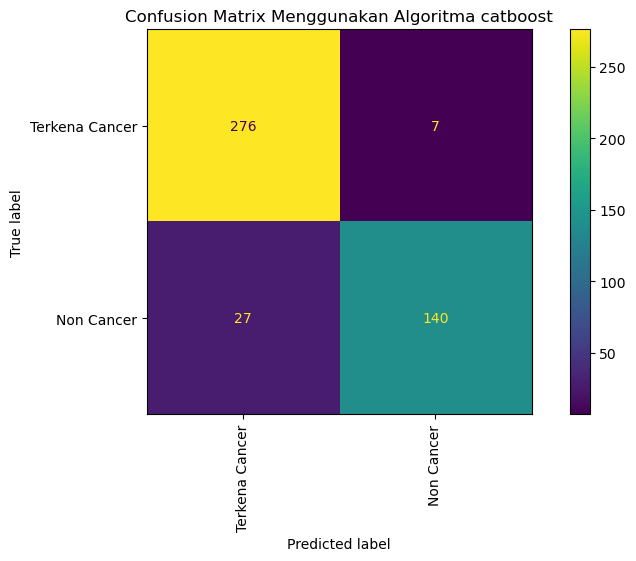

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_cat, title = f"Confusion Matrix Menggunakan Algoritma catboost")

Menggunakan CatboostClassifier dimaknai: dimaknai:

1. 276 responden cancer telah diklasifikasikan dengan benar
2. 140 responden noncancer telah diklasifikasikan dengan benar
3. 27 responden noncancer diklasifikasikan sebagai responden cancer (False Positif)
4. 7 responden cancer diklasifikasikan sebagai responden noncancer (False Negatif)

# **Evaluasi Model dan pemilihan model**

In [188]:
# Membentuk DataFrame berisi model dengan akurasinya
models = pd.DataFrame({
    "Model": ["XGBoost", "Logistik", "Decission Tree", "KNN" ,"Random Forest","Catboost"],
    "Akurasi": [accuracy_xgboost, accuracy_lg, accuracy_dt, accuracy_knn,accuracy_rf,accuracy_cat]
})

# Mengurutkan data berdasarkan akurasi dari tertinggi ke terendah
models.sort_values(by = "Akurasi", ascending = False)

,Model,Akurasi
5,Catboost,92.44
4,Random Forest,90.67
0,XGBoost,85.33
2,Decission Tree,81.56
1,Logistik,81.11
3,KNN,68.22


Dari hasil enam model algoritma yang terbaik adalah model development dengan algoritma Catboost

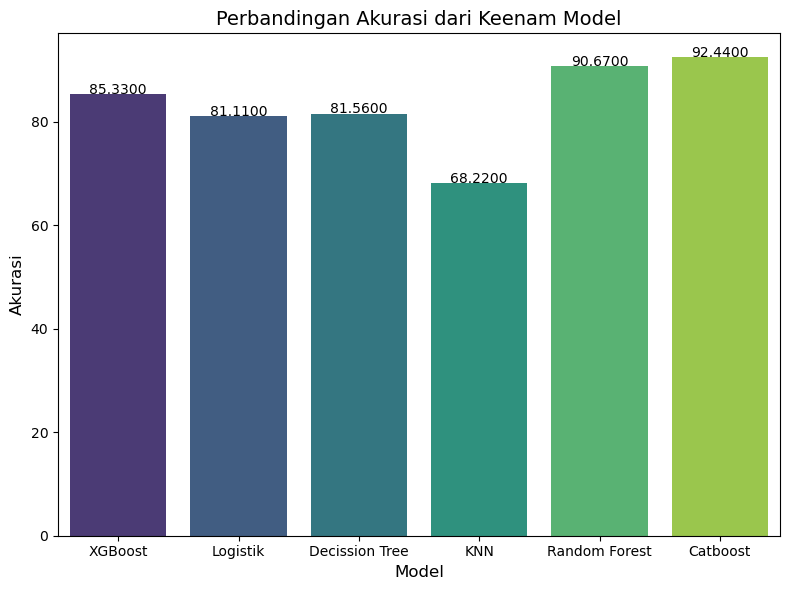

In [195]:
# Buat plot
plt.figure(figsize=(8, 6))

# Gunakan hue sama dengan x dan nonaktifkan legend untuk menghindari warning
barplot = sns.barplot(
    data=models,
    x="Model",
    y="Akurasi",
    hue="Model",               # Tambahkan hue
    palette="viridis",
    legend=False               # Hilangkan legend karena redundant
)

# Tambahkan label nilai akurasi di atas tiap bar
for index, value in enumerate(models["Akurasi"]):
    barplot.text(index, value + 0.02, f"{value:.4f}", color="black", ha="center")

# Judul dan label sumbu
plt.title("Perbandingan Akurasi dari Keenam Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Akurasi", fontsize=12)

# Tata letak
plt.tight_layout()
plt.show()


Berdasarkan visualisasi dan hasil evaluasi masing-masing model, Catboost menunjukkan performa terbaik. Hal ini ditunjukkan oleh skor akurasi dan skor F1 yang tertinggi, serta jumlah kesalahan klasifikasi yang paling rendah, khususnya dalam mendeteksi kasus Cancer.

                precision    recall  f1-score   support

Terkena Cancer       0.91      0.98      0.94       283
    Non Cancer       0.95      0.84      0.89       167

      accuracy                           0.92       450
     macro avg       0.93      0.91      0.92       450
  weighted avg       0.93      0.92      0.92       450



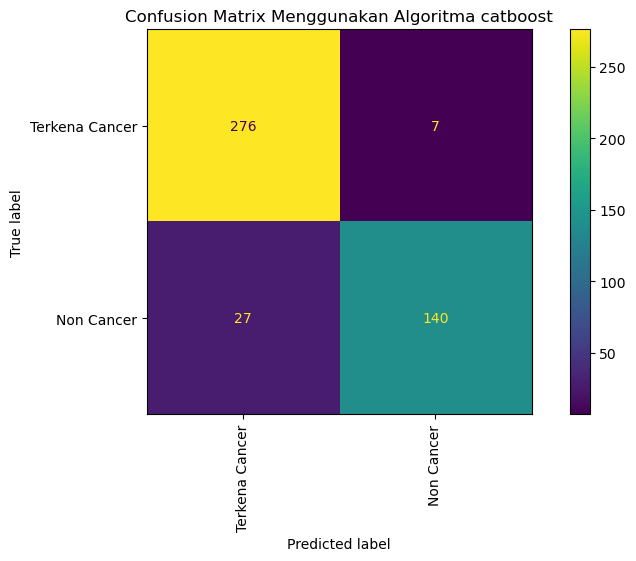

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_cat, title = f"Confusion Matrix Menggunakan Algoritma catboost")

## Interpretasi

Menggunakan CatboostClassifier dimaknai: dimaknai:

1. 276 responden cancer telah diklasifikasikan dengan benar
2. 140 responden noncancer telah diklasifikasikan dengan benar
3. 27 responden noncancer diklasifikasikan sebagai responden cancer (False Positif)
4. 7 responden cancer diklasifikasikan sebagai responden noncancer (False Negatif)

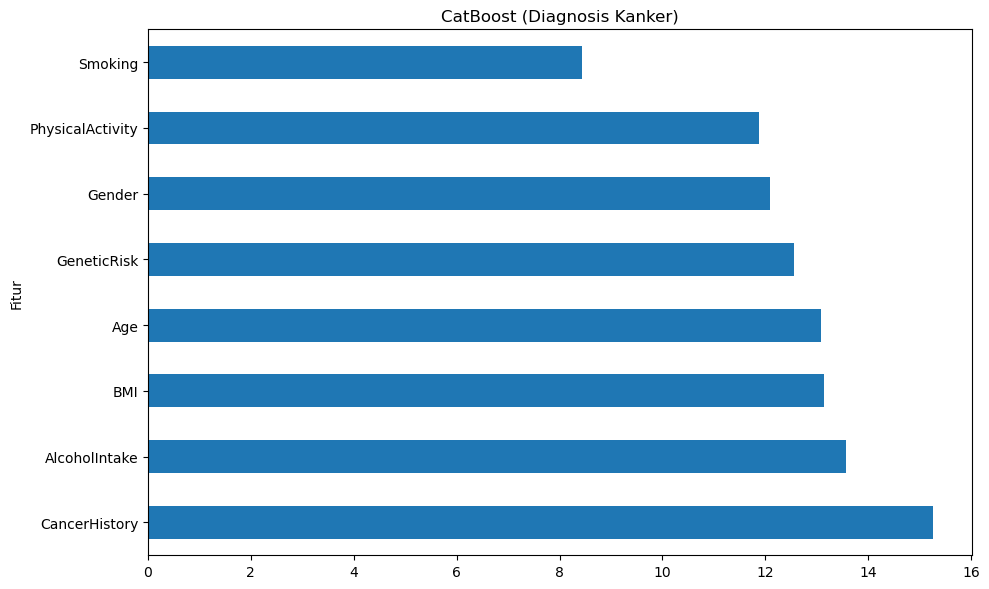

In [201]:
# Melatih model CatBoost (jika belum dilakukan)
model_cat = CatBoostClassifier(verbose=0, random_state=42)
model_cat.fit(X_train, y_train)

# Mendapatkan feature importance
feat_importances = pd.Series(model_cat.get_feature_importance(), index=X.columns)

feat_importances.nlargest(10).plot(kind='barh', figsize=(10,6), title='CatBoost (Diagnosis Kanker)')
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

### Kesimpulan:

Berdasarkan hasil analisis menggunakan model CatBoost, faktor-faktor yang paling berpengaruh dalam memprediksi risiko kanker adalah usia, aktivitas fisik, indeks massa tubuh (BMI), dan konsumsi alkohol. Hal ini menunjukkan bahwa selain faktor alami seperti usia, gaya hidup juga memainkan peran penting dalam risiko kanker. Oleh karena itu, upaya pencegahan kanker sebaiknya difokuskan pada promosi gaya hidup sehat, seperti rutin beraktivitas fisik, menjaga berat badan ideal, dan menghindari konsumsi alkohol berlebihan.